## Problem Statement
A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a **price below their actual values and flip them on at a higher price**. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to **build a regression model using regularisation** in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The company wants to know:**

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


### Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

******************

### Procedure:
1. Step 1: Reading and Understanding the Data (EDA)
2. Step 2: Visualising the Data
    - Univarent Analysis
    - Bivarent analysis
    - Multivarent Analysis
3. Step 3: Data Preparation
4. Step 4: Splitting the Data into Training and Testing Sets
5. Step 5: Building a linear model
6. Step 6: Residual Analysis of the train data
7. step 7: applying Ridge and Lasso

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

import matplotlib.pyplot as plt
%matplotlib inline

#hide warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import r2_score, mean_squared_error

## Step 1: Reading and Understanding the Data (EDA)
a. Cleaning Data

In [3]:
house_data = pd.read_csv("train.csv")
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
house_data.shape

(1460, 81)

### a. Cleaning Data

In [5]:
missing_value = round((house_data.isnull().sum()/house_data.shape[0])*100, 2)
missing_value.loc[missing_value>20].sort_values()

FireplaceQu    47.26
Fence          80.75
Alley          93.77
MiscFeature    96.30
PoolQC         99.52
dtype: float64

**As we can see that five columns have more than 45% of missing values and will drop these 5 columns**

In [6]:
house_data = house_data.drop(missing_value.loc[missing_value>20].index, axis=1)
house_data.shape

(1460, 76)

In [7]:
missing_value = round((house_data.isnull().sum()/house_data.shape[0])*100,2)
missing_value.loc[missing_value>0].sort_values()

Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
LotFrontage     17.74
dtype: float64

**So here we can see LotFrontage having 17.74% missing value. And will get some insights** 
- LotFrontage: Linear feet of street-connected to property

In [8]:
house_data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

- As we can see that we can't impute any values in it, we will remove this variable cause it has 17% missing values.

In [9]:
house_data = house_data.drop("LotFrontage", axis=1)
house_data.shape

(1460, 75)

In [10]:
missing_value = round( (house_data.isnull().sum()/house_data.shape[0])*100,2)
missing_value.loc[missing_value>0].sort_values()

Electrical      0.07
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
BsmtExposure    2.60
BsmtFinType2    2.60
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

Here we can see that some of the variables have an exact same missing value of 5.55% 
- We will go through it and get some insights. 

In [11]:
missing_col = missing_value[missing_value>5].index
for col in missing_col:
    print(f"{house_data[col].value_counts()} \n")

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 



In [12]:
missing5_per = house_data[(house_data[missing_col[0]].isnull() & house_data[missing_col[1]].isnull() 
                           & house_data[missing_col[2]].isnull() & house_data[missing_col[3]].isnull() 
                           & house_data[missing_col[4]].isnull()) ]
missing5_per.shape

(81, 75)

In [13]:
round(missing5_per.shape[0]/house_data.shape[0] *100, 2)

5.55

Here we can see that **5.5%** of the missing data from **'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'** are **from the same Row.** But we can't remove it because here when we use isnull(), it takes **NA as null**, but as per **Metadata**, they have mentioned **NA is "No Garage"**, So we can't remove the category. Insteed we will give diffent name for it like **NO-GA than NA**. 

However, **'GarageYrBlt'** is numeric(Date- Year garage was built), so for **NA**, we can use **YearBuilt** for it.

In [14]:
for col in missing_col:
    if col != "GarageYrBlt":
        house_data[col] = house_data[col].apply(lambda x: "NO-GA" if x!=x else x)

In [15]:
def re_NA_t_BLDyr(year, buildyear):
    if year != year:
        return buildyear
    return year

In [16]:
house_data["GarageYrBlt"] = list(map(re_NA_t_BLDyr, house_data["GarageYrBlt"], house_data["YearBuilt"]))

### Rechecking the missing values

In [17]:
missing_value = round(house_data.isnull().sum()/house_data.shape[0] *100 ,2)
missing_value.loc[missing_value>0].sort_values()

Electrical      0.07
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
BsmtExposure    2.60
BsmtFinType2    2.60
dtype: float64

Here we can see that some of the variables have an missing value of 2.5 and above.
- We will go through it and get some insights

In [18]:
missing_col = missing_value.loc[missing_value>2].sort_values().index
for col in missing_col:
    print(f"{house_data[col].value_counts()} \n\n")

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 




In [19]:
missing_per02 = house_data[(house_data[missing_col[0]].isnull() & house_data[missing_col[1]].isnull() 
                            & house_data[missing_col[2]].isnull() & house_data[missing_col[3]].isnull()
                            & house_data[missing_col[4]].isnull()
                           )]
missing_per02.shape

(37, 75)

In [20]:
missing_per02.shape[0]/house_data.shape[0]*100

2.5342465753424657

In [21]:
missing_col

Index(['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2'], dtype='object')

Here we can see that **2.5%** of the missing data from **'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2'** are **from the same Row.** But we can't remove it because here when we use isnull(), it takes **NA as null** but as per **Metadata** they have mentioned **NA is "No Basement"**, So we basically can't remove this category. Insteed we will give diffent name for it like **NO-BA than NA**. 

In [22]:
for col in missing_col:
    house_data[col] = house_data[col].apply(lambda x: "NO-BA" if x!=x else x )
house_data.shape

(1460, 75)

In [23]:
missing_value = round (house_data.isnull().sum()/house_data.shape[0]*100, 2)
missing_value.loc[missing_value>0].sort_values()

Electrical    0.07
MasVnrType    0.55
MasVnrArea    0.55
dtype: float64

In [24]:
missing_col = missing_value.loc[missing_value>0].sort_values().index
missing_col

Index(['Electrical', 'MasVnrType', 'MasVnrArea'], dtype='object')

- Here we can see that these three variables have only 0.55% missing values, so we can directly remove them cause we will still be left with more data. 

In [25]:
house_data = house_data[~(house_data[missing_col[0]].isnull() | house_data[missing_col[1]].isnull() 
           | house_data[missing_col[2]].isnull() 
           )]
house_data.shape

(1451, 75)

In [26]:
missing_value = round( house_data.isnull().sum()/house_data.shape[0]*100,2)
missing_value[missing_value>0].sort_values()

Series([], dtype: float64)

In [27]:
# Removing ID columns
house_data = house_data.drop("Id", axis=1)
house_data.shape

(1451, 74)

In [28]:
round(house_data.shape[0]/1460 *100 ,2)

99.38

#### No missing values, only 0.62% are removed, and seven columns are removed.
*****
****

## Step 2: Visualising the Data
1. Univarent Analysis
2. Bivarent analysis
3. Multivarent Analysis

In [29]:
#Further narrowing down on the columns and dropping all unnecessary variables

house_data.nunique().sort_values()

Street            2
Utilities         2
CentralAir        2
HalfBath          3
PavedDrive        3
               ... 
TotalBsmtSF     717
1stFlrSF        748
BsmtUnfSF       777
GrLivArea       858
LotArea        1066
Length: 74, dtype: int64

- We can see each variable has at least **two unique values**, so there is no need to remove any more variables.

#### Dividing the data into categorical columns and numeric columns for better visulaization

In [30]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   Street         1451 non-null   object 
 4   LotShape       1451 non-null   object 
 5   LandContour    1451 non-null   object 
 6   Utilities      1451 non-null   object 
 7   LotConfig      1451 non-null   object 
 8   LandSlope      1451 non-null   object 
 9   Neighborhood   1451 non-null   object 
 10  Condition1     1451 non-null   object 
 11  Condition2     1451 non-null   object 
 12  BldgType       1451 non-null   object 
 13  HouseStyle     1451 non-null   object 
 14  OverallQual    1451 non-null   int64  
 15  OverallCond    1451 non-null   int64  
 16  YearBuilt      1451 non-null   int64  
 17  YearRemodAdd   1451 non-null   int64  
 18  RoofStyl

In [31]:
# Getting only categorical variables. 
categorical = house_data.select_dtypes(include=['object'])
print(categorical.columns,"\n", categorical.shape[1])

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') 
 38


In [32]:
# Getting only numeric variables. 
numeric = house_data.select_dtypes(exclude=['object'])
print(numeric.columns, "\n",numeric.shape[1])

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
 36


- We have 38 categorical variables and 36 numeric variables.

### a. Univarent Analysis

In [33]:
def barplots(idx, col, figsize=(7,7)):
    """
    This can be used to plot multiple barPlots graphs.
    """
    plt.figure(idx)
    plt.figure(figsize=figsize)
    keys = house_data[col].value_counts().keys()
    values = house_data[col].value_counts().values
    sns.barplot(keys, values, palette="Spectral")
    plt.show()

In [34]:
unique_cat = categorical.nunique().sort_values()
unique_cat

Street            2
CentralAir        2
Utilities         2
PavedDrive        3
LandSlope         3
KitchenQual       4
ExterQual         4
MasVnrType        4
LandContour       4
LotShape          4
GarageFinish      4
Electrical        5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
BsmtQual          5
MSZoning          5
ExterCond         5
BldgType          5
LotConfig         5
GarageCond        6
GarageQual        6
Heating           6
SaleCondition     6
RoofStyle         6
Foundation        6
BsmtFinType2      7
Functional        7
GarageType        7
BsmtFinType1      7
HouseStyle        8
Condition2        8
RoofMatl          8
Condition1        9
SaleType          9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

<Figure size 432x288 with 0 Axes>

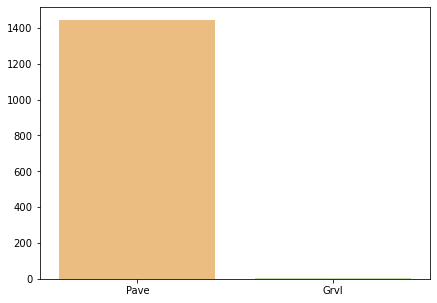

<Figure size 432x288 with 0 Axes>

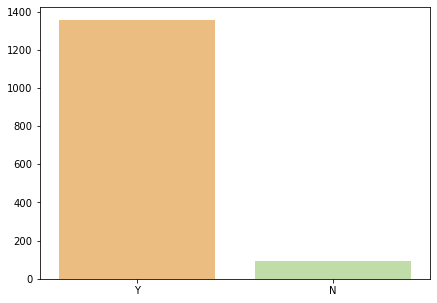

<Figure size 432x288 with 0 Axes>

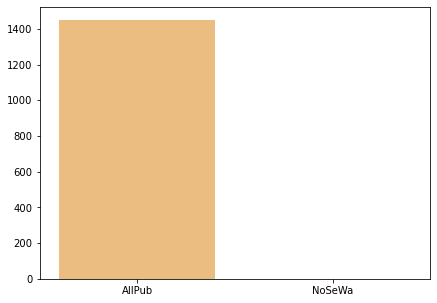

<Figure size 432x288 with 0 Axes>

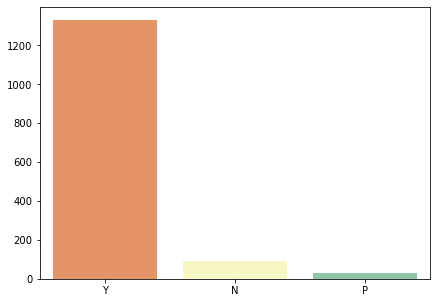

<Figure size 432x288 with 0 Axes>

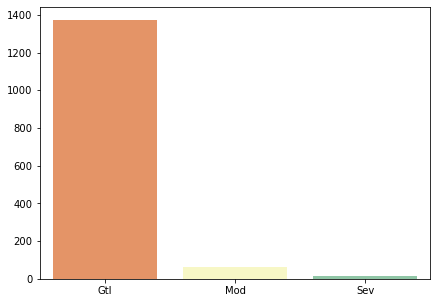

<Figure size 432x288 with 0 Axes>

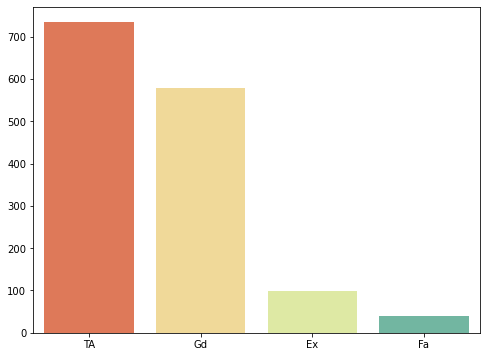

<Figure size 432x288 with 0 Axes>

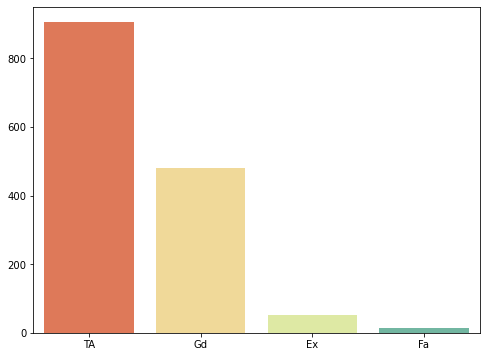

<Figure size 432x288 with 0 Axes>

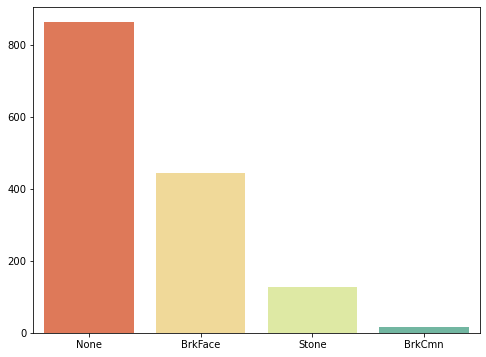

<Figure size 432x288 with 0 Axes>

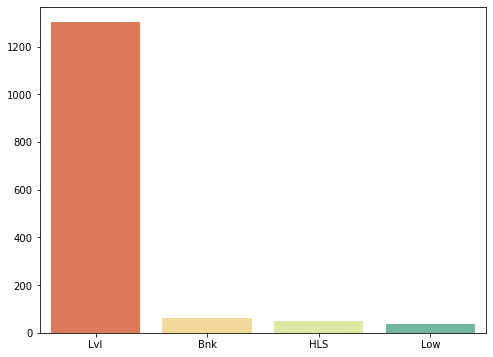

<Figure size 432x288 with 0 Axes>

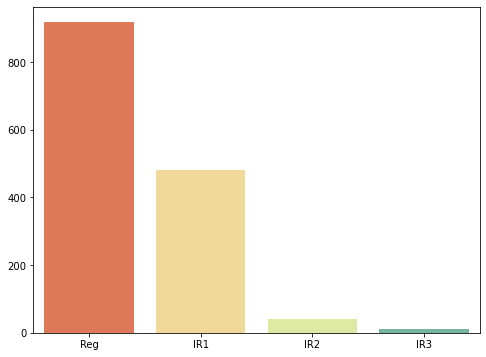

<Figure size 432x288 with 0 Axes>

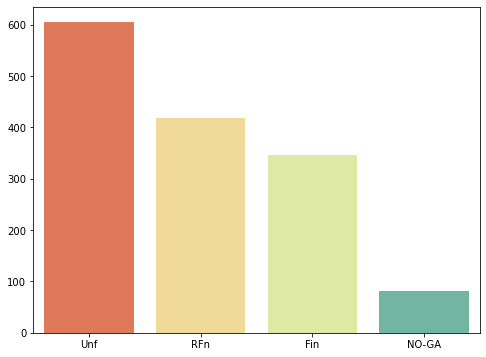

<Figure size 432x288 with 0 Axes>

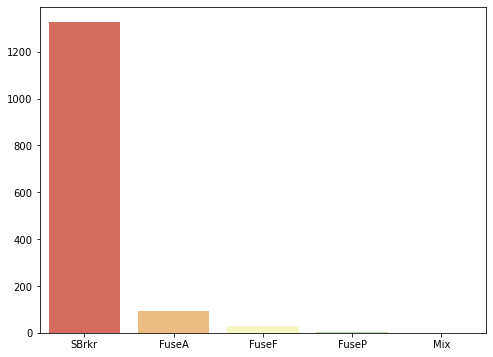

<Figure size 432x288 with 0 Axes>

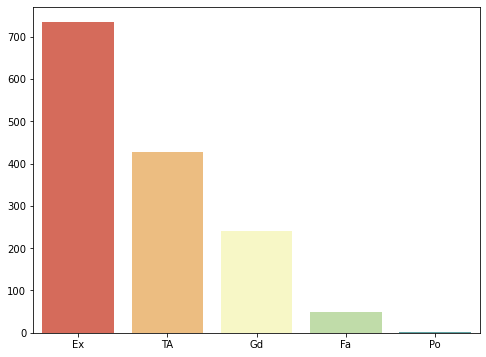

<Figure size 432x288 with 0 Axes>

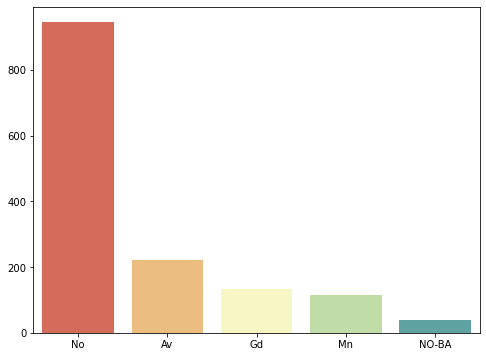

<Figure size 432x288 with 0 Axes>

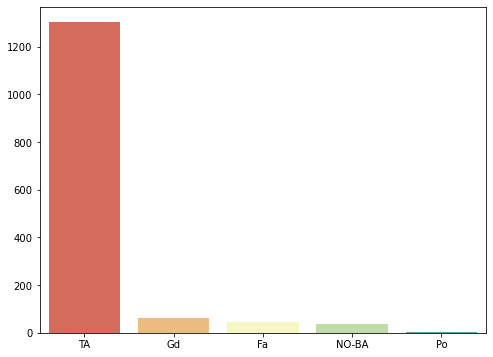

<Figure size 432x288 with 0 Axes>

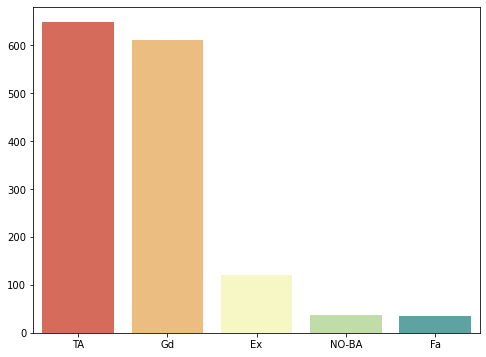

<Figure size 432x288 with 0 Axes>

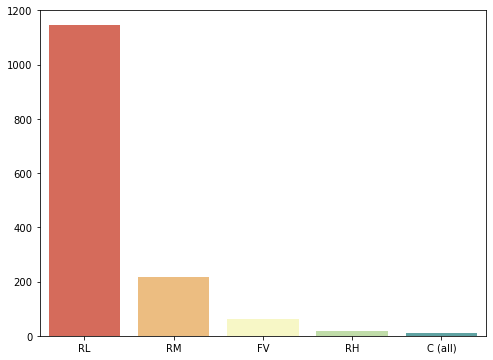

<Figure size 432x288 with 0 Axes>

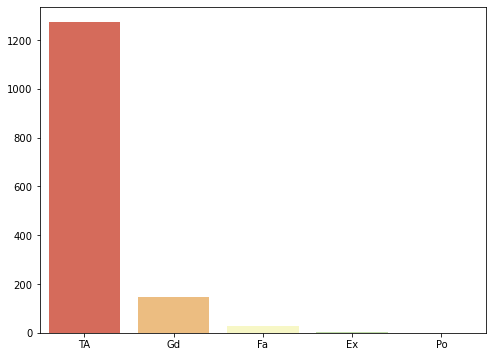

<Figure size 432x288 with 0 Axes>

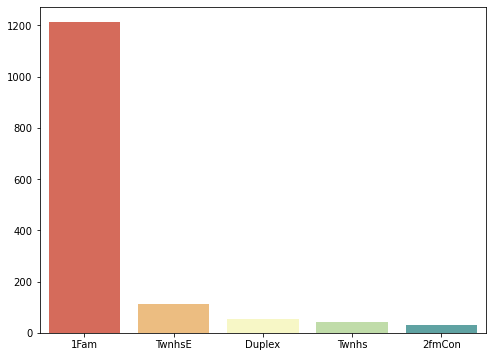

<Figure size 432x288 with 0 Axes>

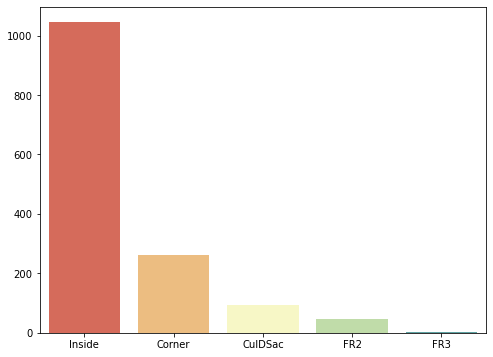

<Figure size 432x288 with 0 Axes>

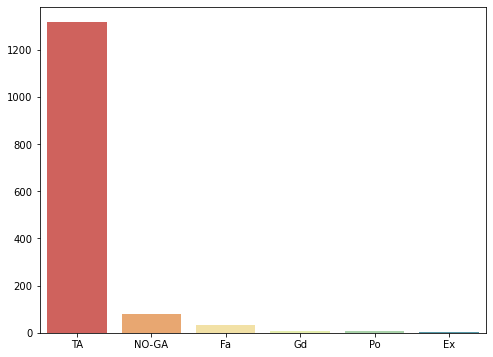

<Figure size 432x288 with 0 Axes>

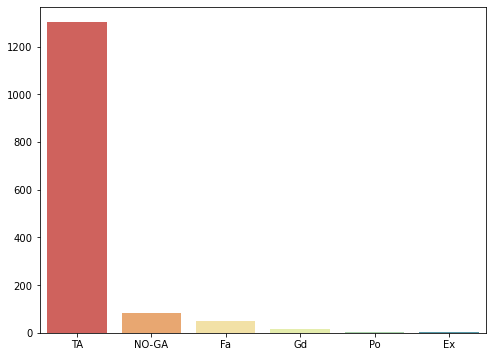

<Figure size 432x288 with 0 Axes>

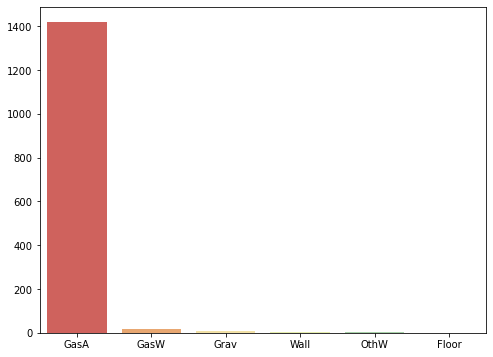

<Figure size 432x288 with 0 Axes>

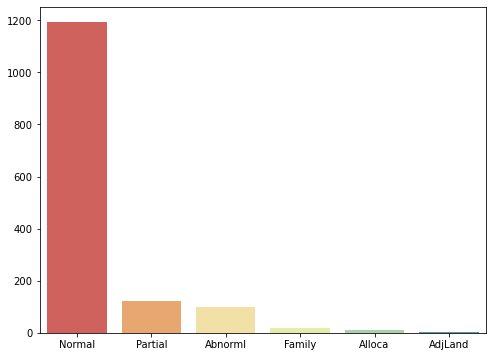

<Figure size 432x288 with 0 Axes>

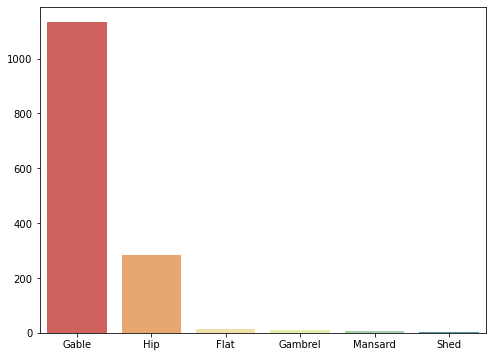

<Figure size 432x288 with 0 Axes>

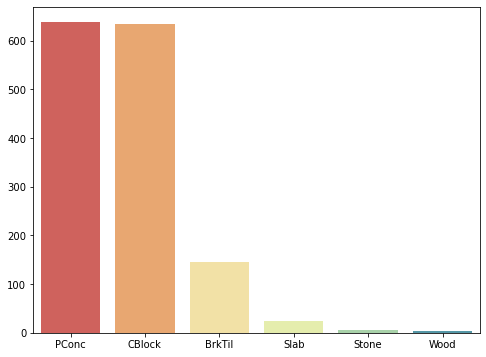

<Figure size 432x288 with 0 Axes>

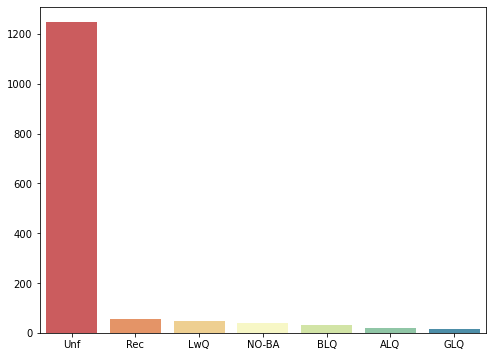

<Figure size 432x288 with 0 Axes>

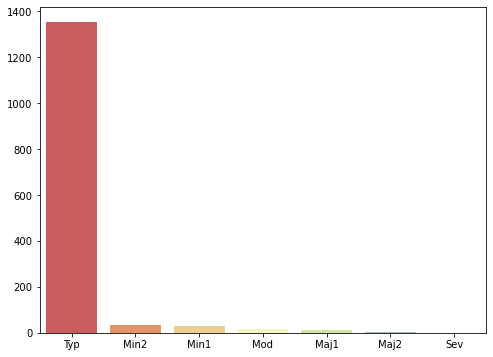

<Figure size 432x288 with 0 Axes>

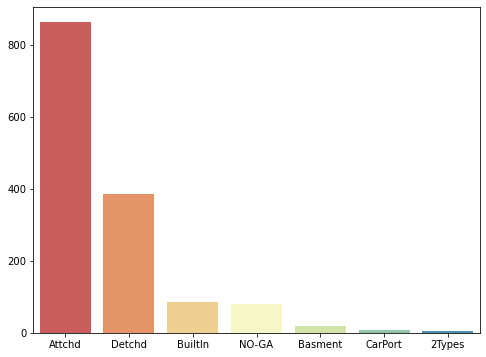

<Figure size 432x288 with 0 Axes>

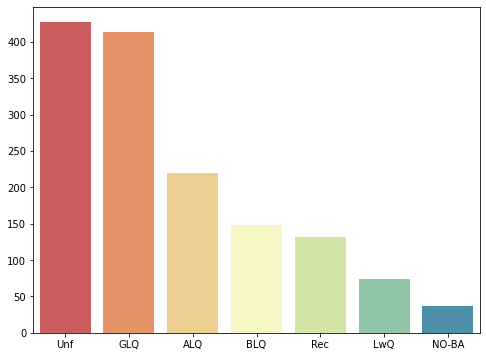

<Figure size 432x288 with 0 Axes>

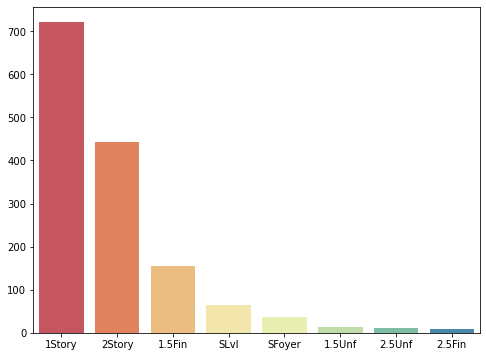

<Figure size 432x288 with 0 Axes>

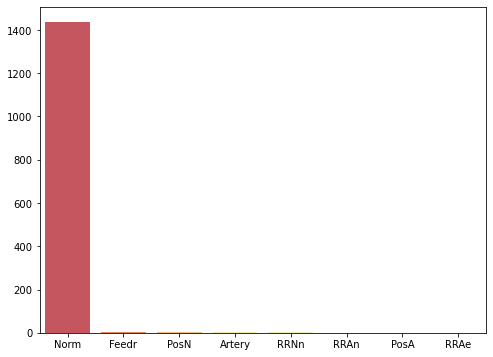

<Figure size 432x288 with 0 Axes>

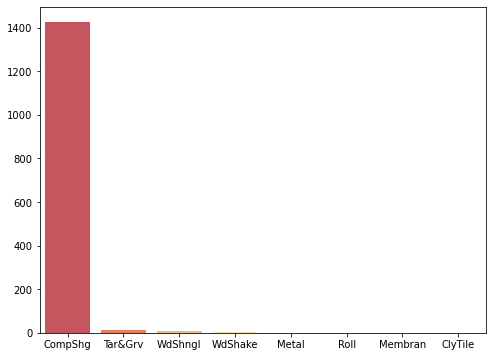

<Figure size 432x288 with 0 Axes>

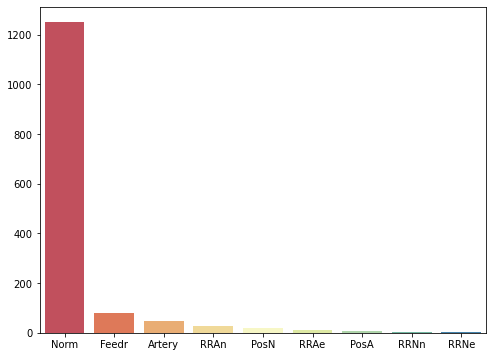

<Figure size 432x288 with 0 Axes>

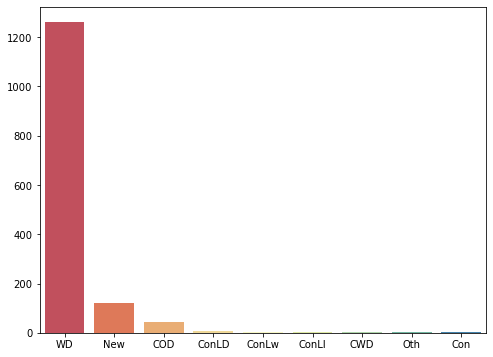

<Figure size 432x288 with 0 Axes>

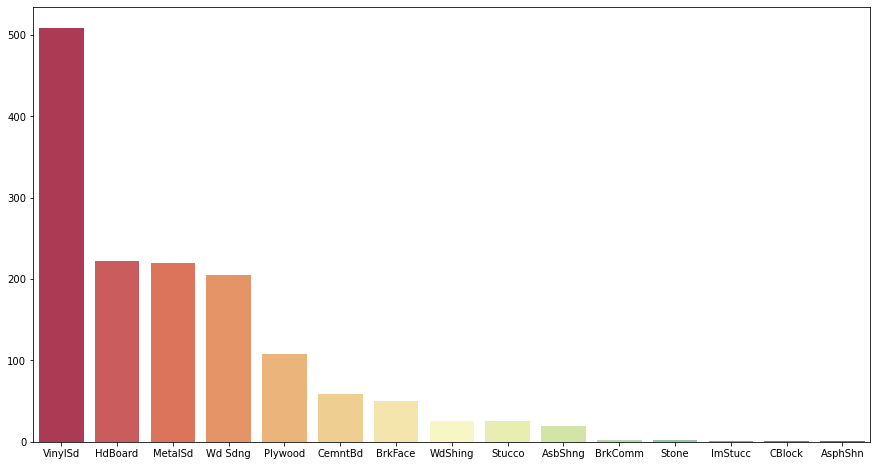

<Figure size 432x288 with 0 Axes>

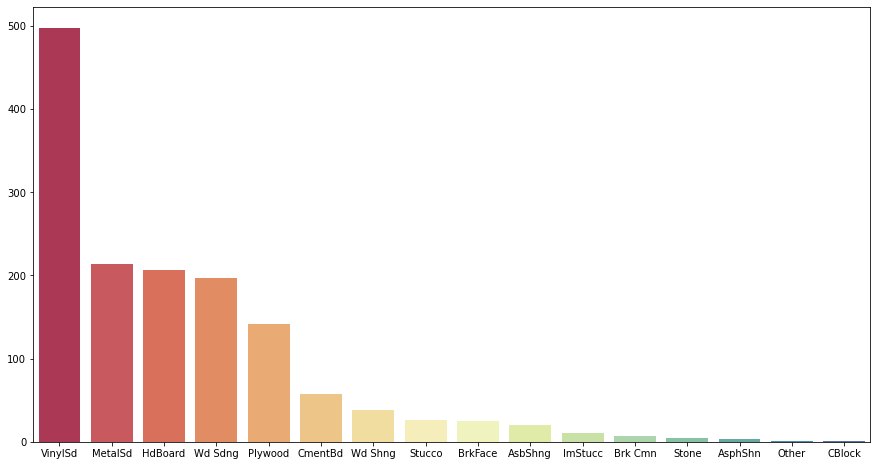

<Figure size 432x288 with 0 Axes>

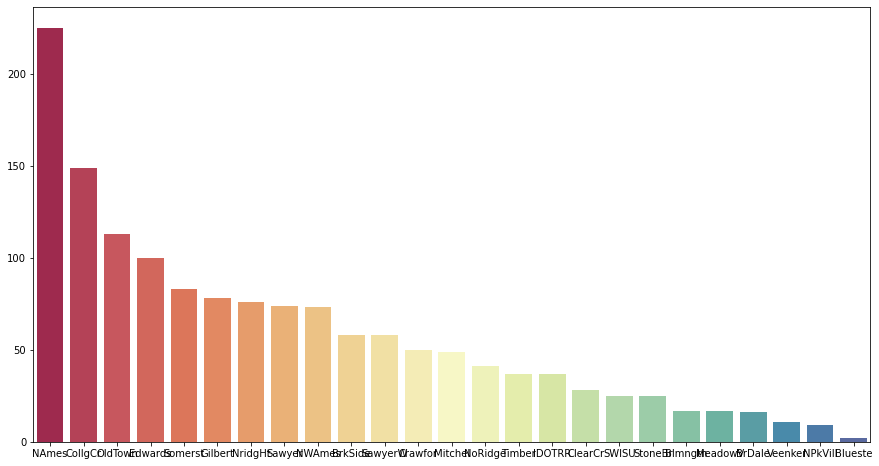

In [35]:
# Plotting box plot on all the categorical variables. 
for i, val in enumerate(unique_cat):
    if val<4:
        barplots(i, unique_cat.keys()[i], figsize = (7,5))
    elif val<10:
        barplots(i, unique_cat.keys()[i], figsize = (8,6))
    else:
        barplots(i, unique_cat.keys()[i], figsize = (15,8))

In [36]:
def boxplots(idx, col, figsize=(10,4)):
    """
    This can be used to plot multiple boxplots graphs.
    """
    plt.figure(idx)
    plt.figure(figsize=figsize)
    sns.boxplot(house_data[col], palette=pat[random.randint(0,len(pat)-1)])
    plt.show()

<Figure size 432x288 with 0 Axes>

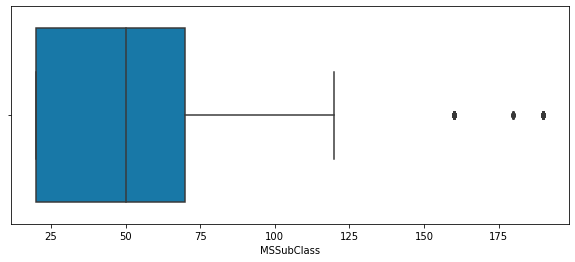

<Figure size 432x288 with 0 Axes>

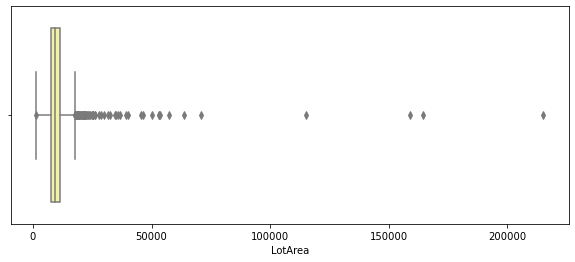

<Figure size 432x288 with 0 Axes>

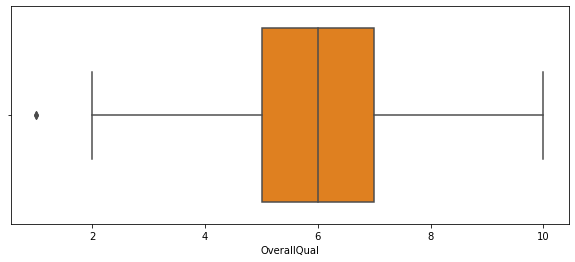

<Figure size 432x288 with 0 Axes>

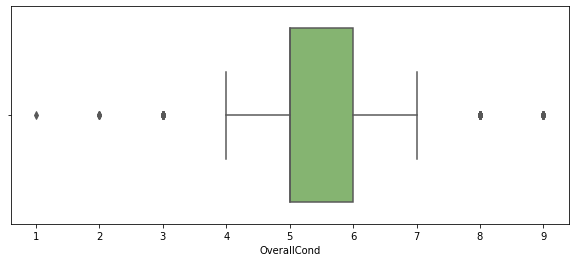

<Figure size 432x288 with 0 Axes>

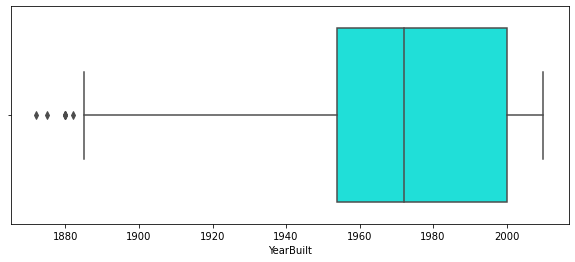

<Figure size 432x288 with 0 Axes>

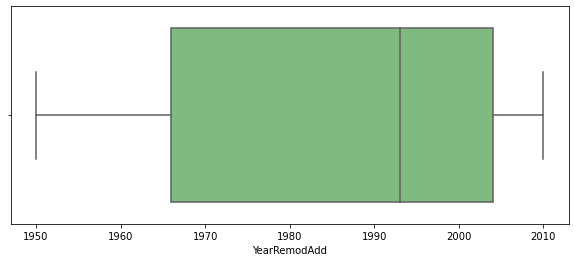

<Figure size 432x288 with 0 Axes>

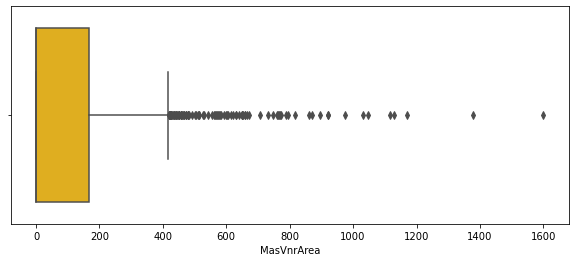

<Figure size 432x288 with 0 Axes>

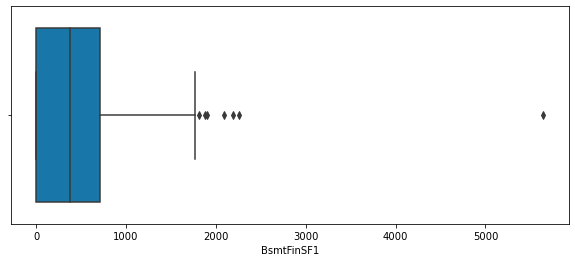

<Figure size 432x288 with 0 Axes>

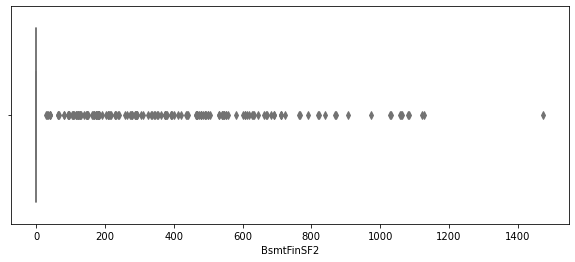

<Figure size 432x288 with 0 Axes>

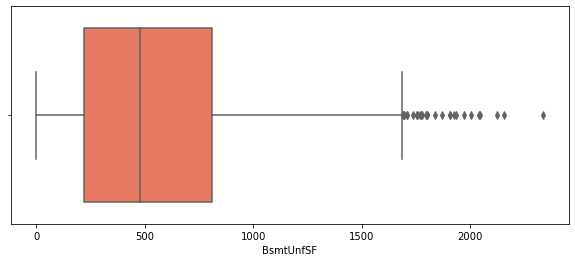

<Figure size 432x288 with 0 Axes>

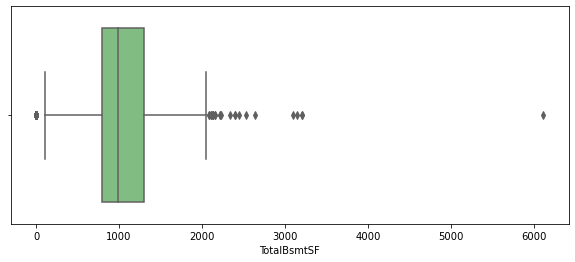

<Figure size 432x288 with 0 Axes>

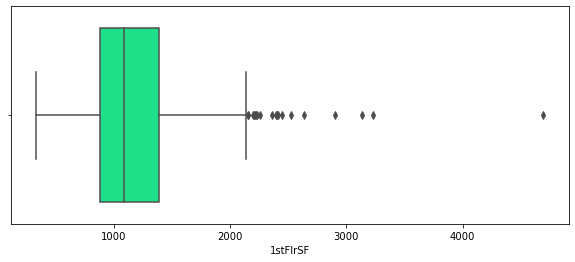

<Figure size 432x288 with 0 Axes>

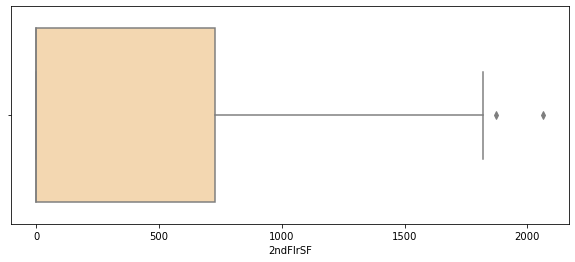

<Figure size 432x288 with 0 Axes>

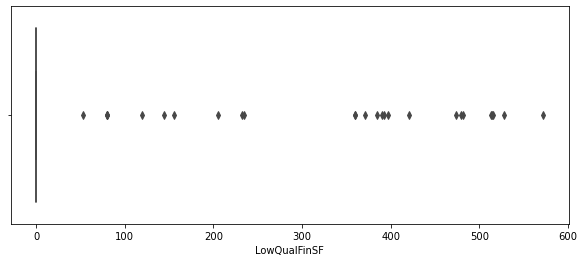

<Figure size 432x288 with 0 Axes>

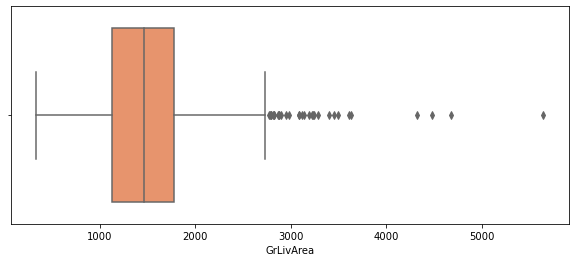

<Figure size 432x288 with 0 Axes>

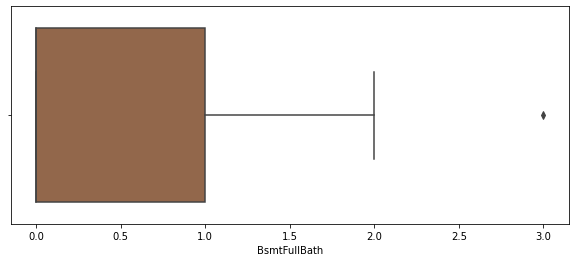

<Figure size 432x288 with 0 Axes>

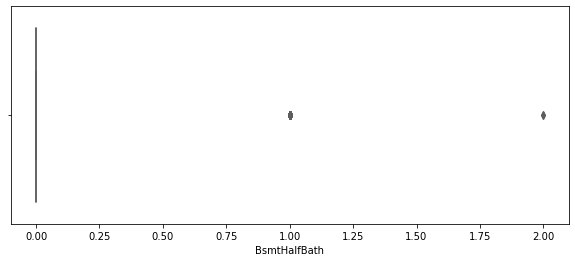

<Figure size 432x288 with 0 Axes>

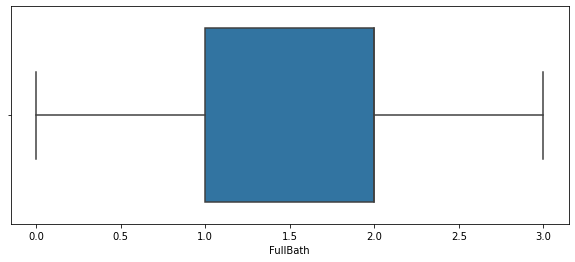

<Figure size 432x288 with 0 Axes>

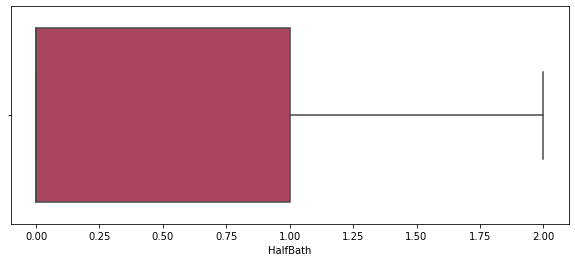

<Figure size 432x288 with 0 Axes>

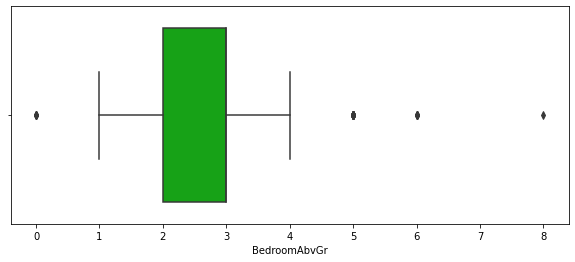

<Figure size 432x288 with 0 Axes>

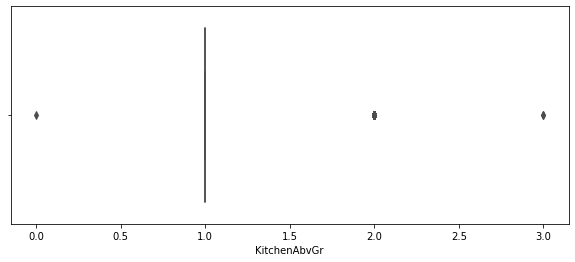

<Figure size 432x288 with 0 Axes>

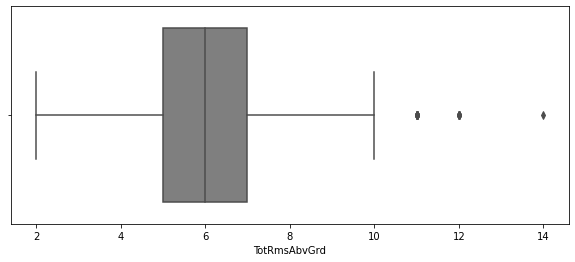

<Figure size 432x288 with 0 Axes>

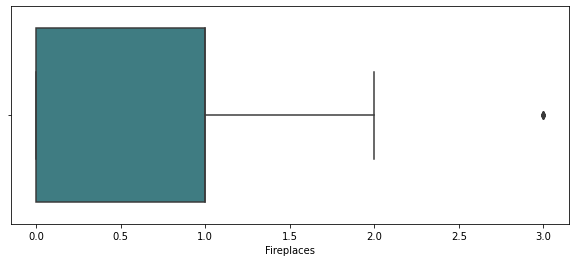

<Figure size 432x288 with 0 Axes>

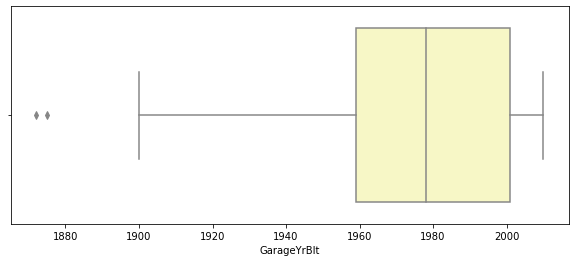

<Figure size 432x288 with 0 Axes>

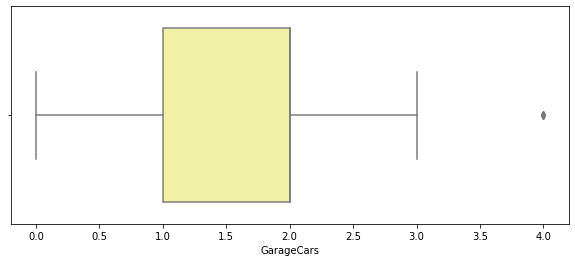

<Figure size 432x288 with 0 Axes>

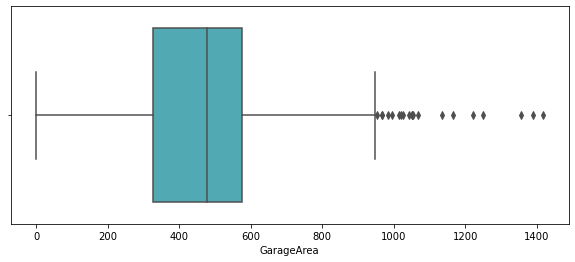

<Figure size 432x288 with 0 Axes>

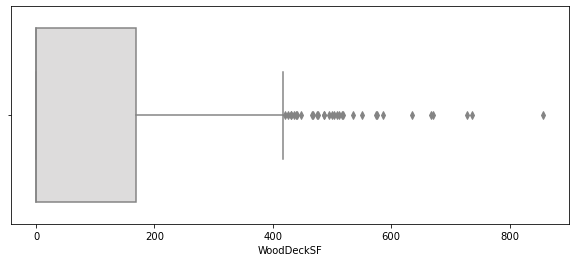

<Figure size 432x288 with 0 Axes>

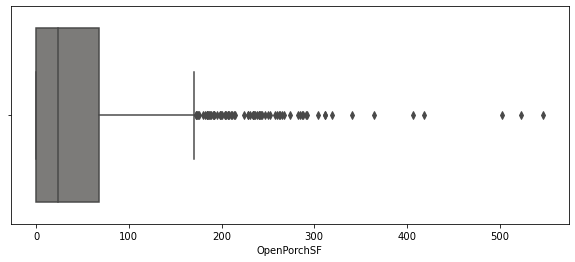

<Figure size 432x288 with 0 Axes>

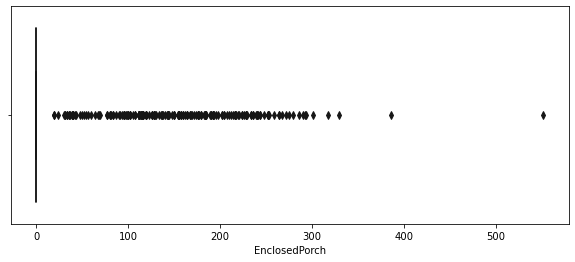

<Figure size 432x288 with 0 Axes>

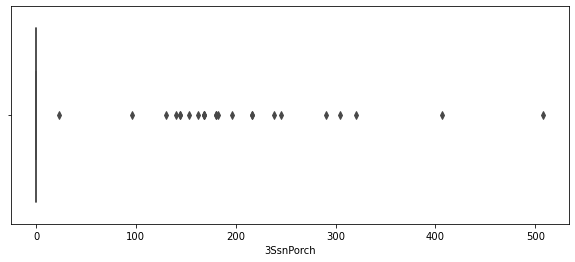

<Figure size 432x288 with 0 Axes>

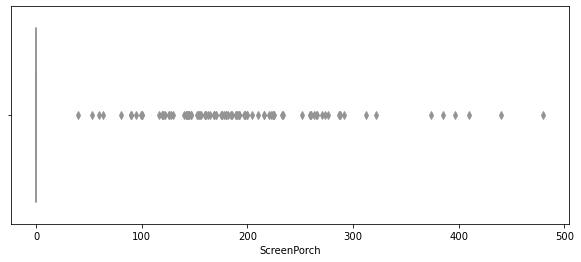

<Figure size 432x288 with 0 Axes>

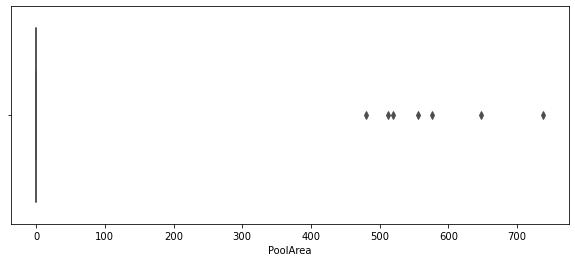

<Figure size 432x288 with 0 Axes>

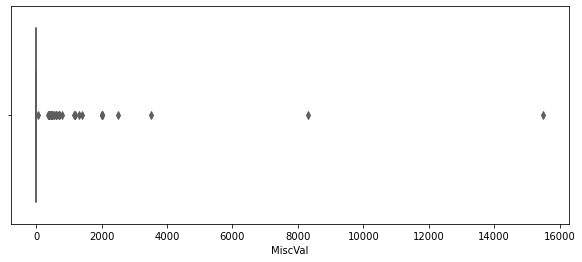

<Figure size 432x288 with 0 Axes>

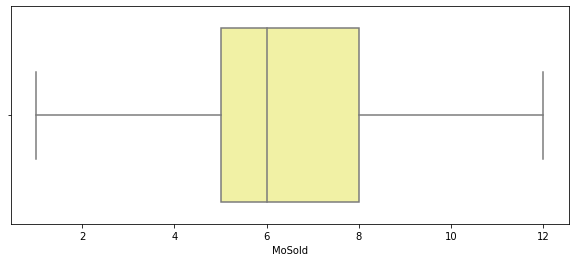

<Figure size 432x288 with 0 Axes>

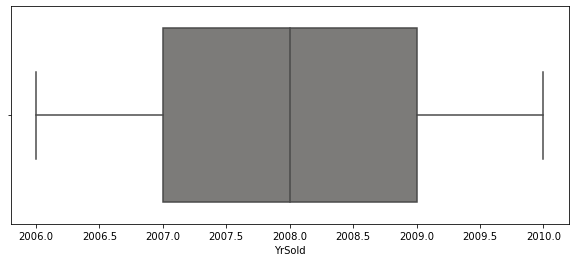

<Figure size 432x288 with 0 Axes>

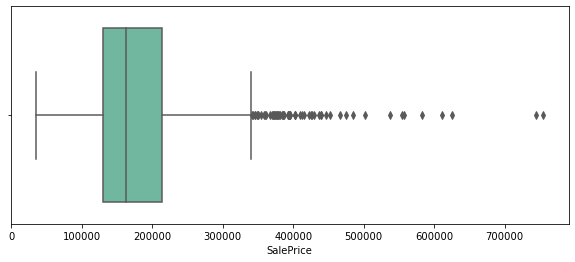

In [37]:
pat = 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
for i, col in enumerate(numeric.columns):
    boxplots(i, col)

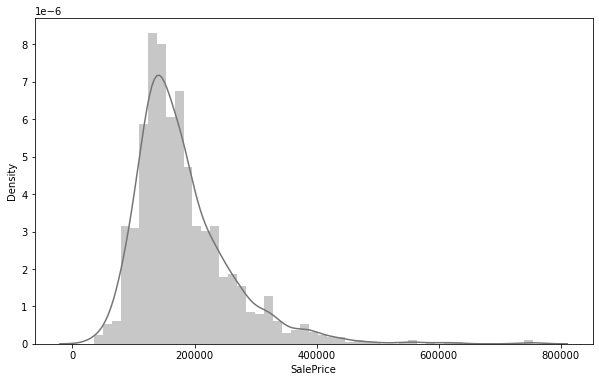

In [38]:
# Plotting a distribution plot on "SalePrice"
plt.figure(figsize=(10,6))
sns.distplot(house_data.SalePrice, color="#757575")
plt.show()

- We can see that SalePrice is Right skewed 
- To make correction we can use Log on it.

### b. Bivarent analysis

In [39]:
house_data.shape

(1451, 74)

In [40]:
def bi_boxplot(idx, col, figsize = (7,7)):
    """
    To plot box plot for two variables. 
    Here constant variable is SalePrice.
    """
    plt.figure(idx)
    plt.figure(figsize=figsize)
    sns.boxplot(x=col, y="SalePrice", data=house_data, palette="Spectral")
    plt.show()
    

<Figure size 432x288 with 0 Axes>

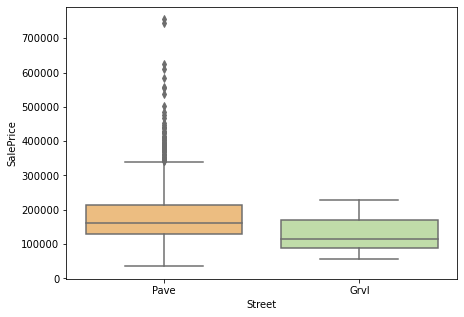

<Figure size 432x288 with 0 Axes>

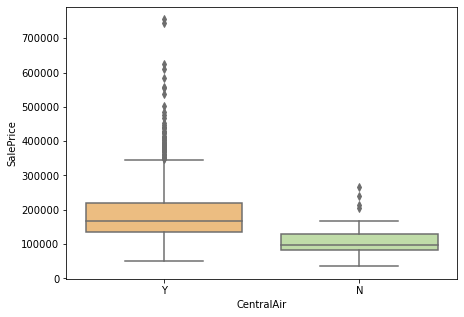

<Figure size 432x288 with 0 Axes>

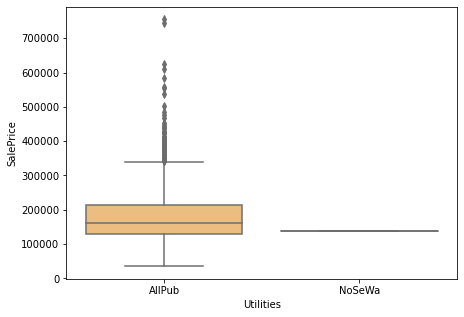

<Figure size 432x288 with 0 Axes>

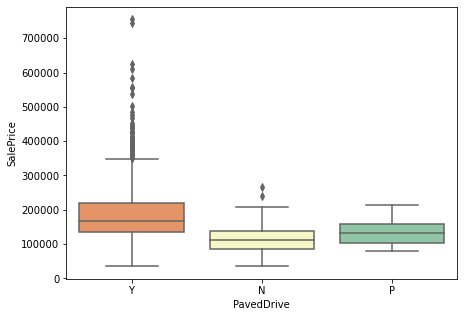

<Figure size 432x288 with 0 Axes>

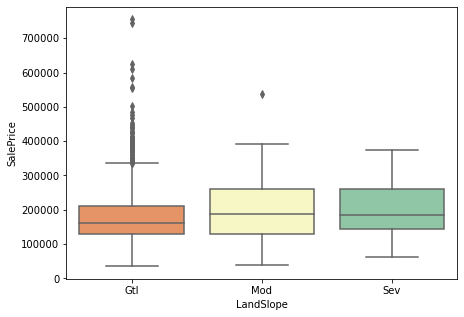

<Figure size 432x288 with 0 Axes>

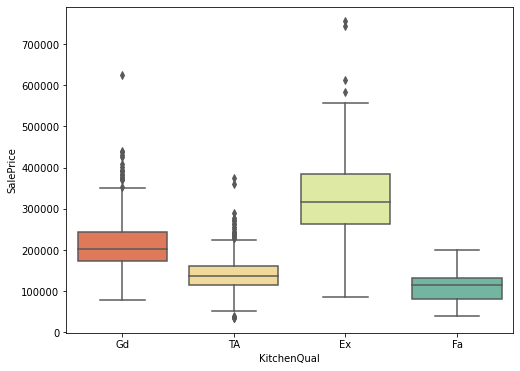

<Figure size 432x288 with 0 Axes>

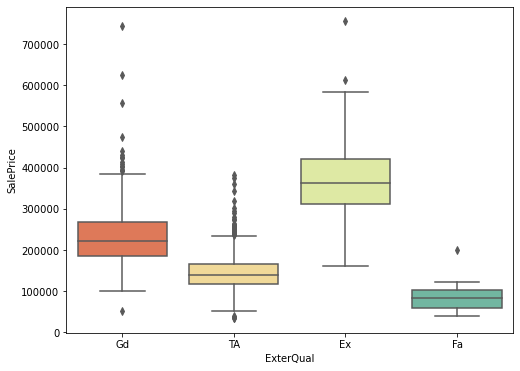

<Figure size 432x288 with 0 Axes>

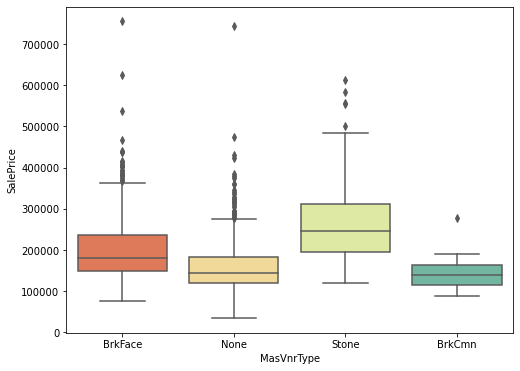

<Figure size 432x288 with 0 Axes>

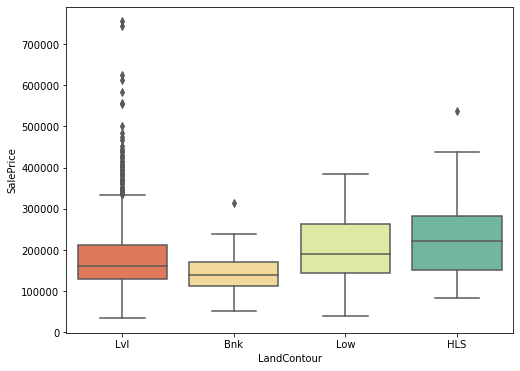

<Figure size 432x288 with 0 Axes>

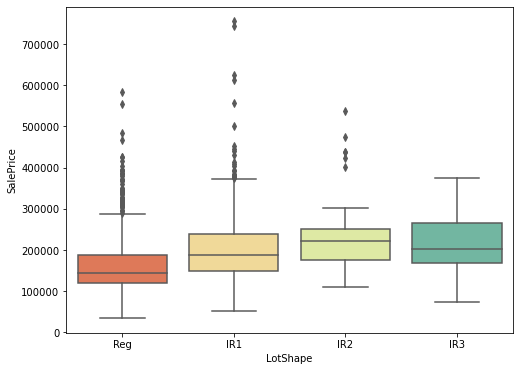

<Figure size 432x288 with 0 Axes>

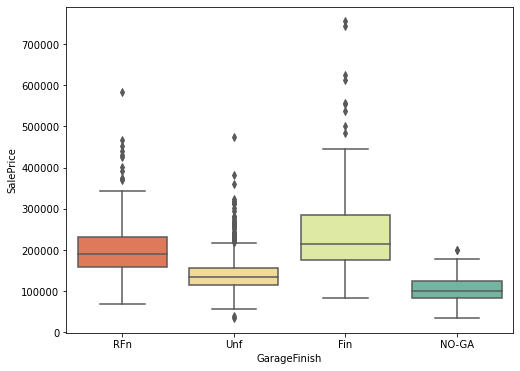

<Figure size 432x288 with 0 Axes>

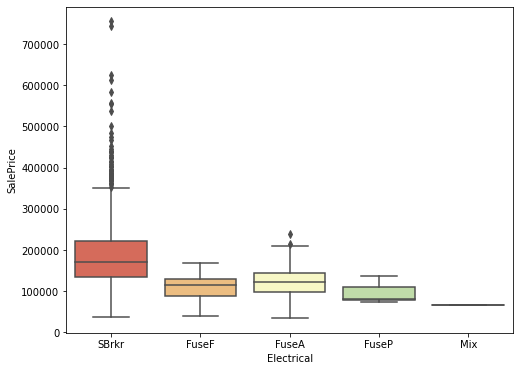

<Figure size 432x288 with 0 Axes>

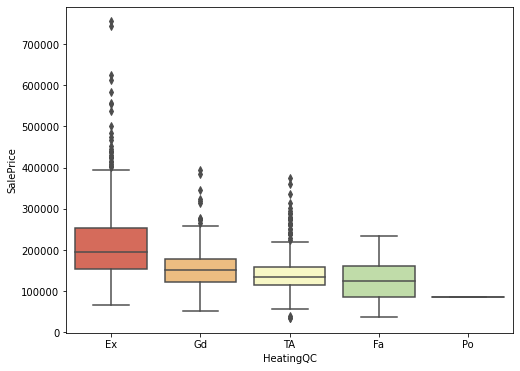

<Figure size 432x288 with 0 Axes>

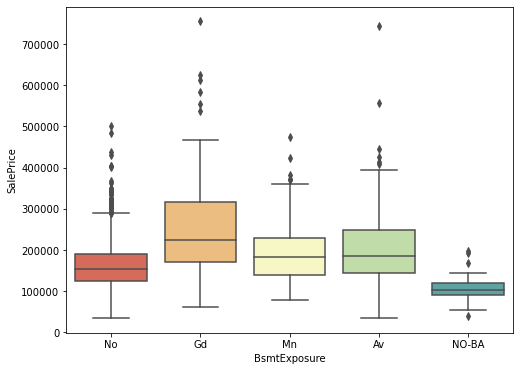

<Figure size 432x288 with 0 Axes>

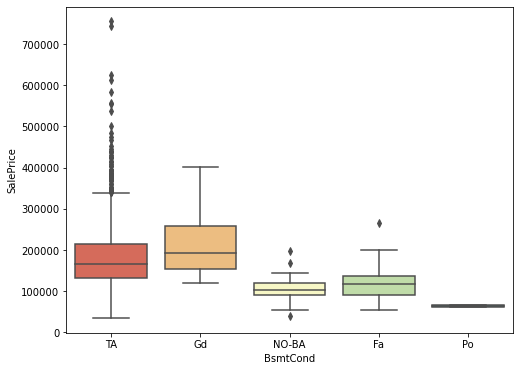

<Figure size 432x288 with 0 Axes>

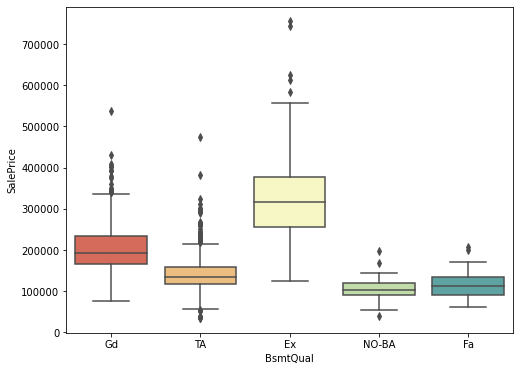

<Figure size 432x288 with 0 Axes>

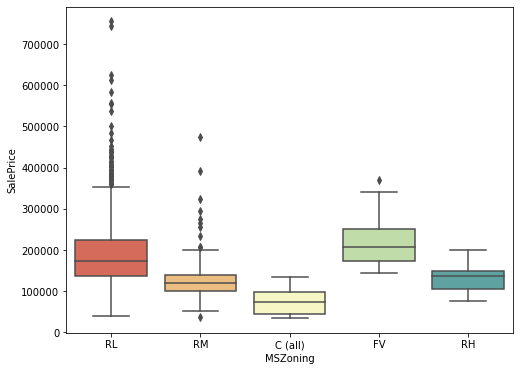

<Figure size 432x288 with 0 Axes>

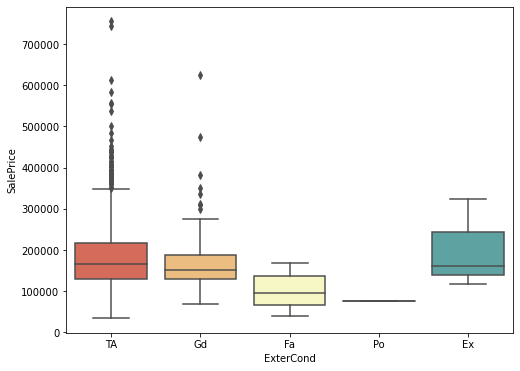

<Figure size 432x288 with 0 Axes>

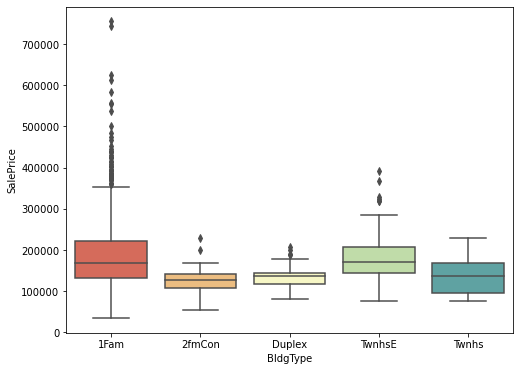

<Figure size 432x288 with 0 Axes>

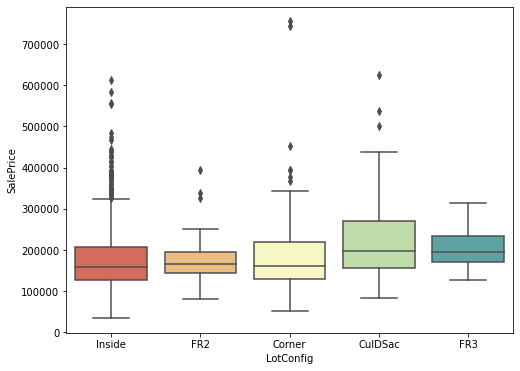

<Figure size 432x288 with 0 Axes>

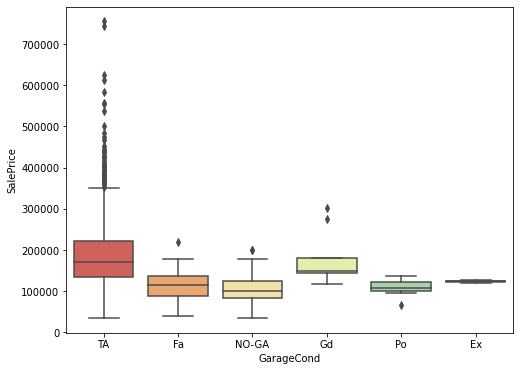

<Figure size 432x288 with 0 Axes>

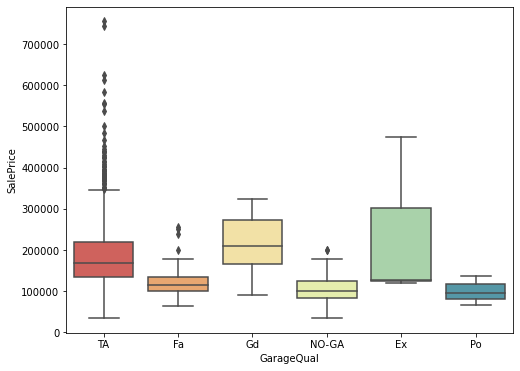

<Figure size 432x288 with 0 Axes>

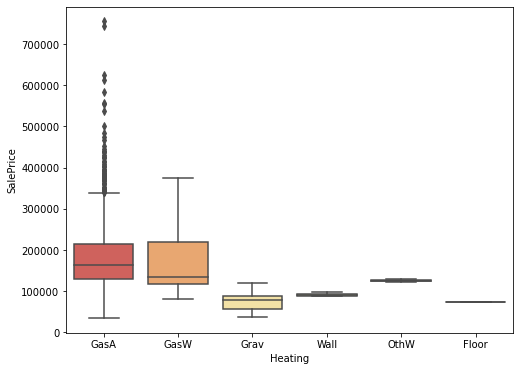

<Figure size 432x288 with 0 Axes>

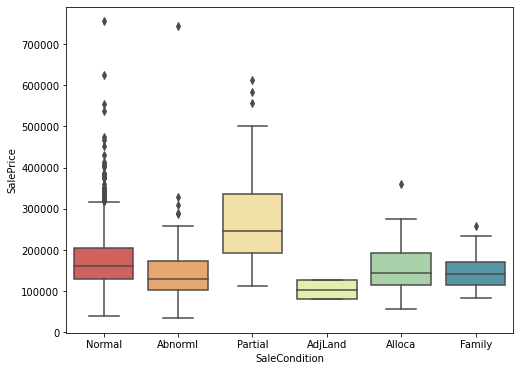

<Figure size 432x288 with 0 Axes>

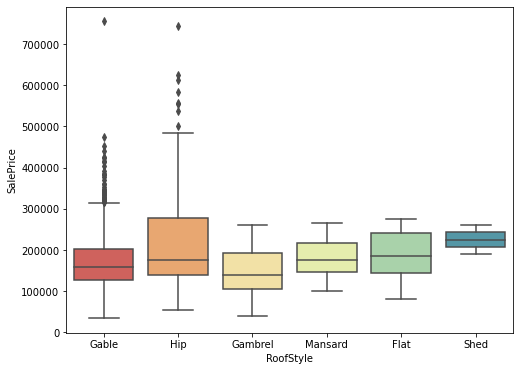

<Figure size 432x288 with 0 Axes>

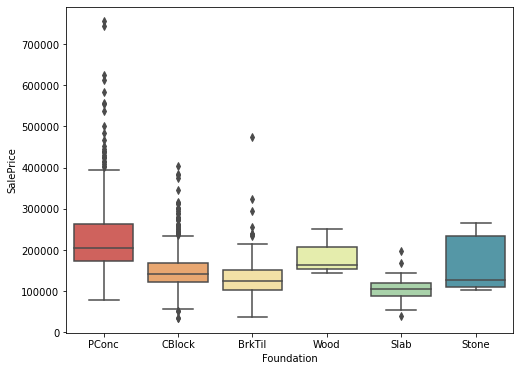

<Figure size 432x288 with 0 Axes>

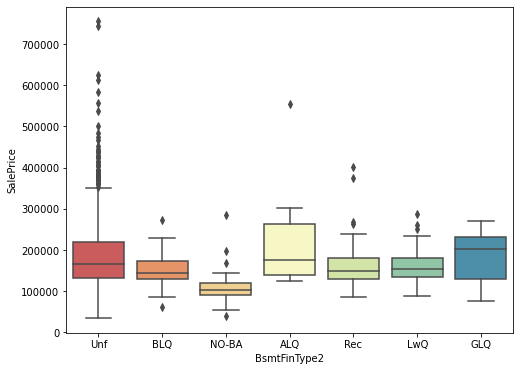

<Figure size 432x288 with 0 Axes>

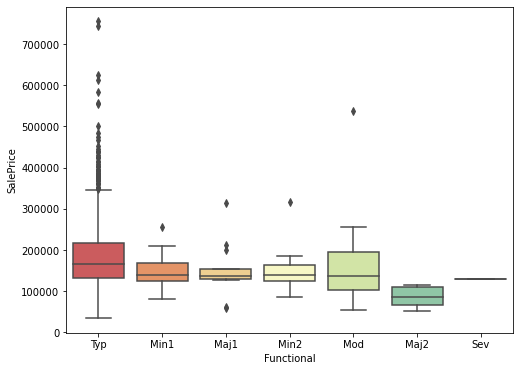

<Figure size 432x288 with 0 Axes>

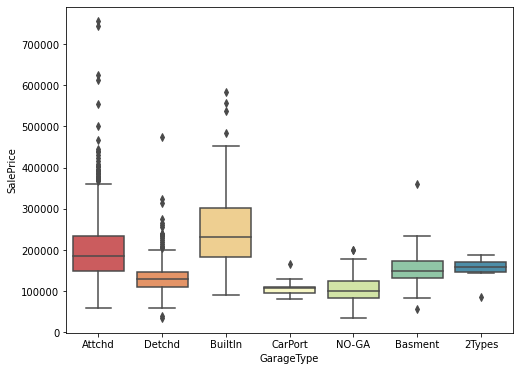

<Figure size 432x288 with 0 Axes>

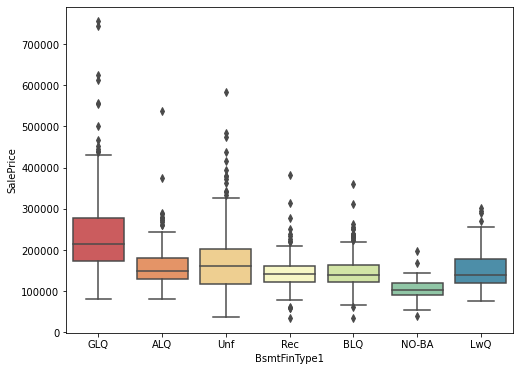

<Figure size 432x288 with 0 Axes>

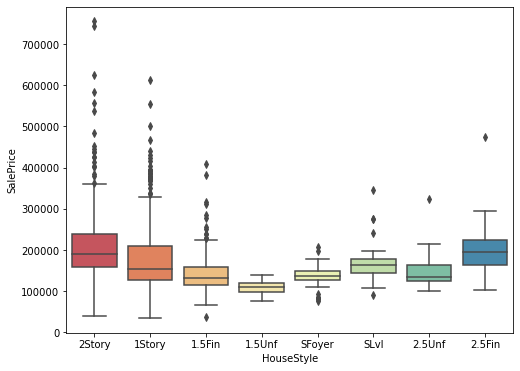

<Figure size 432x288 with 0 Axes>

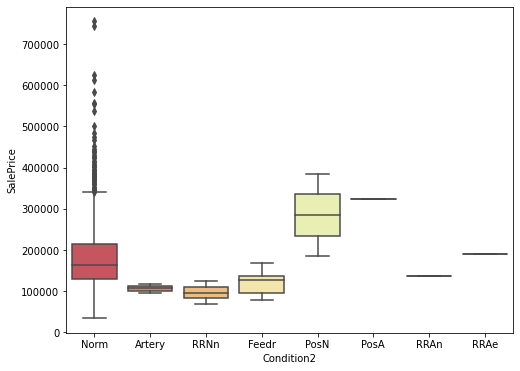

<Figure size 432x288 with 0 Axes>

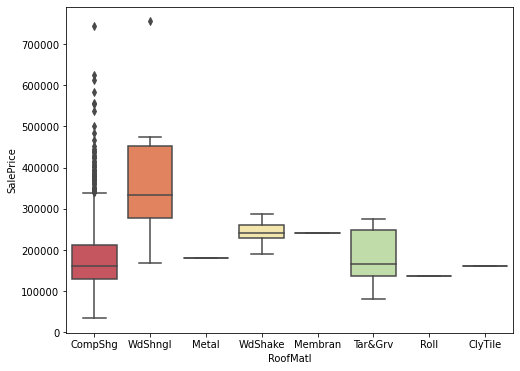

<Figure size 432x288 with 0 Axes>

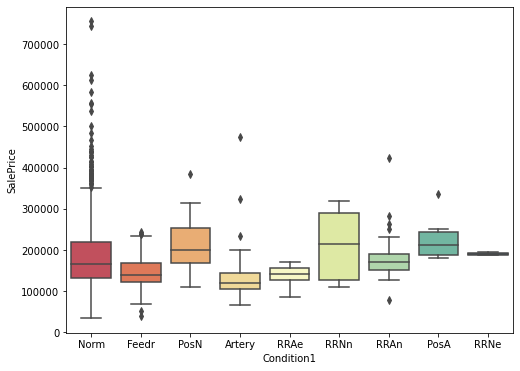

<Figure size 432x288 with 0 Axes>

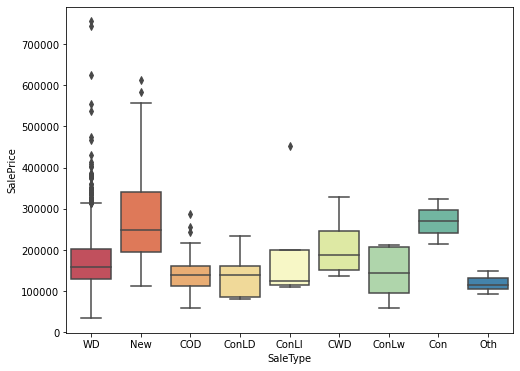

<Figure size 432x288 with 0 Axes>

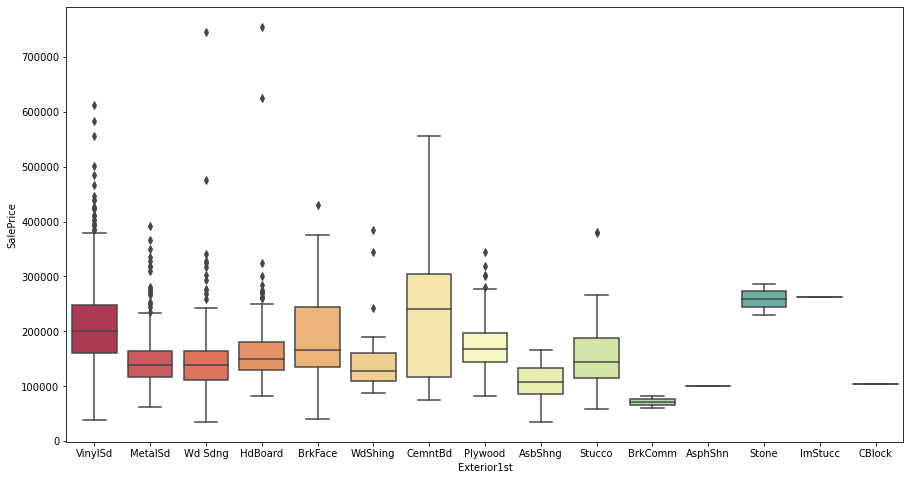

<Figure size 432x288 with 0 Axes>

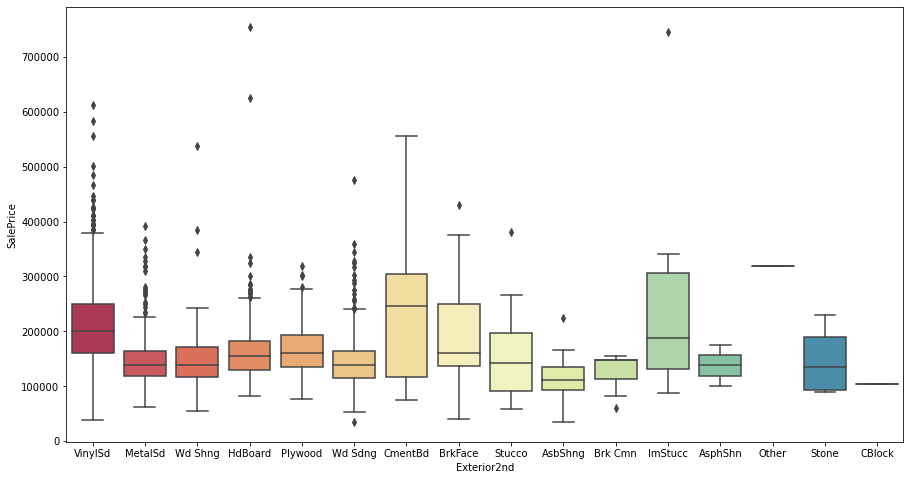

<Figure size 432x288 with 0 Axes>

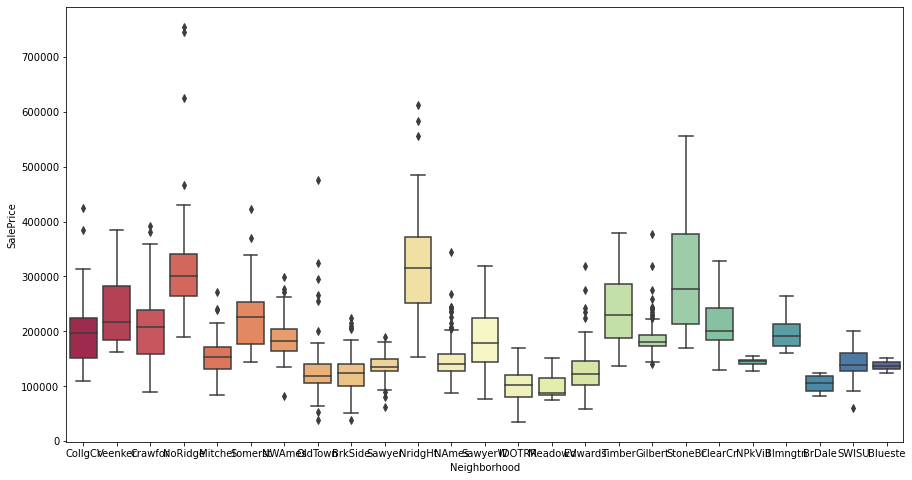

In [41]:
for i, val in enumerate(unique_cat):
    if val<4:
        bi_boxplot(i, unique_cat.keys()[i], figsize = (7,5))
    elif val<10:
        bi_boxplot(i, unique_cat.keys()[i], figsize = (8,6))
    else:
        bi_boxplot(i, unique_cat.keys()[i], figsize = (15,8))

In [42]:
def joinplots(idx, col):
    """
    To plot joinplots for two variables. 
    Here constant variable is SalePrice.
    """
    plt.figure(idx)
    sns.jointplot(x=col, y="SalePrice", data=house_data)
    plt.show()

<Figure size 432x288 with 0 Axes>

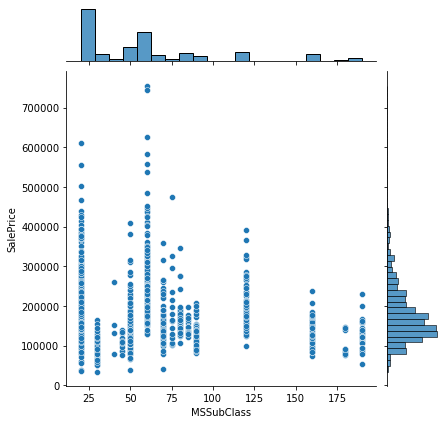

<Figure size 432x288 with 0 Axes>

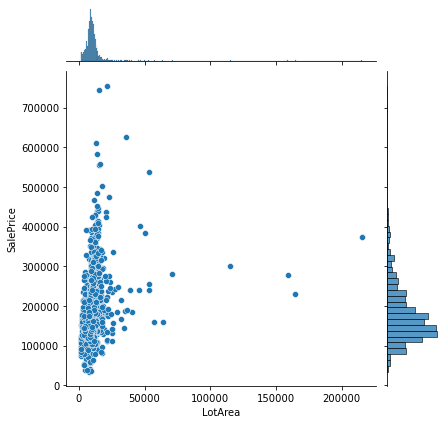

<Figure size 432x288 with 0 Axes>

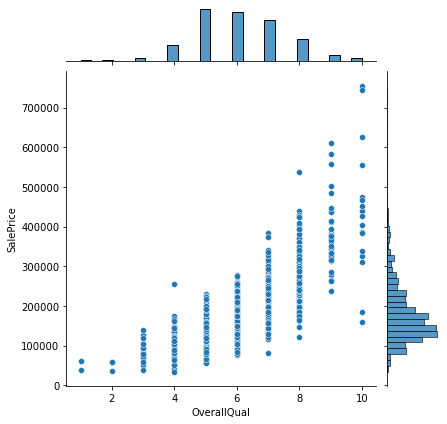

<Figure size 432x288 with 0 Axes>

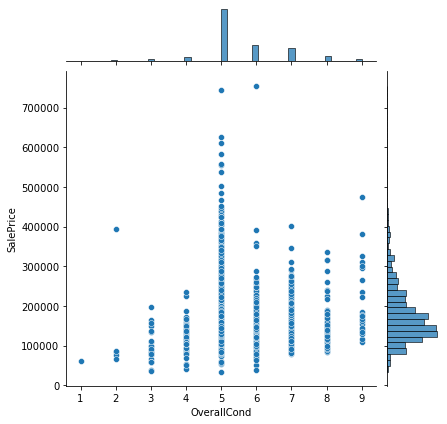

<Figure size 432x288 with 0 Axes>

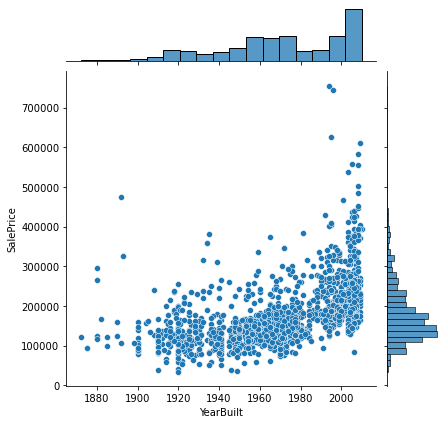

<Figure size 432x288 with 0 Axes>

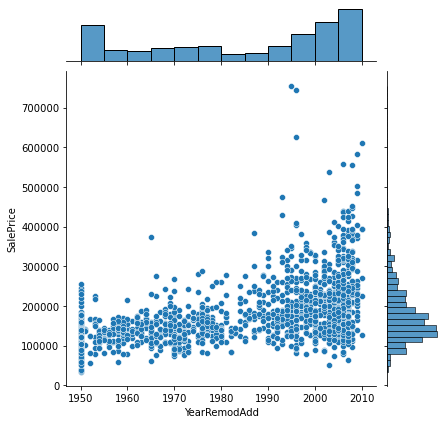

<Figure size 432x288 with 0 Axes>

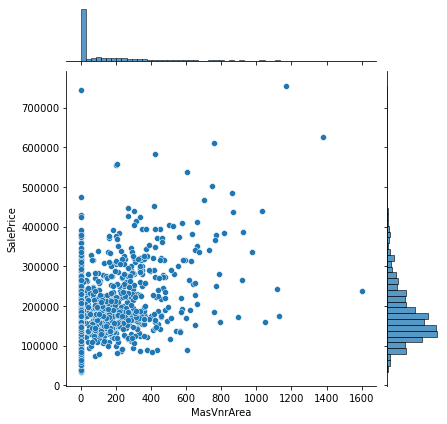

<Figure size 432x288 with 0 Axes>

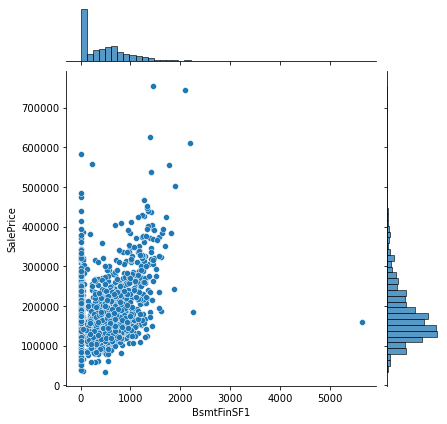

<Figure size 432x288 with 0 Axes>

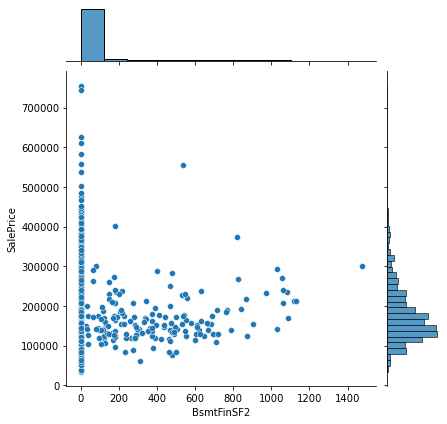

<Figure size 432x288 with 0 Axes>

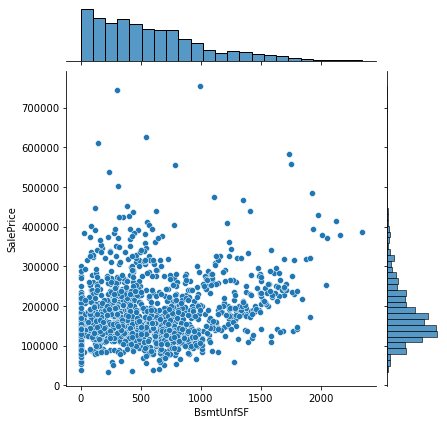

<Figure size 432x288 with 0 Axes>

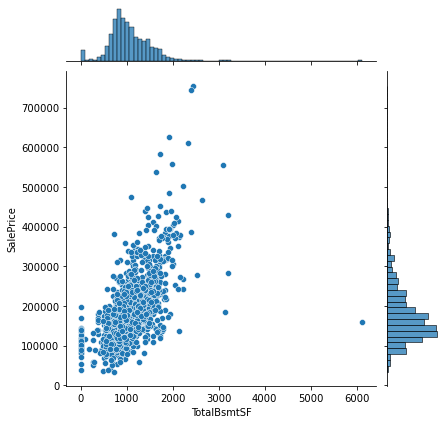

<Figure size 432x288 with 0 Axes>

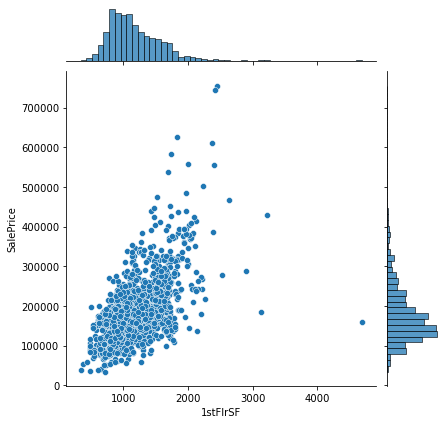

<Figure size 432x288 with 0 Axes>

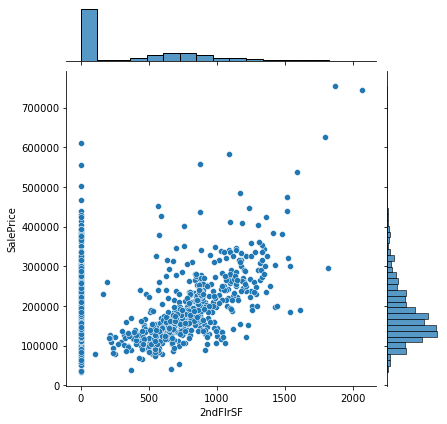

<Figure size 432x288 with 0 Axes>

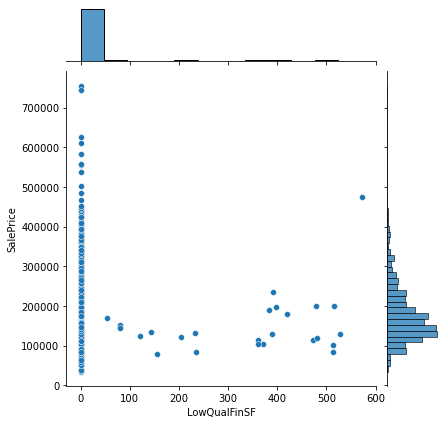

<Figure size 432x288 with 0 Axes>

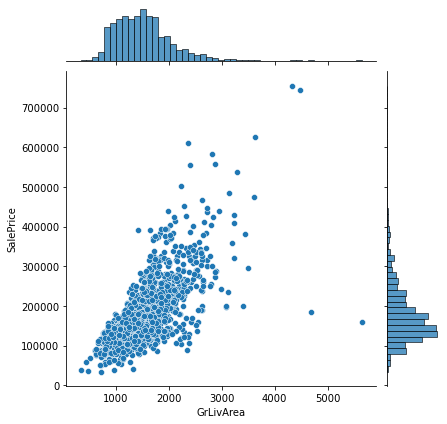

<Figure size 432x288 with 0 Axes>

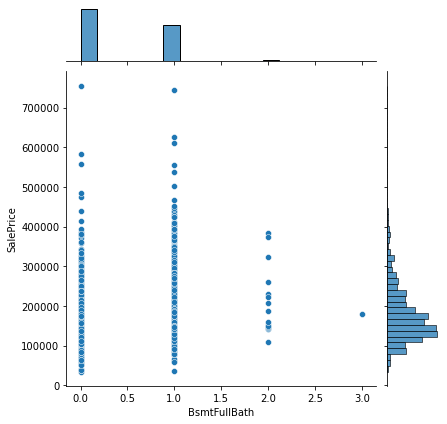

<Figure size 432x288 with 0 Axes>

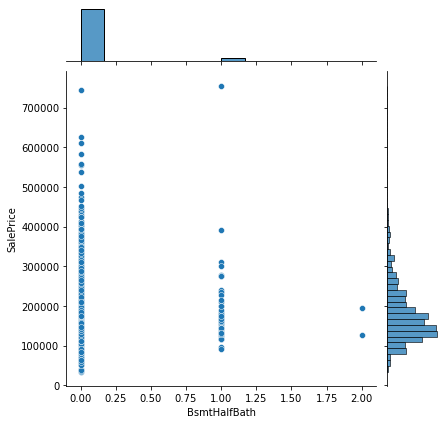

<Figure size 432x288 with 0 Axes>

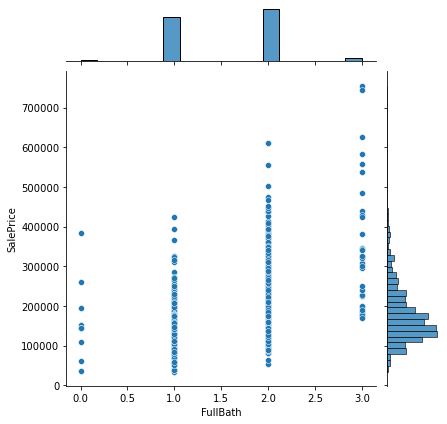

<Figure size 432x288 with 0 Axes>

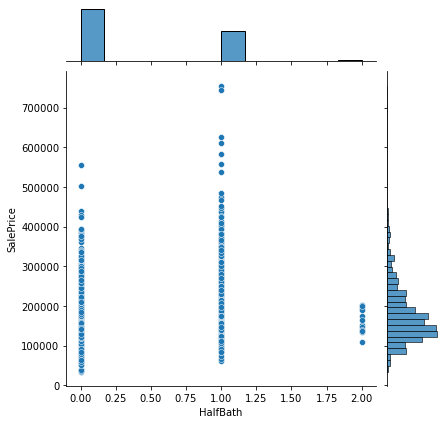

<Figure size 432x288 with 0 Axes>

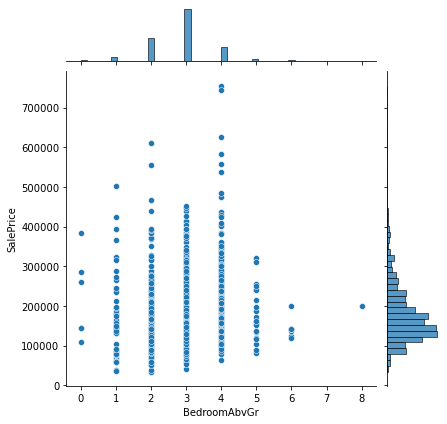

<Figure size 432x288 with 0 Axes>

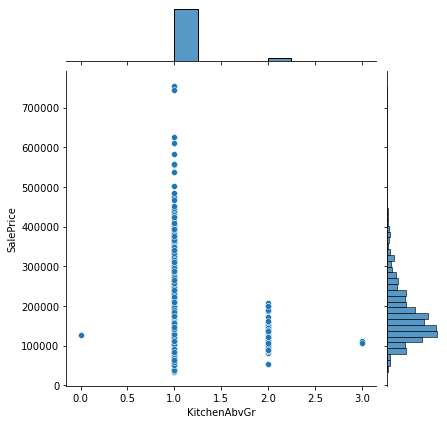

<Figure size 432x288 with 0 Axes>

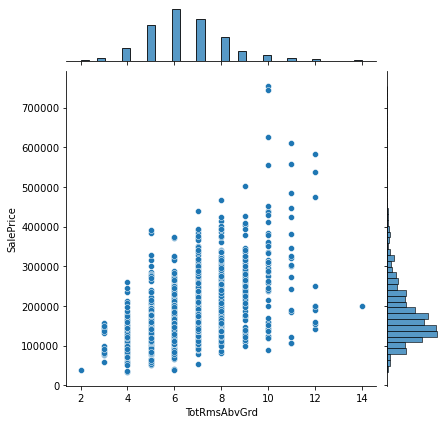

<Figure size 432x288 with 0 Axes>

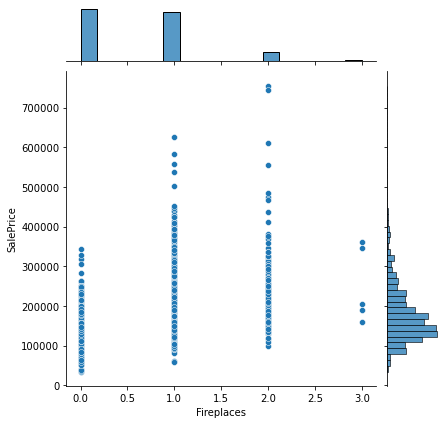

<Figure size 432x288 with 0 Axes>

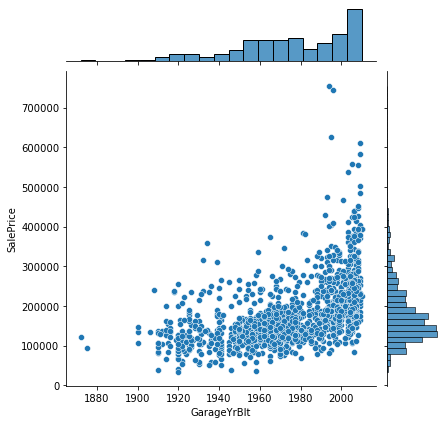

<Figure size 432x288 with 0 Axes>

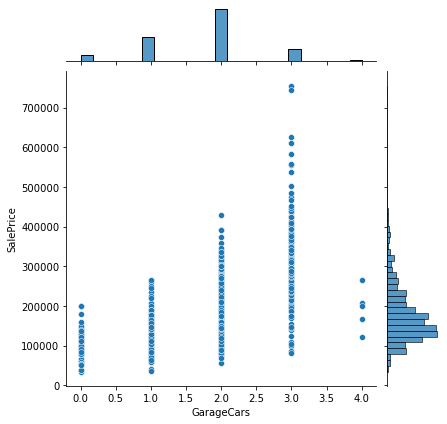

<Figure size 432x288 with 0 Axes>

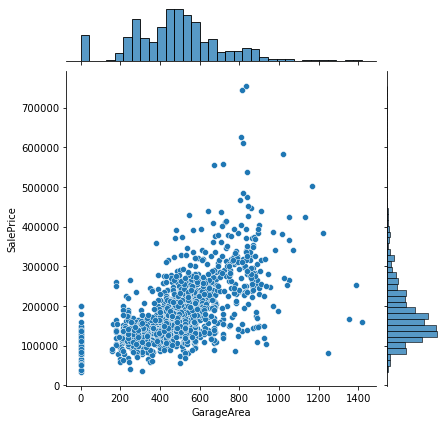

<Figure size 432x288 with 0 Axes>

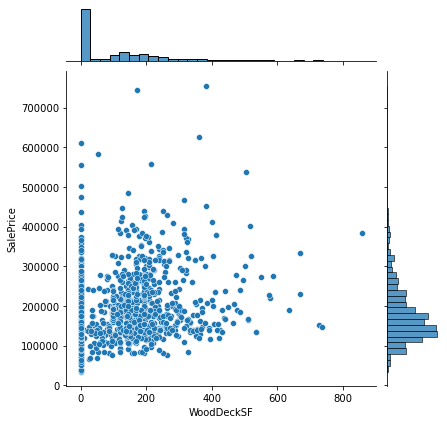

<Figure size 432x288 with 0 Axes>

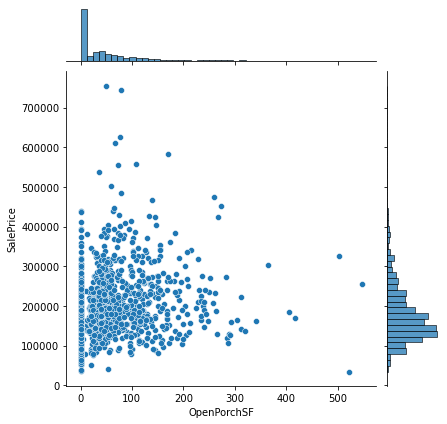

<Figure size 432x288 with 0 Axes>

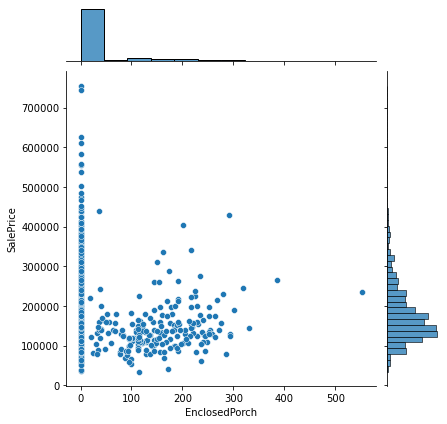

<Figure size 432x288 with 0 Axes>

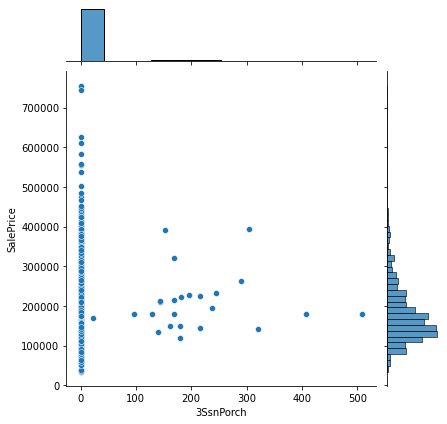

<Figure size 432x288 with 0 Axes>

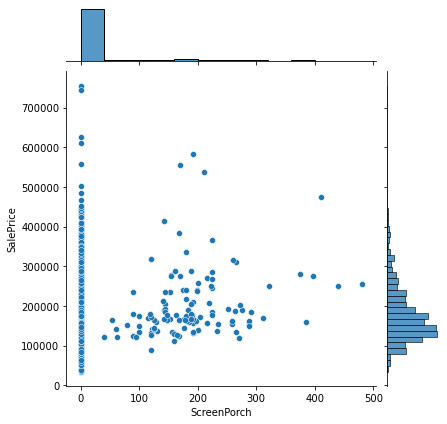

<Figure size 432x288 with 0 Axes>

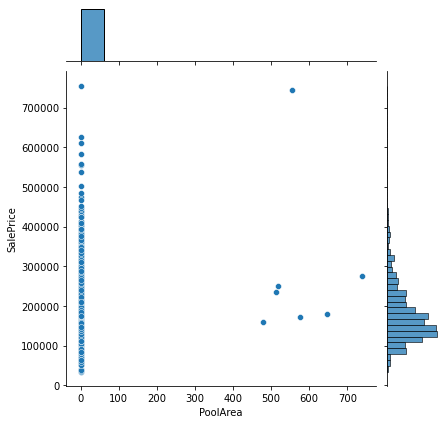

<Figure size 432x288 with 0 Axes>

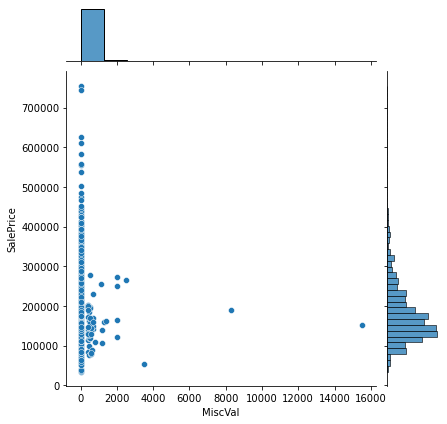

<Figure size 432x288 with 0 Axes>

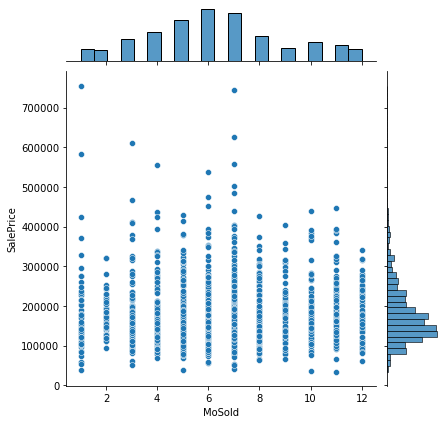

<Figure size 432x288 with 0 Axes>

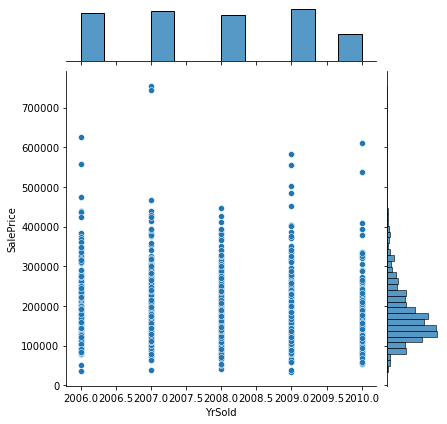

In [43]:
for i, col in enumerate(numeric.columns):
    if col!="SalePrice":
        joinplots(i, col)

### c. Multivarent Analysis

In [44]:
cor_house = house_data.corr()
cor_house

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass       1.000000 -0.138039     0.034799    -0.061147   0.027979   
LotArea         -0.138039  1.000000     0.106305    -0.002297   0.015708   
OverallQual      0.034799  0.106305     1.000000    -0.090940   0.572129   
OverallCond     -0.061147 -0.002297    -0.090940     1.000000  -0.376557   
YearBuilt        0.027979  0.015708     0.572129    -0.376557   1.000000   
YearRemodAdd     0.040664  0.015190     0.550499     0.075545   0.590324   
MasVnrArea       0.023156  0.104141     0.411699    -0.128333   0.316345   
BsmtFinSF1      -0.069241  0.213081     0.236421    -0.042292   0.250209   
BsmtFinSF2      -0.066037  0.111674    -0.058211     0.039234  -0.047609   
BsmtUnfSF       -0.138789 -0.004250     0.309461    -0.137104   0.150218   
TotalBsmtSF     -0.236547  0.258538     0.536836    -0.167932   0.394285   
1stFlrSF        -0.249775  0.295977     0.476645    -0.139260   0.285655   
2ndFlrSF         0.307931  0.052979     0.299021     0.027720   0.009036   
LowQualFinSF     0.046463  0.004897    -0.030071     0.025099  -0.183738   
GrLivArea        0.077025  0.261152     0.594431    -0.076631   0.199621   
BsmtFullBath     0.004115  0.157695     0.108108    -0.051877   0.187085   
BsmtHalfBath    -0.002542  0.048365    -0.039348     0.117217  -0.036897   
FullBath         0.136051  0.122526     0.552939    -0.190170   0.469310   
HalfBath         0.175813  0.016364     0.272338    -0.061030   0.239672   
BedroomAbvGr    -0.021715  0.117788     0.106013     0.014334  -0.068781   
KitchenAbvGr     0.286684 -0.024708    -0.184799    -0.081338  -0.173867   
TotRmsAbvGrd     0.042300  0.188012     0.430817    -0.055864   0.097251   
Fireplaces      -0.044127  0.269677     0.400090    -0.020470   0.151023   
GarageYrBlt      0.039936  0.004451     0.554734    -0.296309   0.844146   
GarageCars      -0.039167  0.154761     0.600055    -0.184777   0.537508   
GarageArea      -0.098027  0.180767     0.560502    -0.151204   0.478948   
WoodDeckSF      -0.012652  0.173170     0.240728    -0.004514   0.226960   
OpenPorchSF     -0.005200  0.086278     0.303215    -0.031432   0.185758   
EnclosedPorch   -0.010437 -0.023114    -0.113176     0.074612  -0.386748   
3SsnPorch       -0.044009  0.020568     0.030972     0.025123   0.032145   
ScreenPorch     -0.026316  0.043498     0.066271     0.053925  -0.048977   
PoolArea         0.008240  0.077885     0.065720    -0.002254   0.005368   
MiscVal         -0.007773  0.038221    -0.031183     0.068617  -0.033994   
MoSold          -0.013659  0.003177     0.068514    -0.004210   0.009756   
YrSold          -0.021583 -0.012969    -0.025116     0.043487  -0.014559   
SalePrice       -0.082760  0.264668     0.790085    -0.076361   0.523274   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
MSSubClass         0.040664    0.023156   -0.069241   -0.066037  -0.138789   
LotArea            0.015190    0.104141    0.213081    0.111674  -0.004250   
OverallQual        0.550499    0.411699    0.236421   -0.058211   0.309461   
OverallCond        0.075545   -0.128333   -0.042292    0.039234  -0.137104   
YearBuilt          0.590324    0.316345    0.250209   -0.047609   0.150218   
YearRemodAdd       1.000000    0.180136    0.128422   -0.066485   0.182219   
MasVnrArea         0.180136    1.000000    0.264469   -0.072443   0.114298   
BsmtFinSF1         0.128422    0.264469    1.000000   -0.049498  -0.496605   
BsmtFinSF2        -0.066485   -0.072443   -0.049498    1.000000  -0.209806   
BsmtUnfSF          0.182219    0.114298   -0.496605   -0.209806   1.000000   
TotalBsmtSF        0.292985    0.363667    0.520098    0.106092   0.415900   
1stFlrSF           0.243464    0.344255    0.442838    0.098654   0.318053   
2ndFlrSF           0.139804    0.174874   -0.135330   -0.099445   0.006341   
LowQualFinSF      -0.061980   -0.069127   -0.064447    0.014596   0.028245   
GrLivArea          0.288569    0

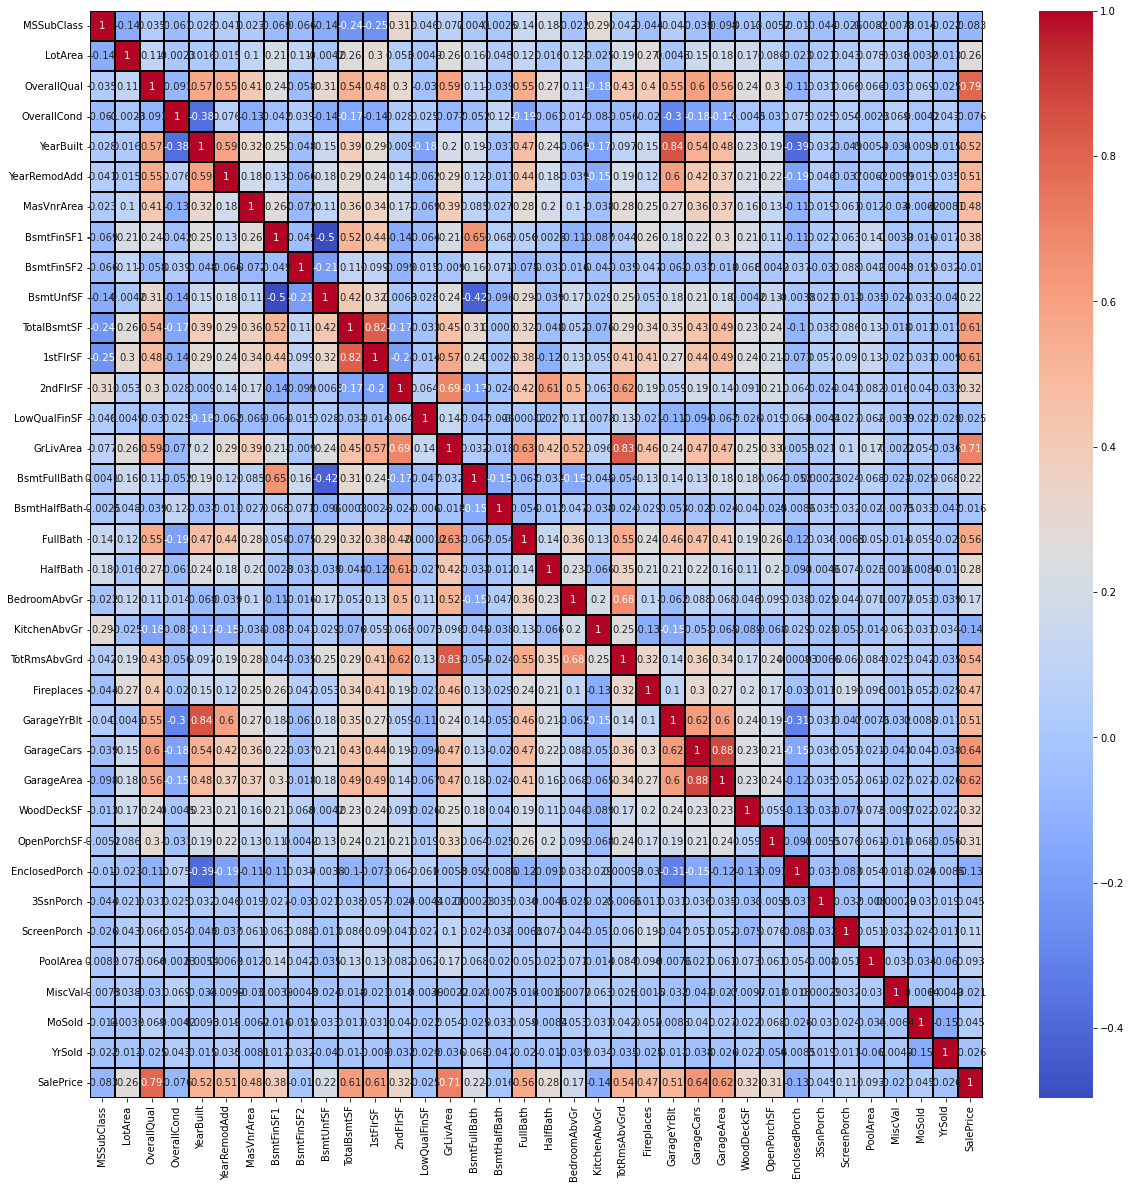

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(cor_house, cmap="coolwarm", annot=True, linecolor="black", linewidths=1)
plt.show() 

- Here we can see that **'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea'**. Total of 13 variables have more than 0.4 correlation with **SalePrice**.
- We will get some insight into these 13 variables

In [46]:
high_coor = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']
len(high_coor)

13

<Figure size 432x288 with 0 Axes>

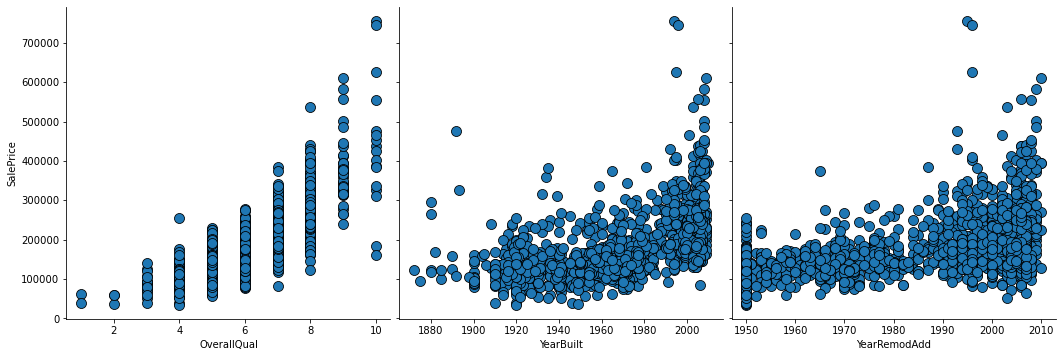

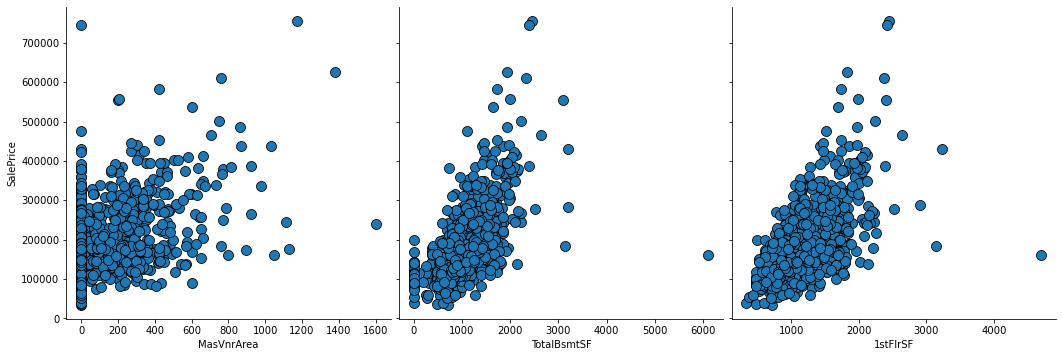

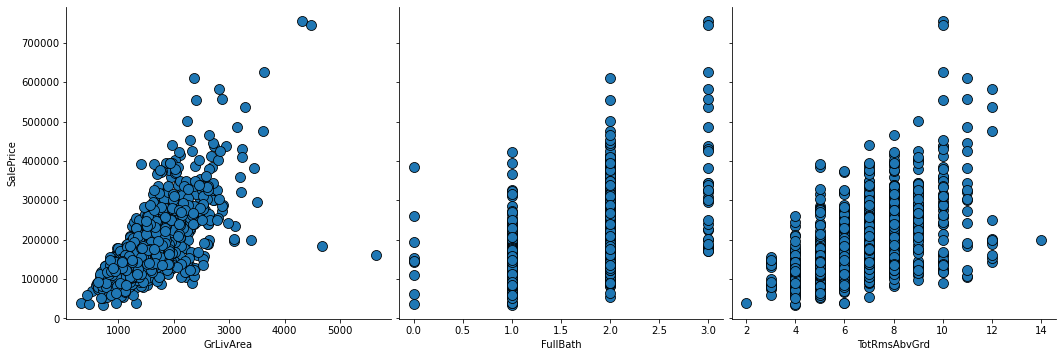

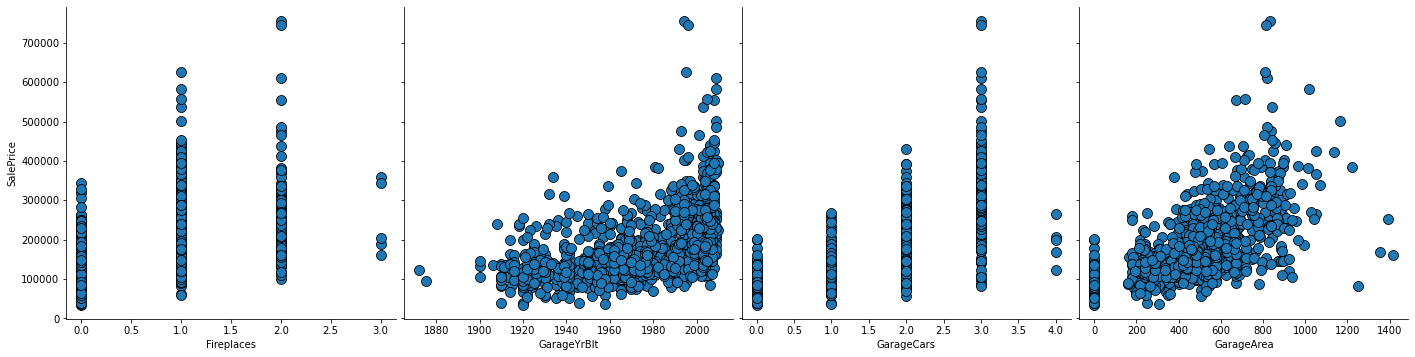

In [47]:
plt.figure(1)
ax = sns.pairplot(data = house_data, y_vars = 'SalePrice', x_vars=high_coor[:3] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.figure(2)
ax = sns.pairplot(data = house_data, y_vars = 'SalePrice', x_vars=high_coor[3:6] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.figure(3)
ax = sns.pairplot(data = house_data, y_vars = 'SalePrice', x_vars=high_coor[6:9] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.figure(4)
ax = sns.pairplot(data = house_data, y_vars = 'SalePrice', x_vars=high_coor[9:] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.show()

- Plotting pair plot for those variables which show correlation above 60
- Here, we can see that when an increase in the OverallQual value increases the SalePrice. 
- Increase in  YearBuilt, YearRemodAdd, FullBath, TotRmsAbvGrd also increased the salePrice
- People usually prefer 'Fireplaces', 'GarageCars', 'GarageArea' in the mid than man. 

In [48]:
coor_60 = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
len(coor_60)

6

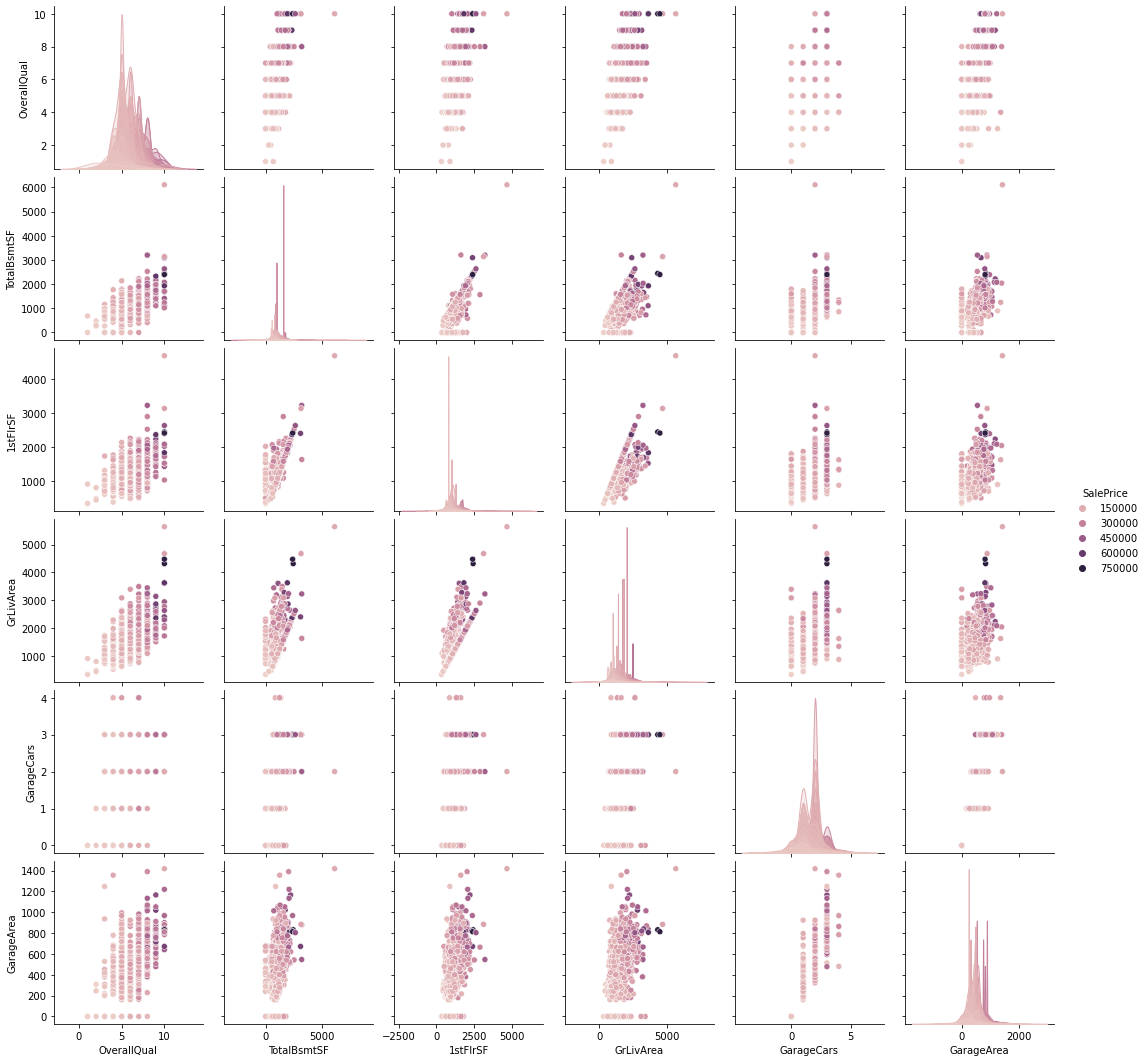

In [49]:
g = sns.pairplot(data = house_data, hue = 'SalePrice', vars=coor_60 )
plt.show()

## Step 3: Data Preparation
- Create dummy variable

In [50]:
categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [51]:
for i, val in enumerate(unique_cat):
    if val <=2:
        print(unique_cat.keys()[i] , val)

Street 2
CentralAir 2
Utilities 2


In [52]:
# Street, CentralAir, Utilities have only two unique variables. 
house_data['Street'] = house_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
house_data['CentralAir'] = house_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)                                                 
house_data['Utilities'] = house_data['Utilities'].apply(lambda x : 1 if x == 'AllPub' else 0)

In [53]:
# Getting only the categorical variables. 
categorical = house_data.select_dtypes(include=['object'])
categorical.shape

(1451, 35)

In [54]:
# converting all the categorical variables into dummies
dummy_cat = pd.get_dummies(categorical, drop_first=True)
dummy_cat.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                1  ...               0               0             0   
1                1  ...               0               0             0   
2                1  ...               0               0             0   
3                1  ...               0               0             0   
4                1  ...               0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 202 columns]

In [55]:
categorical.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [56]:
# Dropping those categorical variables which are converted into dummies. 
house_data = house_data.drop(categorical.columns, axis=1)
house_data.shape

(1451, 39)

In [57]:
# contacting the dummies and house_data
final_house_data = pd.concat([dummy_cat, house_data], axis=1)
final_house_data.shape

(1451, 241)

In [58]:
final_house_data.sample()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
1224            0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1224             0             0                0                0   

      LandContour_Lvl  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1224                1  ...         100           75              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
1224            0         0        0       2    2008     184000  

[1 rows x 241 columns]

In [59]:
final_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 241 entries, MSZoning_FV to SalePrice
dtypes: float64(2), int64(37), uint8(202)
memory usage: 779.7 KB


## Step 4: Splitting the Data into Training and Testing Sets
- Split the dataset

In [60]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [61]:
y = final_house_data.SalePrice
y.shape

(1451,)

In [62]:
X = final_house_data.drop("SalePrice", axis=1)
X.shape

(1451, 240)

In [63]:
np.random.seed(0)
# dividing the dataset into train and test with 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 100)

In [64]:
print(X_train.shape, X_test.shape)

(1015, 240) (436, 240)


*****
### Rescalling feature of house dataframe
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 
- However, I m going to use Standardisation scal.

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
# getting the numerical variables which have dtype of 'int64','float64'
num_val = X_train.select_dtypes(include=['int64','float64']).columns
num_val

Index(['MSSubClass', 'LotArea', 'Street', 'Utilities', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [67]:
# Scaling the data
scaler = StandardScaler()
X_train[num_val] = scaler.fit_transform(X_train[num_val])
X_test[num_val] = scaler.transform(X_test[num_val])

In [68]:
X_train.describe()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
count  1015.000000  1015.000000  1015.000000   1015.00000   1015.000000   
mean      0.040394     0.008867     0.788177      0.15665      0.030542   
std       0.196979     0.093793     0.408801      0.36365      0.172158   
min       0.000000     0.000000     0.000000      0.00000      0.000000   
25%       0.000000     0.000000     1.000000      0.00000      0.000000   
50%       0.000000     0.000000     1.000000      0.00000      0.000000   
75%       0.000000     0.000000     1.000000      0.00000      0.000000   
max       1.000000     1.000000     1.000000      1.00000      1.000000   

       LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
count   1015.000000   1015.000000      1015.000000      1015.000000   
mean       0.008867      0.631527         0.030542         0.025616   
std        0.093793      0.482628         0.172158         0.158064   
min        0.000000      0.000000         0.000000         0.000000   
25%        0.000000      0.000000         0.000000         0.000000   
50%        0.000000      1.000000         0.000000         0.000000   
75%        0.000000      1.000000         0.000000         0.000000   
max        1.000000      1.000000         1.000000         1.000000   

       LandContour_Lvl  ...    GarageArea    WoodDeckSF   OpenPorchSF  \
count      1015.000000  ...  1.015000e+03  1.015000e+03  1.015000e+03   
mean          0.900493  ...  2.991159e-17  5.753471e-17  8.344447e-17   
std           0.299490  ...  1.000493e+00  1.000493e+00  1.000493e+00   
min           0.000000  ... -2.236303e+00 -7.366845e-01 -6.893597e-01   
25%           1.000000  ... -6.527278e-01 -7.366845e-01 -6.893597e-01   
50%           1.000000  ...  2.594715e-02 -7.366845e-01 -3.288531e-01   
75%           1.000000  ...  4.783971e-01  6.415831e-01  3.056386e-01   
max           1.000000  ...  4.446760e+00  6.294121e+00  7.198525e+00   

       EnclosedPorch     3SsnPorch   ScreenPorch      PoolArea       MiscVal  \
count   1.015000e+03  1.015000e+03  1.015000e+03  1.015000e+03  1.015000e+03   
mean   -2.325452e-16  3.585528e-16 -4.375263e-17 -8.999369e-17 -1.482120e-17   
std     1.000493e+00  1.000493e+00  1.000493e+00  1.000493e+00  1.000493e+00   
min    -3.554431e-01 -1.303628e-01 -2.727884e-01 -6.943210e-02 -1.650657e-01   
25%    -3.554431e-01 -1.303628e-01 -2.727884e-01 -6.943210e-02 -1.650657e-01   
50%    -3.554431e-01 -1.303628e-01 -2.727884e-01 -6.943210e-02 -1.650657e-01   
75%    -3.554431e-01 -1.303628e-01 -2.727884e-01 -6.943210e-02 -1.650657e-01   
max     8.515276e+00  1.475727e+01  8.019626e+00  1.847889e+01  1.354314e+01   

             MoSold        YrSold  
count  1.015000e+03  1.015000e+03  
mean  -3.543963e-17  3.633000e-15  
std    1.000493e+00  1.000493e+00  
min   -1.943420e+00 -1.371639e+00  
25%   -8.243362e-01 -6.243424e-01  
50%   -7.828070e-02  1.229542e-01  
75%    6.677748e-01  8.702509e-01  
max    2.159886e+00  1.617548e+00  

[8 rows x 240 columns]

## Step 5: Building a model using Linear, Ridge and Lasso Regression
- Model A: Without log and scale on SalePrice.
- Model B: log on SalePrice and without StandardScaler()
- Model C: log on SalePrice with StandardScaler()
 
### Model A: Without log and scale on y.

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE

#### Implementing RFE

In [70]:
# Building a Regression model.
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [71]:
# Calculating the RFE
rfe = RFE(lin_reg, 20)
rfe = rfe.fit(X_train, y_train)

In [72]:
# making a list of column names, support and ranking of RFE
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [73]:
# converting the list to df and sorting by rank
rfe_df = pd.DataFrame(rfe_list, columns=["name", "support", "rank"])
rfe_df.sort_values(by = "rank")[0:22]

name  support  rank
137  BsmtFinType1_NO-BA     True     1
75     RoofMatl_Tar&Grv     True     1
177       GarageQual_Fa     True     1
178       GarageQual_Gd     True     1
180       GarageQual_Po     True     1
181       GarageQual_TA     True     1
182       GarageCond_Fa     True     1
183       GarageCond_Gd     True     1
74        RoofMatl_Roll     True     1
185       GarageCond_Po     True     1
186       GarageCond_TA     True     1
77     RoofMatl_WdShngl     True     1
125         BsmtQual_TA     True     1
123         BsmtQual_Gd     True     1
76     RoofMatl_WdShake     True     1
73       RoofMatl_Metal     True     1
50      Condition2_PosA     True     1
51      Condition2_PosN     True     1
71     RoofMatl_CompShg     True     1
122         BsmtQual_Fa     True     1
159      KitchenQual_Fa    False     2
161      KitchenQual_TA    False     3

In [74]:
col=X_train.columns[rfe.support_]
col

Index(['Condition2_PosA', 'Condition2_PosN', 'RoofMatl_CompShg',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtFinType1_NO-BA', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [75]:
X_train_rfe=X_train[col]

*****
### Building linear model using statsmodel, for the detailed statistics
#### Model A1: Linear Model:

In [76]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     52.93
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          4.49e-141
Time:                        23:33:26   Log-Likelihood:                -12520.
No. Observations:                1015   AIC:                         2.508e+04
Df Residuals:                     994   BIC:                         2.519e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.118e+05   5.62

In [78]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [79]:

# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
19       GarageCond_TA  204.41
15       GarageQual_TA  179.02
12       GarageQual_Fa   57.73
16       GarageCond_Fa   39.43
13       GarageQual_Gd   18.71
18       GarageCond_Po   11.50
17       GarageCond_Gd   10.71
2     RoofMatl_CompShg    7.07
14       GarageQual_Po    5.91
10         BsmtQual_TA    2.67
9          BsmtQual_Gd    2.57
7     RoofMatl_WdShngl    1.44
8          BsmtQual_Fa    1.40
5     RoofMatl_Tar&Grv    1.37
11  BsmtFinType1_NO-BA    1.25
6     RoofMatl_WdShake    1.14
0      Condition2_PosA    1.10
4        RoofMatl_Roll    1.09
3       RoofMatl_Metal    1.04
1      Condition2_PosN    1.01

- As we can see, it has high VIF values, and we can check the linear assumptions. 

In [80]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict_linear = model.predict(X_train_rfe)

In [81]:
residual = y_train - y_train_predict_linear

In [82]:
sum(residual)

2.8294743970036507e-07

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

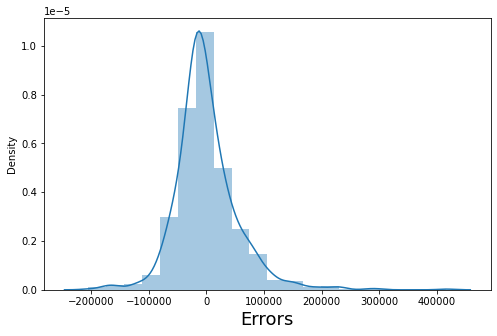

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

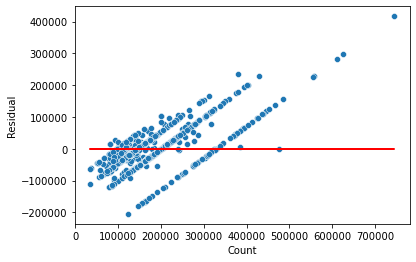

In [84]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see that this **linear model is violating all the Assumption** of Linear Regression:
- Error terms should be independent 
- Error terms should be normally distributed 
- Error terms should have equal variance 

This indicates ***non linearity** is present, and also it shows **high VIF(multicollinearity)**. 
Hence, we have to use either **Ridge or Lasso**.

In [85]:
# R-squared value for train and test
print("R-squared value")
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_predict_linear))

R-squared value
Train:  0.5157349513416158


In [86]:
# Root mean_squared_error value for train and test for Linear model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_predict_linear) ** 0.5)

Root mean_squared_error value
Train:  55076.83132849542


## Model A2: Redge Regression

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}

ridge = Ridge()
# Cross Validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 32 candidates, totalling 224 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:   10.0s finished


GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 40}
-18914.888518507425


In [90]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.026736      0.005074         0.012751        0.003572      0.0001   
1        0.023301      0.001062         0.010935        0.000813       0.001   
2        0.025272      0.002662         0.011752        0.002018        0.01   
3        0.023730      0.000986         0.011152        0.000635        0.05   
4        0.023071      0.002834         0.012129        0.002807         0.1   
5        0.023579      0.004309         0.011819        0.002111         0.2   
6        0.015601      0.007522         0.014191        0.005542         0.3   
7        0.024532      0.006875         0.013979        0.006022         0.4   
8        0.027904      0.006791         0.003948        0.006245         0.5   
9        0.024866      0.003886         0.010904        0.006511         0.6   
10       0.023164      0.007534         0.011371        0.007190         0.7   
11       0.025436      0.007549         0.001537        0.003374         0.8   
12       0.017909      0.005947         0.011691        0.007654         0.9   
13       0.026575      0.008761         0.011195        0.006386           1   
14       0.023558      0.010554         0.009921        0.008598           2   
15       0.017726      0.010033         0.013197        0.007132           3   
16       0.019164      0.009433         0.008451        0.009268           4   
17       0.020912      0.006104         0.007470        0.008638           5   
18       0.018617      0.001892         0.006712        0.007615           6   
19       0.022576      0.007764         0.005866        0.009262           7   
20       0.021033      0.007104         0.010701        0.005826           8   
21       0.022550      0.006587         0.006921        0.005046           9   
22       0.023644      0.003395         0.010235        0.003059          10   
23       0.024920      0.006018         0.007567        0.004266          20   
24       0.023741      0.004208         0.009931        0.001829          30   
25       0.020919      0.002782         0.009432        0.002229          40   
26       0.022206      0.003673         0.011747        0.004485          50   
27       0.025416      0.004991         0.013584        0.004221          60   
28       0.016831      0.002002         0.007625        0.000789          70   
29       0.016753      0.002774         0.007309        0.001223         100   
30       0.016362      0.003190         0.007974        0.001606         500   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -25188.032791      -17894.611770   
1    {'alpha': 0.001}      -25185.322543      -17892.167117   
2     {'alpha': 0.01}      -25158.693449      -17960.043962   
3     {'alpha': 0.05}      -25049.309510      -18487.873787   
4      {'alpha': 0.1}      -24933.392910      -18797.266278   
5      {'alpha': 0.2}      -24742.366105      -18930.001545   
6      {'alpha': 0.3}      -24603.757480      -18872.205098   
7      {'alpha': 0.4}      -24495.849368      -18791.177598   
8      {'alpha': 0.5}      -24400.906946      -18712.005361   
9      {'alpha': 0.6}      -24316.207396      -18696.114917   
10     {'alpha': 0.7}      -24239.772037      -18680.497459   
11     {'alpha': 0.8}      -24171.487243      -18673.801424   
12     {'alpha': 0.9}      -24114.094829      -18668.365730   
13     {'alpha': 1.0}      -24079.163372      -18662.422579   
14     {'alpha': 2.0}      -23822.652137      -18536.351055   
15     {'alpha': 3.0}      -23677.819544      -18432.319080   
16     {'alpha': 4.0}      -23586.535092      -18384.184350   
17     {'alpha': 5.0}      -23513.638946      -18352.032302   
18     {'alpha': 6.0}      -23477.926187      -18322.143748   
19     {'alpha': 7.0}      -23464.740032      -18287.135308   
20     {'alpha': 8.0}      -23467.444871      -18251.585413   
21     {'alpha': 9.0}      -23469.987762      -18227.3182

In [91]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

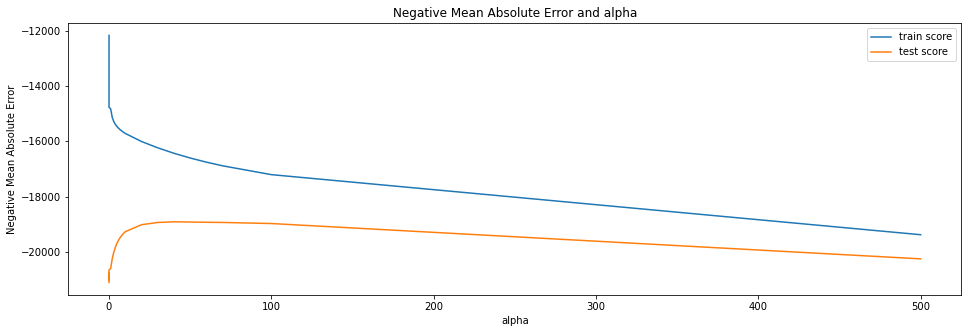

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

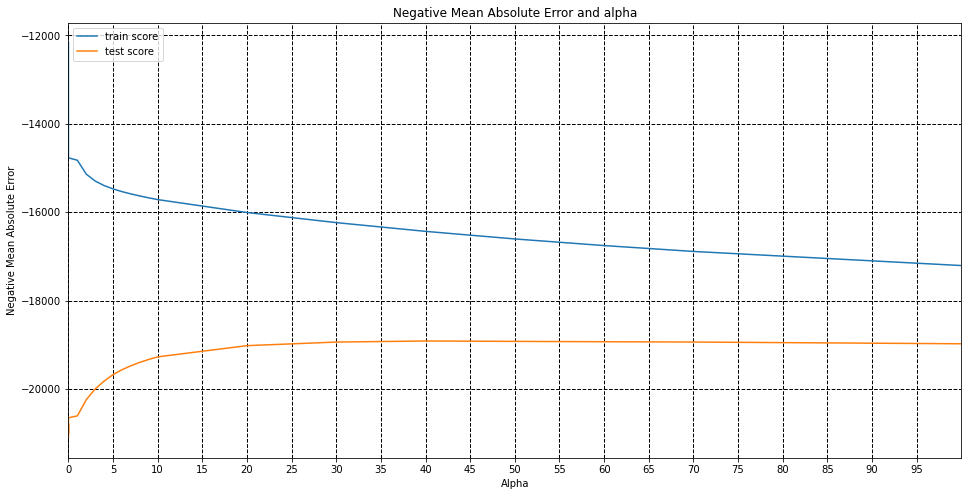

In [93]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [94]:
# final ridge model with alpha as 40

ridge = Ridge(alpha=40)
ridge.fit(X_train, y_train)

Ridge(alpha=40)

In [95]:
np.array(sorted(ridge.coef_, reverse=True))

array([ 1.77790075e+04,  1.48090707e+04,  1.38618805e+04,  1.16626667e+04,
        1.11240630e+04,  9.36452019e+03,  9.01504034e+03,  8.92257923e+03,
        8.53293221e+03,  7.64045532e+03,  7.39104283e+03,  7.26789711e+03,
        7.09995443e+03,  6.69792391e+03,  6.39752430e+03,  6.24557557e+03,
        6.01791327e+03,  5.83139303e+03,  5.74252413e+03,  5.61638474e+03,
        5.51968625e+03,  5.43017943e+03,  5.24207472e+03,  5.21581753e+03,
        5.17397707e+03,  4.95677881e+03,  4.29232434e+03,  4.28601856e+03,
        4.03004832e+03,  4.00203907e+03,  3.91479059e+03,  3.84618794e+03,
        3.80936502e+03,  3.48610808e+03,  3.46019043e+03,  3.28830054e+03,
        3.27914125e+03,  3.09529870e+03,  3.02733177e+03,  3.01100085e+03,
        2.96265961e+03,  2.86201426e+03,  2.79953131e+03,  2.78712976e+03,
        2.70766757e+03,  2.69707827e+03,  2.56146631e+03,  2.52805670e+03,
        2.47987619e+03,  2.47239484e+03,  2.33759482e+03,  2.28338506e+03,
        2.18715946e+03,  

In [96]:
from sklearn.metrics import r2_score, mean_squared_error

In [97]:
# R-squared value for train and test
print("R-squared value")
y_train_pred_ridge = ridge.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

R-squared value
Train:  0.8723135351770149
Test:  0.8632817505778796


In [98]:
# Root mean_squared_error value for train and test
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge) ** 0.5)

Root mean_squared_error value
Train:  28281.329088034396
Test:  29422.77711794914


## Model A3: Lasso Regression

In [99]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 7 folds for each of 32 candidates, totalling 224 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:  1.0min finished


GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-19113.64666325131


In [101]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.298778      0.061249         0.007852        0.002269      0.0001   
1        0.312890      0.052217         0.008153        0.002448       0.001   
2        0.331465      0.049948         0.007893        0.002515        0.01   
3        0.268131      0.038380         0.006400        0.001161        0.05   
4        0.320220      0.054867         0.007988        0.002020         0.1   
5        0.274903      0.035467         0.007778        0.002411         0.2   
6        0.311210      0.051032         0.009153        0.002242         0.3   
7        0.255477      0.042253         0.006702        0.002491         0.4   
8        0.265400      0.048755         0.006215        0.001204         0.5   
9        0.292187      0.060525         0.009321        0.004860         0.6   
10       0.370255      0.033268         0.009880        0.005739         0.7   
11       0.255456      0.030346         0.007294        0.002316         0.8   
12       0.260718      0.061200         0.007676        0.002055         0.9   
13       0.282323      0.061868         0.008407        0.001601           1   
14       0.247375      0.028893         0.005970        0.000758           2   
15       0.274850      0.054688         0.007850        0.002081           3   
16       0.265676      0.052008         0.007154        0.002326           4   
17       0.344996      0.084496         0.006358        0.005558           5   
18       0.375271      0.024862         0.009033        0.007500           6   
19       0.300468      0.083128         0.008278        0.004961           7   
20       0.257714      0.056305         0.006748        0.001816           8   
21       0.208490      0.072136         0.006881        0.001694           9   
22       0.274677      0.068204         0.009750        0.001529          10   
23       0.187828      0.070283         0.007021        0.002915          20   
24       0.210604      0.066010         0.005922        0.002256          30   
25       0.193243      0.074310         0.006931        0.000913          40   
26       0.198903      0.086226         0.007549        0.004447          50   
27       0.291413      0.022855         0.010229        0.005217          60   
28       0.216028      0.024836         0.007730        0.005724          70   
29       0.161799      0.010130         0.011865        0.001442         100   
30       0.048301      0.005457         0.011705        0.000747         500   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -25145.104925      -17883.126309   
1    {'alpha': 0.001}      -25143.724121      -17882.883170   
2     {'alpha': 0.01}      -25136.231672      -17880.458384   
3     {'alpha': 0.05}      -25130.068621      -17869.982631   
4      {'alpha': 0.1}      -25121.083573      -17857.649793   
5      {'alpha': 0.2}      -25108.947896      -17833.824665   
6      {'alpha': 0.3}      -25102.347297      -17810.652989   
7      {'alpha': 0.4}      -25095.484226      -17787.349679   
8      {'alpha': 0.5}      -25088.860802      -17763.669508   
9      {'alpha': 0.6}      -25082.251152      -17737.836638   
10     {'alpha': 0.7}      -25077.894757      -17712.707882   
11     {'alpha': 0.8}      -25073.495727      -17688.385635   
12     {'alpha': 0.9}      -25069.042620      -17663.298282   
13     {'alpha': 1.0}      -25063.165433      -17639.100824   
14     {'alpha': 2.0}      -24985.400894      -17501.499395   
15     {'alpha': 3.0}      -24913.585341      -17433.428058   
16     {'alpha': 4.0}      -24837.479282      -17404.470555   
17     {'alpha': 5.0}      -24791.416106      -17400.238078   
18     {'alpha': 6.0}      -24745.297952      -17399.874249   
19     {'alpha': 7.0}      -24683.503479      -17377.014795   
20     {'alpha': 8.0}      -24612.736191      -17365.042188   
21     {'alpha': 9.0}      -24538.577579      -17369.0242

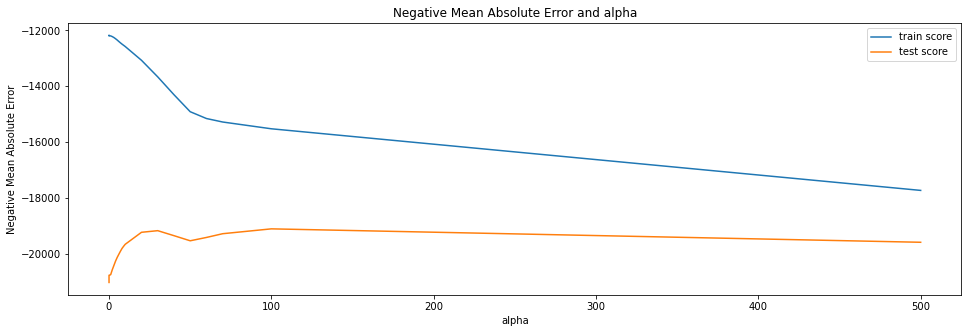

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

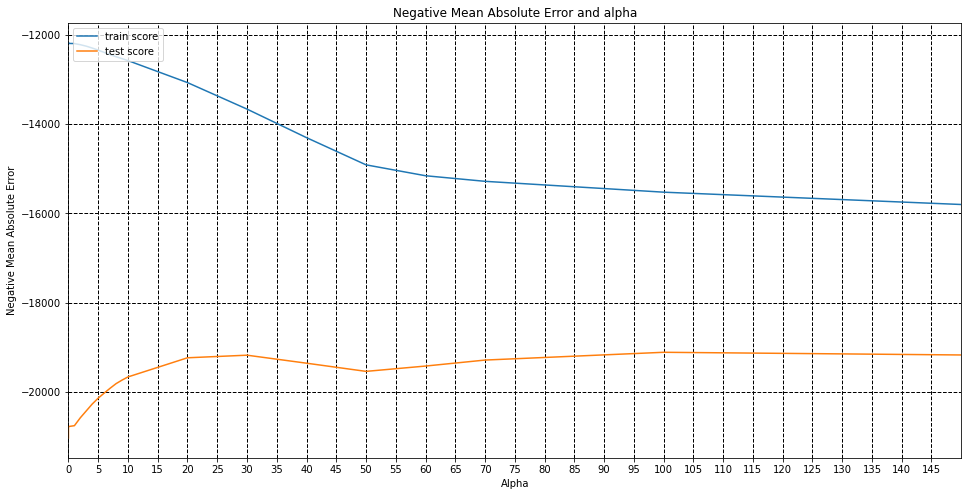

In [103]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 150)
plt.xticks(np.arange(0, 150, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [104]:
#final lasso model
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [105]:
np.array(sorted(lasso.coef_, reverse=True))

array([ 3.71665970e+04,  3.60425010e+04,  3.02515342e+04,  2.62344276e+04,
        2.45843970e+04,  2.07839695e+04,  1.82719274e+04,  1.75112526e+04,
        1.74184930e+04,  1.54021694e+04,  1.39163598e+04,  1.26904158e+04,
        1.20013671e+04,  1.14196446e+04,  1.11220627e+04,  1.00736497e+04,
        9.68616311e+03,  9.59796759e+03,  8.30544639e+03,  7.27203473e+03,
        7.23545446e+03,  6.54753407e+03,  6.29754041e+03,  6.00611369e+03,
        5.89469613e+03,  5.75424911e+03,  5.21335280e+03,  5.08765255e+03,
        4.27858960e+03,  3.98335435e+03,  3.67902559e+03,  3.57587978e+03,
        3.51393828e+03,  3.42105555e+03,  3.01880482e+03,  2.98358920e+03,
        2.84298125e+03,  2.80562112e+03,  2.61184848e+03,  2.11560126e+03,
        2.08665694e+03,  2.06548062e+03,  1.94026006e+03,  1.92750070e+03,
        1.90869648e+03,  1.90648741e+03,  1.70214909e+03,  1.67735677e+03,
        1.25188660e+03,  1.24838218e+03,  1.17037345e+03,  1.03471209e+03,
        1.03159186e+03,  

In [106]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

R-squared value
Train:  0.8987189712154843
Test:  0.8666593320915111


In [107]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

Root mean_squared_error value
Train:  25187.86957993444
Test:  29057.06404123562


In [108]:
residual = y_train - y_train_pred_lasso

In [109]:
sum(residual)

-7.130438461899757e-10

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

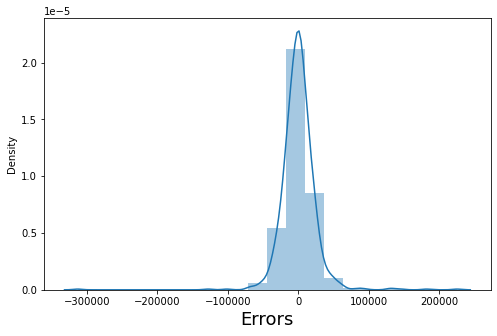

In [110]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

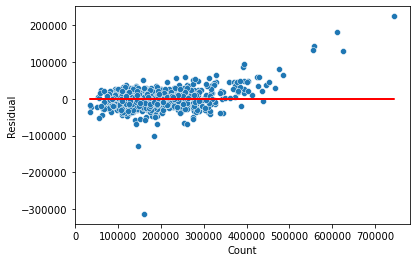

In [111]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see that this Lasso model is **not violating** all the Assumption of Linear Regression:
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or **Residual is almost 0.**
- Error terms should have equal variance 

However, Assumption still has some outliers, and this is because **SalePrice** columns, which have lots of outliers as we saw in EDA.

- We will try to reduce it using **log on SalePrice** to reduce it as it shows the **right skewness** in the distplot.

## Ridge VS Lasso
### For Ridge:
**Alpha: 40**

**R-squared value for Ridge**
- Train:  0.872
- Test:  0.863

**mean_squared_error value**
- Train:  28281.329
- Test:  29422.777
******
### For Lasso:
**Alpha: 100**

**R-squared value**
- Train:  0.899
- Test:  0.867

**mean_squared_error value**
- Train:  25187.870
- Test:  29057.064

Here we can clearly see that **Lasso** model did better becasue there is less **gap between R2 of train and test** and has **higher r2** for train and test.
**************

In [112]:
model_coef = pd.DataFrame(index=range(len(X_train.columns)))
model_coef["col"] = X_train.columns
model_coef["ridge_cof"] = ridge.coef_
model_coef["Abs_ridge_cof"] = list(np.abs(cof) for cof in ridge.coef_)
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)


In [113]:
model_coef.sort_values(by="Abs_lasso_cof", ascending=False)

col     ridge_cof  Abs_ridge_cof      lasso_cof  \
51        Condition2_PosN  -7124.485760    7124.485760 -220826.080569   
77       RoofMatl_WdShngl   4286.018558    4286.018558   37166.596980   
30   Neighborhood_NoRidge  13861.880511   13861.880511   36042.500973   
31   Neighborhood_NridgHt  14809.070668   14809.070668   30251.534186   
37   Neighborhood_StoneBr   8532.932210    8532.932210   26234.427622   
..                    ...           ...            ...            ...   
97    Exterior2nd_HdBoard  -1459.428951    1459.428951      -0.000000   
99    Exterior2nd_MetalSd    245.997976     245.997976       0.000000   
100     Exterior2nd_Other    265.110042     265.110042      -0.000000   
101   Exterior2nd_Plywood  -1191.880929    1191.880929       0.000000   
120      Foundation_Stone     69.427803      69.427803       0.000000   

     Abs_lasso_cof  
51   220826.080569  
77    37166.596980  
30    36042.500973  
31    30251.534186  
37    26234.427622  
..             ...  
97        0.000000  
99        0.000000  
100       0.000000  
101       0.000000  
120       0.000000  

[240 rows x 5 columns]

In [114]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

col      lasso_cof  Abs_lasso_cof
51        Condition2_PosN -220826.080569  220826.080569
77       RoofMatl_WdShngl   37166.596980   37166.596980
30   Neighborhood_NoRidge   36042.500973   36042.500973
31   Neighborhood_NridgHt   30251.534186   30251.534186
37   Neighborhood_StoneBr   26234.427622   26234.427622
219             GrLivArea   24584.396957   24584.396957
5            LotShape_IR3  -23629.697541   23629.697541
71       RoofMatl_CompShg   20783.969497   20783.969497
123           BsmtQual_Gd  -18834.583930   18834.583930
98    Exterior2nd_ImStucc   18271.927423   18271.927423
160        KitchenQual_Gd  -18218.754728   18218.754728
161        KitchenQual_TA  -18174.819527   18174.819527
130       BsmtExposure_Gd   17511.252630   17511.252630
21   Neighborhood_Crawfor   17418.493000   17418.493000
206           OverallQual   15402.169438   15402.169438

In [115]:
ridge_coef = model_coef[["col", "ridge_cof", "Abs_ridge_cof"]].sort_values(by="Abs_ridge_cof", ascending=False)
ridge_coef.head(15)

col     ridge_cof  Abs_ridge_cof
206           OverallQual  17779.007477   17779.007477
31   Neighborhood_NridgHt  14809.070668   14809.070668
30   Neighborhood_NoRidge  13861.880511   13861.880511
123           BsmtQual_Gd -12945.130206   12945.130206
219             GrLivArea  11662.666690   11662.666690
229            GarageCars  11124.063016   11124.063016
22   Neighborhood_Edwards -10444.019134   10444.019134
160        KitchenQual_Gd -10278.271619   10278.271619
161        KitchenQual_TA  -9702.053260    9702.053260
41        Condition1_Norm   9364.520189    9364.520189
130       BsmtExposure_Gd   9015.040337    9015.040337
217              2ndFlrSF   8922.579231    8922.579231
37   Neighborhood_StoneBr   8532.932210    8532.932210
125           BsmtQual_TA  -7764.426348    7764.426348
21   Neighborhood_Crawfor   7640.455325    7640.455325

## Model B: Log on SalePrice

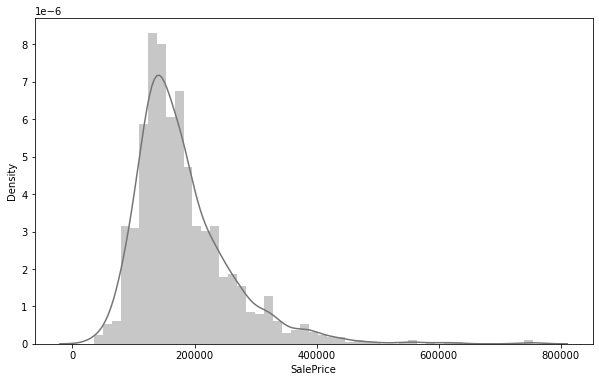

In [116]:
# orginal SalePrice without log
plt.figure(figsize=(10,6))
sns.distplot(house_data.SalePrice, color="#757575")
plt.show()

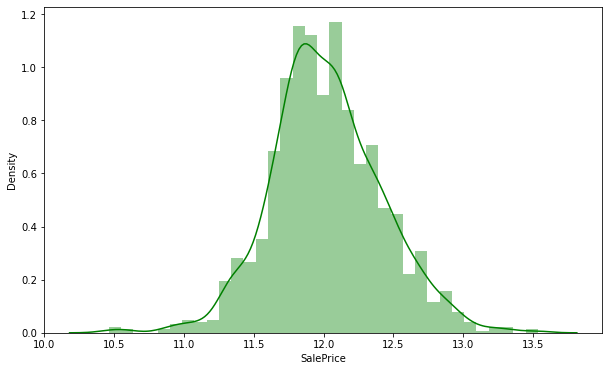

In [117]:
# SalePrice with log
plt.figure(figsize=(10,6))
sns.distplot(np.log(house_data.SalePrice), color="green")
plt.show()

After applying the **log on SalePrice**, we can see that it started following the normal distribution plot.

In [118]:
y_train = np.log(y_train)
y_test = np.log(y_test)

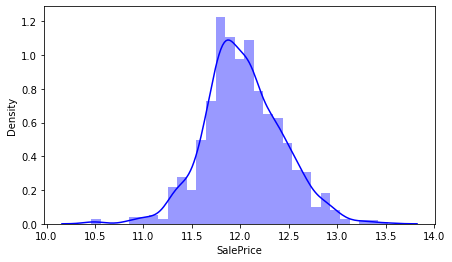

In [119]:
plt.figure(figsize=(7,4))
sns.distplot(y_train, color="blue")
plt.show()

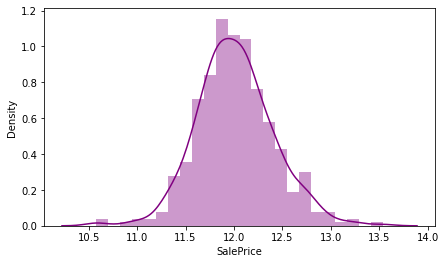

In [120]:
plt.figure(figsize=(7,4))
sns.distplot(y_test, color="purple")
plt.show()

## Model B1 (linear model)

In [121]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     51.81
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          9.76e-139
Time:                        23:34:45   Log-Likelihood:                -148.50
No. Observations:                1015   AIC:                             339.0
Df Residuals:                     994   BIC:                             442.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.6051      0

In [122]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [123]:

# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
19       GarageCond_TA  204.41
15       GarageQual_TA  179.02
12       GarageQual_Fa   57.73
16       GarageCond_Fa   39.43
13       GarageQual_Gd   18.71
18       GarageCond_Po   11.50
17       GarageCond_Gd   10.71
2     RoofMatl_CompShg    7.07
14       GarageQual_Po    5.91
10         BsmtQual_TA    2.67
9          BsmtQual_Gd    2.57
7     RoofMatl_WdShngl    1.44
8          BsmtQual_Fa    1.40
5     RoofMatl_Tar&Grv    1.37
11  BsmtFinType1_NO-BA    1.25
6     RoofMatl_WdShake    1.14
0      Condition2_PosA    1.10
4        RoofMatl_Roll    1.09
3       RoofMatl_Metal    1.04
1      Condition2_PosN    1.01

As you

In [124]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict_linear = model.predict(X_train_rfe)

In [125]:
residual = y_train - y_train_predict_linear

In [126]:
sum(residual)

-1.6058265828178264e-12

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

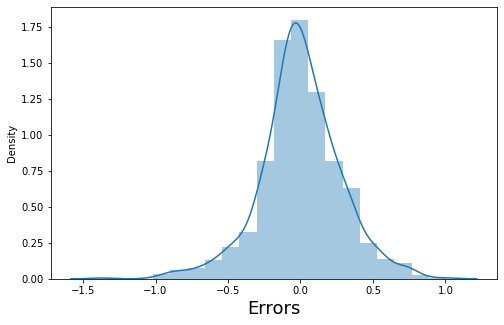

In [127]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

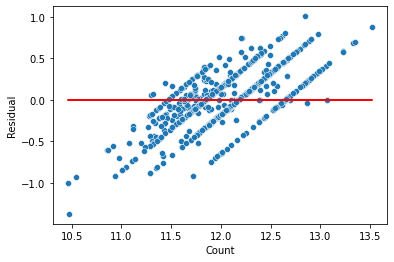

In [128]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see that this **linear model is violating all the Assumption** of Linear Regression:
- Error terms should be independent 
- Error terms should be normally distributed 
- Error terms should have equal variance 

This indicates ***non linearity** is present, and also it shows **high VIF(multicollinearity)**. 
Hence, we have to use either **Ridge or Lasso**.

In [129]:
# R-squared value for train and test
print("R-squared value")
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_predict_linear))

R-squared value
Train:  0.5103700088451688


In [130]:
# Root mean_squared_error value for train and test for Linear model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_predict_linear) ** 0.5)

Root mean_squared_error value
Train:  0.2800943462534741


## Model B2: Redge Regression

In [131]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}

ridge = Ridge()
# Cross Validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 32 candidates, totalling 224 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:   10.4s finished


GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.09288705406031707


In [133]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.023943      0.003096         0.009264        0.002672      0.0001   
1        0.024429      0.002220         0.010762        0.001246       0.001   
2        0.023776      0.002574         0.010278        0.001182        0.01   
3        0.024555      0.000819         0.010320        0.001790        0.05   
4        0.024678      0.001001         0.011095        0.000422         0.1   
5        0.025468      0.000714         0.010620        0.001086         0.2   
6        0.023388      0.003815         0.010460        0.000775         0.3   
7        0.023879      0.001985         0.010706        0.000979         0.4   
8        0.024474      0.001218         0.011373        0.001244         0.5   
9        0.024246      0.000919         0.010759        0.000828         0.6   
10       0.020379      0.005599         0.014081        0.006407         0.7   
11       0.024381      0.011281         0.010443        0.008545         0.8   
12       0.017805      0.009232         0.006940        0.003250         0.9   
13       0.020517      0.004911         0.009118        0.002409           1   
14       0.023537      0.000903         0.010071        0.001092           2   
15       0.023130      0.002546         0.010154        0.001445           3   
16       0.025436      0.002383         0.010988        0.000576           4   
17       0.023620      0.002019         0.010199        0.002148           5   
18       0.023488      0.001533         0.010861        0.001256           6   
19       0.023659      0.001511         0.010140        0.000859           7   
20       0.023782      0.004068         0.009695        0.001898           8   
21       0.022615      0.003026         0.011651        0.003254           9   
22       0.021288      0.006061         0.011312        0.001627          10   
23       0.021695      0.002516         0.010804        0.001056          20   
24       0.023128      0.003310         0.010548        0.003973          30   
25       0.023070      0.006629         0.011138        0.006389          40   
26       0.022476      0.004878         0.008962        0.006369          50   
27       0.022836      0.006124         0.014469        0.006725          60   
28       0.019718      0.004087         0.010178        0.006726          70   
29       0.019062      0.002659         0.011328        0.008226         100   
30       0.028246      0.007865         0.010211        0.008859         500   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.117486          -0.085999   
1    {'alpha': 0.001}          -0.117472          -0.086178   
2     {'alpha': 0.01}          -0.117327          -0.087708   
3     {'alpha': 0.05}          -0.116655          -0.092778   
4      {'alpha': 0.1}          -0.115998          -0.095792   
5      {'alpha': 0.2}          -0.115051          -0.097956   
6      {'alpha': 0.3}          -0.114300          -0.098629   
7      {'alpha': 0.4}          -0.113640          -0.098802   
8      {'alpha': 0.5}          -0.113204          -0.098761   
9      {'alpha': 0.6}          -0.112814          -0.098618   
10     {'alpha': 0.7}          -0.112459          -0.098455   
11     {'alpha': 0.8}          -0.112190          -0.098302   
12     {'alpha': 0.9}          -0.111981          -0.098131   
13     {'alpha': 1.0}          -0.111777          -0.097952   
14     {'alpha': 2.0}          -0.110162          -0.096334   
15     {'alpha': 3.0}          -0.109281          -0.095589   
16     {'alpha': 4.0}          -0.108574          -0.095113   
17     {'alpha': 5.0}          -0.108027          -0.094757   
18     {'alpha': 6.0}          -0.107573          -0.094473   
19     {'alpha': 7.0}          -0.107174          -0.094241   
20     {'alpha': 8.0}          -0.106828          -0.094168   
21     {'alpha': 9.0}          -0.106558          -0.0941

In [134]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

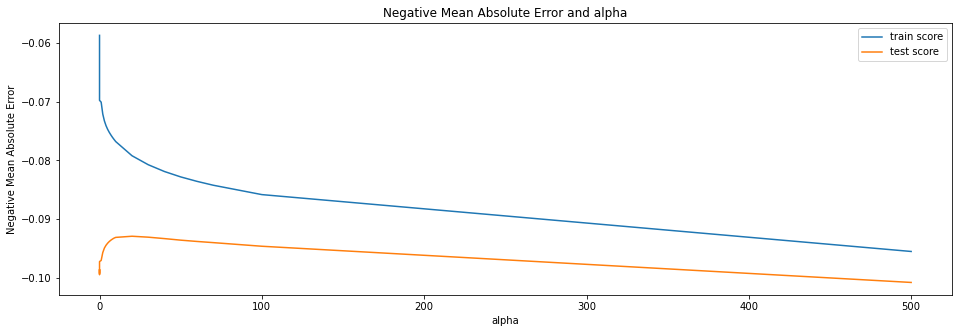

In [135]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

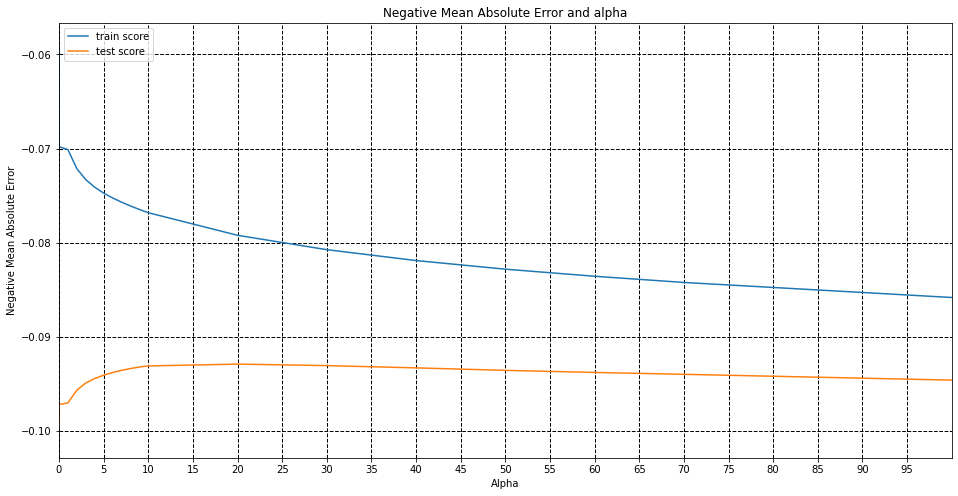

In [136]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [137]:
# final ridge model with alpha as 20 but without log we get alpha as 40

ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [138]:
np.array(sorted(ridge.coef_, reverse=True))

array([ 8.77283820e-02,  7.25612560e-02,  6.85380518e-02,  5.69859739e-02,
        5.69159941e-02,  5.42064613e-02,  5.25530830e-02,  5.18947546e-02,
        4.96932120e-02,  4.71319673e-02,  4.56275365e-02,  4.46367109e-02,
        4.31672987e-02,  4.07788204e-02,  3.95374566e-02,  3.82640465e-02,
        3.70716235e-02,  3.70667448e-02,  3.63039323e-02,  3.54676038e-02,
        3.48973062e-02,  3.24752386e-02,  3.19099512e-02,  3.10714406e-02,
        2.96582156e-02,  2.96378613e-02,  2.95507884e-02,  2.95212193e-02,
        2.82384391e-02,  2.80048762e-02,  2.76351151e-02,  2.69848324e-02,
        2.66237408e-02,  2.63936218e-02,  2.53218115e-02,  2.49086580e-02,
        2.32897485e-02,  2.11904629e-02,  2.08202192e-02,  2.07442209e-02,
        2.05058353e-02,  2.02139562e-02,  1.84793508e-02,  1.84238561e-02,
        1.83783434e-02,  1.83547317e-02,  1.82421176e-02,  1.79861687e-02,
        1.76356630e-02,  1.75042899e-02,  1.71715682e-02,  1.70328199e-02,
        1.66870289e-02,  

In [139]:
# R-squared value for train and test
print("R-squared value")
y_train_pred_ridge = ridge.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

R-squared value
Train:  0.9106854222291274
Test:  0.8942911763399891


In [140]:
# Root mean_squared_error value for train and test
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge) ** 0.5)

Root mean_squared_error value
Train:  0.11962763350162971
Test:  0.12907849237646565


In [141]:
residual = y_train - y_train_pred_ridge

In [142]:
sum(residual)

-1.3145040611561853e-13

## Model B3: Lasso Regression

In [143]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.00001,0.00008,0.00009, 0.0001, 0.0002, 0.0003, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 7 folds for each of 37 candidates, totalling 259 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 259 out of 259 | elapsed:   19.8s finished


GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 8e-05, 9e-05, 0.0001, 0.0002, 0.0003,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.0918457510747469


In [145]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.364821      0.032545         0.010116        0.001546       1e-05   
1        0.169906      0.033331         0.011621        0.005322       8e-05   
2        0.154036      0.029520         0.010284        0.007865       9e-05   
3        0.202916      0.079809         0.009939        0.005189      0.0001   
4        0.212121      0.092787         0.007870        0.005373      0.0002   
5        0.242184      0.025560         0.008831        0.007072      0.0003   
6        0.076955      0.009128         0.010604        0.003233       0.001   
7        0.033327      0.007391         0.010288        0.001574        0.01   
8        0.025504      0.013083         0.007728        0.001699        0.05   
9        0.019486      0.002791         0.007445        0.000816         0.1   
10       0.017178      0.001629         0.007376        0.000802         0.2   
11       0.017056      0.003140         0.007772        0.002457         0.3   
12       0.024881      0.004880         0.009479        0.002797         0.4   
13       0.025933      0.002388         0.011454        0.001382         0.5   
14       0.024356      0.001597         0.008993        0.002601         0.6   
15       0.022746      0.003282         0.010735        0.002159         0.7   
16       0.025058      0.003287         0.010268        0.003684         0.8   
17       0.028549      0.004149         0.003808        0.003656         0.9   
18       0.022161      0.004297         0.011114        0.001367           1   
19       0.021957      0.002153         0.010748        0.004532           2   
20       0.023201      0.003352         0.012455        0.003289           3   
21       0.020737      0.004673         0.007484        0.004120           4   
22       0.025219      0.007892         0.005003        0.004159           5   
23       0.020485      0.006500         0.005542        0.006587           6   
24       0.029348      0.008465         0.011641        0.005958           7   
25       0.017745      0.002130         0.008376        0.002930           8   
26       0.018681      0.004568         0.011205        0.003650           9   
27       0.020490      0.004346         0.009640        0.005939          10   
28       0.018824      0.005719         0.008230        0.004182          20   
29       0.020595      0.005061         0.010694        0.002826          30   
30       0.011618      0.004797         0.008428        0.002797          40   
31       0.017584      0.003513         0.007070        0.001313          50   
32       0.018072      0.003456         0.007252        0.001156          60   
33       0.022052      0.005414         0.006922        0.001621          70   
34       0.013384      0.004234         0.007332        0.001509         100   
35       0.016690      0.007493         0.007338        0.002231         500   

               params  split0_test_score  split1_test_score  \
0    {'alpha': 1e-05}          -0.116624          -0.085707   
1    {'alpha': 8e-05}          -0.111744          -0.084621   
2    {'alpha': 9e-05}          -0.111071          -0.085229   
3   {'alpha': 0.0001}          -0.110425          -0.085965   
4   {'alpha': 0.0002}          -0.107939          -0.091945   
5   {'alpha': 0.0003}          -0.107441          -0.092792   
6    {'alpha': 0.001}          -0.106332          -0.093231   
7     {'alpha': 0.01}          -0.118788          -0.100344   
8     {'alpha': 0.05}          -0.146031          -0.118437   
9      {'alpha': 0.1}          -0.185692          -0.154878   
10     {'alpha': 0.2}          -0.256098          -0.221141   
11     {'alpha': 0.3}          -0.317902          -0.284286   
12     {'alpha': 0.4}          -0.333250          -0.301579   
13     {'alpha': 0.5}          -0.333250          -0.301579   
14     {'alpha': 0.6}          -0.333250          -0.301579   
15     {'alpha': 0.7}          -0.3

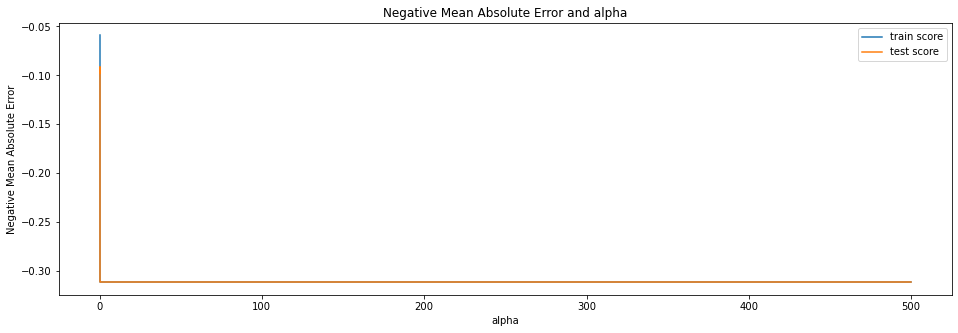

In [146]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

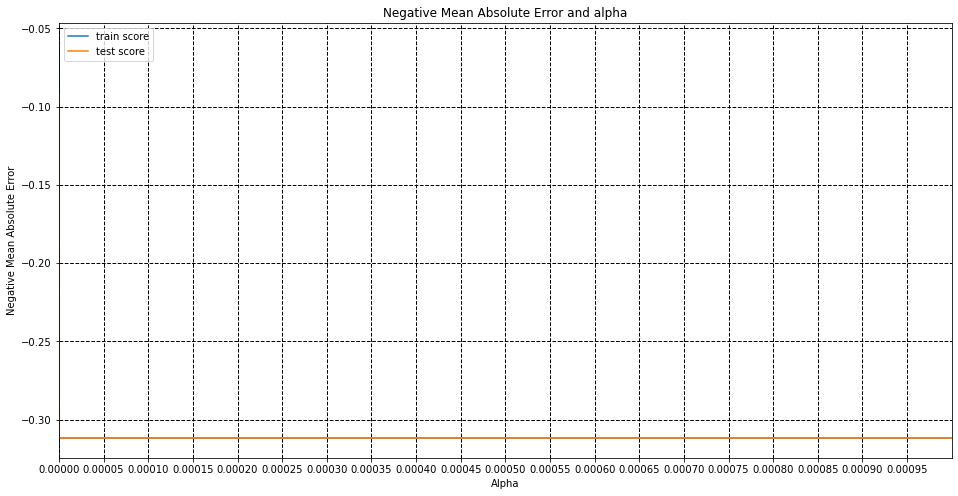

In [147]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0.0, 0.001)
plt.xticks(np.arange(0.0, 0.001, 0.00005))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [148]:
#final lasso model
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [149]:
np.array(sorted(lasso.coef_, reverse=True))

array([ 1.34375992e+00,  1.29002780e+00,  1.22717253e+00,  1.21484524e+00,
        1.20224952e+00,  1.19666118e+00,  4.51120456e-01,  4.38944235e-01,
        4.24507128e-01,  3.65464827e-01,  1.57151945e-01,  1.34473218e-01,
        1.31332668e-01,  1.20090840e-01,  1.11695834e-01,  1.06971344e-01,
        1.05145055e-01,  1.03294625e-01,  9.22441593e-02,  8.98676402e-02,
        8.83398909e-02,  8.62215578e-02,  8.51024537e-02,  8.49778588e-02,
        8.18514491e-02,  7.90541972e-02,  7.38478283e-02,  7.22478459e-02,
        7.19754432e-02,  6.75497911e-02,  6.66723285e-02,  5.93180259e-02,
        5.88012396e-02,  5.53132802e-02,  5.31897801e-02,  5.17533146e-02,
        4.68997144e-02,  4.68205398e-02,  4.62236835e-02,  4.53050455e-02,
        4.38274140e-02,  4.10904391e-02,  4.10670726e-02,  4.07992996e-02,
        3.97001667e-02,  3.96282327e-02,  3.88541229e-02,  3.77334236e-02,
        3.58453906e-02,  3.47558780e-02,  3.44877378e-02,  3.44648324e-02,
        3.41260069e-02,  

In [150]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

R-squared value
Train:  0.9480116334768429
Test:  0.8440370268831053


In [151]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

Root mean_squared_error value
Train:  0.09126902746213651
Test:  0.1567866269738075


In [152]:
residual = y_train - y_train_pred_lasso

In [153]:
sum(residual)

8.704148513061227e-14

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

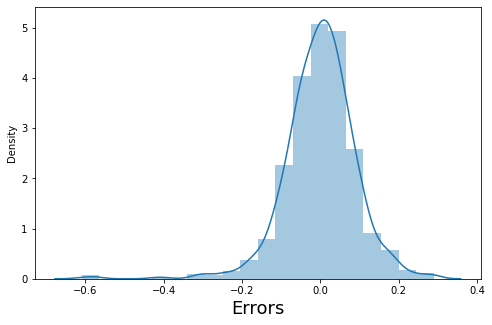

In [154]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

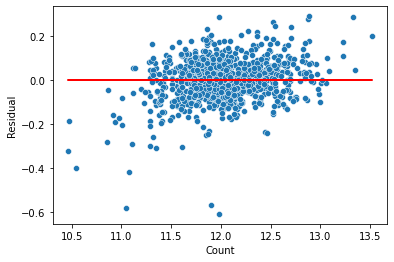

In [155]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see that this Lasso model is not volilating all the Assumption of Linear Regression:
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or Residual is almost 0. 
- Error terms should have equal variance 


## Ridge VS Lasso after applying LOG
### For Ridge: 
**Alpha: 20**

**R-squared value for Ridge**
- Train:  0.910
- Test:  0.894

**mean_squared_error value**
- Train:  0.120
- Test:  0.129

******
### For Lasso:
**Alpha: 0.0001**

**R-squared value**
- Train:  0.948
- Test:  0.844

**mean_squared_error value**
- Train:  0.0913
- Test:   0.157


Here we can see that **Ridge** did better. Cause Lasso shows high R2 for the train but less for the test with a **10% gap.**
- However, **Ridge** shows lower for train, but the **test was higher than the Lasso R2 test.**
**************

In [156]:
model_coef = pd.DataFrame(index=range(len(X_train.columns)))
model_coef["col"] = X_train.columns
model_coef["ridge_cof"] = ridge.coef_
model_coef["Abs_ridge_cof"] = list(np.abs(cof) for cof in ridge.coef_)
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)


In [157]:
model_coef.sort_values(by="Abs_lasso_cof", ascending=False)

col  ridge_cof  Abs_ridge_cof  lasso_cof  Abs_lasso_cof
77      RoofMatl_WdShngl   0.020214       0.020214   1.343760       1.343760
51       Condition2_PosN  -0.051373       0.051373  -1.329836       1.329836
71      RoofMatl_CompShg   0.029521       0.029521   1.290028       1.290028
73        RoofMatl_Metal   0.004240       0.004240   1.227173       1.227173
75      RoofMatl_Tar&Grv   0.003780       0.003780   1.214845       1.214845
..                   ...        ...            ...        ...            ...
94   Exterior2nd_BrkFace   0.013735       0.013735   0.000000       0.000000
93   Exterior2nd_Brk Cmn  -0.013383       0.013383  -0.000000       0.000000
92   Exterior2nd_AsphShn   0.001941       0.001941  -0.000000       0.000000
156     Electrical_FuseP  -0.000145       0.000145  -0.000000       0.000000
120     Foundation_Stone   0.004246       0.004246   0.000000       0.000000

[240 rows x 5 columns]

### Getting Ridge coefs:

In [158]:
ridge_coef = model_coef[["col", "ridge_cof", "Abs_ridge_cof"]].sort_values(by="Abs_ridge_cof", ascending=False)
ridge_coef.head(15)

col  ridge_cof  Abs_ridge_cof
206           OverallQual   0.087728       0.087728
31   Neighborhood_NridgHt   0.072561       0.072561
21   Neighborhood_Crawfor   0.068538       0.068538
219             GrLivArea   0.056986       0.056986
200  SaleCondition_Normal   0.056916       0.056916
37   Neighborhood_StoneBr   0.054206       0.054206
80    Exterior1st_BrkFace   0.052553       0.052553
229            GarageCars   0.051895       0.051895
24    Neighborhood_IDOTRR  -0.051815       0.051815
22   Neighborhood_Edwards  -0.051568       0.051568
51        Condition2_PosN  -0.051373       0.051373
41        Condition1_Norm   0.049693       0.049693
49        Condition2_Norm   0.047132       0.047132
207           OverallCond   0.045628       0.045628
167        Functional_Typ   0.044637       0.044637

### Top Ten Ridge coefficient are:

In [159]:
ridge_coef[["col", "ridge_cof"]].reset_index(drop=True).head(10)

col  ridge_cof
0           OverallQual   0.087728
1  Neighborhood_NridgHt   0.072561
2  Neighborhood_Crawfor   0.068538
3             GrLivArea   0.056986
4  SaleCondition_Normal   0.056916
5  Neighborhood_StoneBr   0.054206
6   Exterior1st_BrkFace   0.052553
7            GarageCars   0.051895
8   Neighborhood_IDOTRR  -0.051815
9  Neighborhood_Edwards  -0.051568

- Here we can see the top 10 Ridge coefficients

### Getting Lasso coefs:

In [160]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

col  lasso_cof  Abs_lasso_cof
77   RoofMatl_WdShngl   1.343760       1.343760
51    Condition2_PosN  -1.329836       1.329836
71   RoofMatl_CompShg   1.290028       1.290028
73     RoofMatl_Metal   1.227173       1.227173
75   RoofMatl_Tar&Grv   1.214845       1.214845
74      RoofMatl_Roll   1.202250       1.202250
76   RoofMatl_WdShake   1.196661       1.196661
1         MSZoning_RH   0.451120       0.451120
0         MSZoning_FV   0.438944       0.438944
2         MSZoning_RL   0.424507       0.424507
3         MSZoning_RM   0.365465       0.365465
162   Functional_Maj2  -0.186704       0.186704
148      Heating_Grav  -0.179794       0.179794
195      SaleType_Oth   0.157152       0.157152
70     RoofStyle_Shed   0.134473       0.134473

### Top Ten Lasso coefficient are:

In [161]:
lasso_coef[["col", "lasso_cof"]].reset_index(drop=True).head(10)

col  lasso_cof
0  RoofMatl_WdShngl   1.343760
1   Condition2_PosN  -1.329836
2  RoofMatl_CompShg   1.290028
3    RoofMatl_Metal   1.227173
4  RoofMatl_Tar&Grv   1.214845
5     RoofMatl_Roll   1.202250
6  RoofMatl_WdShake   1.196661
7       MSZoning_RH   0.451120
8       MSZoning_FV   0.438944
9       MSZoning_RL   0.424507

- Here we can see the top 10 Lasso coefficients

## Model C: Log on SalePrice with StandardScaler()

In [162]:
# reshaping the y_train to the matrix of (-1,1)
y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)
y_train.shape

(1015, 1)

In [163]:
# Scaling the data for y_train
scaler1 = StandardScaler()
y_train = scaler1.fit_transform(y_train)

In [164]:
y_train1 = pd.DataFrame(y_train)
y_train1.describe()

0
count  1.015000e+03
mean  -1.371419e-15
std    1.000493e+00
min   -3.913941e+00
25%   -6.286707e-01
50%   -6.353531e-02
75%    6.293512e-01
max    3.732836e+00

In [165]:
# reshaping the y_train to the matrix of (-1) or to its original shape
y_train = y_train.reshape(-1)
y_train.shape

(1015,)

In [166]:
# reshaping the y_test to the matrix of (-1,1)

y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test.shape

(436, 1)

In [167]:
# Scaling the data for y_test
y_test = scaler1.transform(y_test)

In [168]:
y_test1 = pd.DataFrame(y_test)
y_test1.describe()

0
count  436.000000
mean    -0.037826
std      0.992948
min     -3.617309
25%     -0.650387
50%     -0.109943
75%      0.539486
max      3.766146

In [169]:
# reshaping the y_test to the matrix of (-1) or to its original shape
y_test = y_test.reshape(-1)
y_test.shape

(436,)

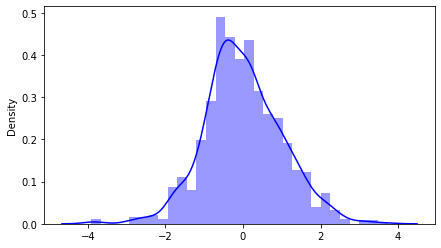

In [170]:
# checking the distribution plot for y_train
plt.figure(figsize=(7,4))
sns.distplot(y_train, color="blue")
plt.show()

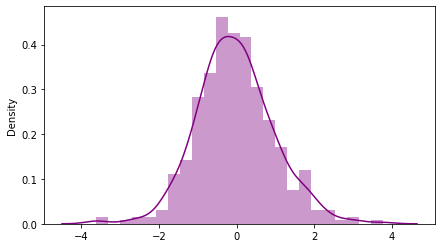

In [171]:
# checking the distribution plot for y_test

plt.figure(figsize=(7,4))
sns.distplot(y_test, color="purple")
plt.show()

## Model C1 (linear model)

In [172]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     51.81
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          9.76e-139
Time:                        23:35:22   Log-Likelihood:                -1077.8
No. Observations:                1015   AIC:                             2198.
Df Residuals:                     994   BIC:                             2301.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0538      0

In [173]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [174]:

# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
19       GarageCond_TA  204.41
15       GarageQual_TA  179.02
12       GarageQual_Fa   57.73
16       GarageCond_Fa   39.43
13       GarageQual_Gd   18.71
18       GarageCond_Po   11.50
17       GarageCond_Gd   10.71
2     RoofMatl_CompShg    7.07
14       GarageQual_Po    5.91
10         BsmtQual_TA    2.67
9          BsmtQual_Gd    2.57
7     RoofMatl_WdShngl    1.44
8          BsmtQual_Fa    1.40
5     RoofMatl_Tar&Grv    1.37
11  BsmtFinType1_NO-BA    1.25
6     RoofMatl_WdShake    1.14
0      Condition2_PosA    1.10
4        RoofMatl_Roll    1.09
3       RoofMatl_Metal    1.04
1      Condition2_PosN    1.01

As you

In [175]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict_linear = model.predict(X_train_rfe)

In [176]:
residual = y_train - y_train_predict_linear

In [177]:
sum(residual)

-2.956523914576792e-12

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

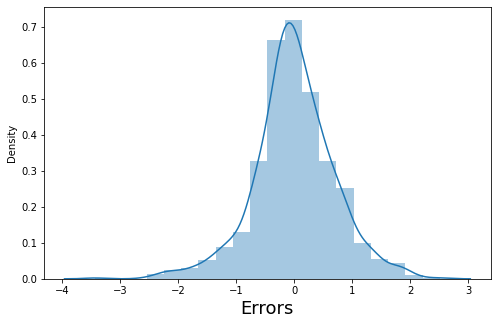

In [178]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

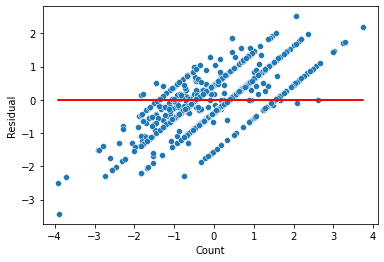

In [179]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see that this linear model is volilating all the Assumption of Linear Regression:
- Error terms should be independent 
- Error terms should be normally distributed 
- Error terms should have equal variance 

This indicates non linearitry is present and also it shows high VIF(multicolinearity). 
Hence, we have to use either Ridge or Lasso.

In [180]:
# R-squared value for train and test
print("R-squared value")
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_predict_linear))

R-squared value
Train:  0.5103700088451688


In [181]:
# Root mean_squared_error value for train and test for Linear model
print("mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_predict_linear) ** 0.5)

mean_squared_error value
Train:  0.699735658055834


## Model C2: Redge Regression

In [182]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}

ridge = Ridge()
# Cross Validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 32 candidates, totalling 224 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:    9.9s finished


GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [183]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.23205175244395937


In [184]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.023956      0.004680         0.010523        0.002001      0.0001   
1        0.023748      0.003201         0.010401        0.002210       0.001   
2        0.022582      0.002744         0.010524        0.005093        0.01   
3        0.015880      0.003121         0.008099        0.003469        0.05   
4        0.019766      0.005776         0.008422        0.001896         0.1   
5        0.020256      0.004032         0.010510        0.004413         0.2   
6        0.015229      0.002833         0.008663        0.004829         0.3   
7        0.024830      0.002625         0.010723        0.003106         0.4   
8        0.020128      0.003443         0.011367        0.003871         0.5   
9        0.022639      0.005732         0.011084        0.005608         0.6   
10       0.028672      0.007641         0.006833        0.007924         0.7   
11       0.021080      0.005171         0.009348        0.001447         0.8   
12       0.021135      0.003824         0.011903        0.003336         0.9   
13       0.023749      0.007812         0.009045        0.004750           1   
14       0.021030      0.006618         0.013162        0.003660           2   
15       0.017483      0.001699         0.012578        0.006424           3   
16       0.019421      0.004044         0.007574        0.001766           4   
17       0.024240      0.001253         0.010350        0.001622           5   
18       0.022426      0.003355         0.009106        0.004302           6   
19       0.020497      0.006198         0.013876        0.003505           7   
20       0.025396      0.004765         0.006072        0.003757           8   
21       0.021115      0.003760         0.008980        0.003904           9   
22       0.022354      0.005746         0.009399        0.005682          10   
23       0.026001      0.005153         0.008306        0.001560          20   
24       0.021670      0.003242         0.010138        0.002477          30   
25       0.018837      0.003558         0.012116        0.005853          40   
26       0.020081      0.004805         0.009336        0.007669          50   
27       0.022728      0.005008         0.005851        0.004511          60   
28       0.022531      0.001797         0.011686        0.002929          70   
29       0.023511      0.005500         0.008354        0.005518         100   
30       0.021815      0.003995         0.008350        0.006044         500   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.293505          -0.214845   
1    {'alpha': 0.001}          -0.293470          -0.215292   
2     {'alpha': 0.01}          -0.293107          -0.219113   
3     {'alpha': 0.05}          -0.291430          -0.231780   
4      {'alpha': 0.1}          -0.289788          -0.239308   
5      {'alpha': 0.2}          -0.287422          -0.244714   
6      {'alpha': 0.3}          -0.285547          -0.246397   
7      {'alpha': 0.4}          -0.283897          -0.246830   
8      {'alpha': 0.5}          -0.282807          -0.246726   
9      {'alpha': 0.6}          -0.281833          -0.246369   
10     {'alpha': 0.7}          -0.280947          -0.245961   
11     {'alpha': 0.8}          -0.280275          -0.245578   
12     {'alpha': 0.9}          -0.279753          -0.245153   
13     {'alpha': 1.0}          -0.279244          -0.244706   
14     {'alpha': 2.0}          -0.275207          -0.240662   
15     {'alpha': 3.0}          -0.273009          -0.238801   
16     {'alpha': 4.0}          -0.271241          -0.237611   
17     {'alpha': 5.0}          -0.269873          -0.236723   
18     {'alpha': 6.0}          -0.268739          -0.236015   
19     {'alpha': 7.0}          -0.267743          -0.235434   
20     {'alpha': 8.0}          -0.266879          -0.235252   
21     {'alpha': 9.0}          -0.266205          -0.2351

In [185]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

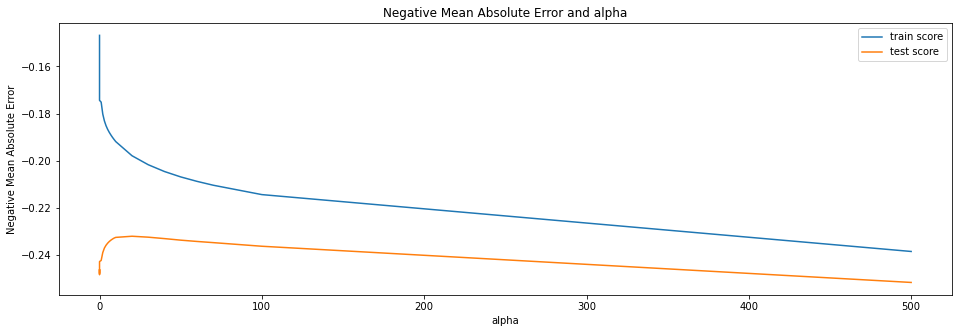

In [186]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

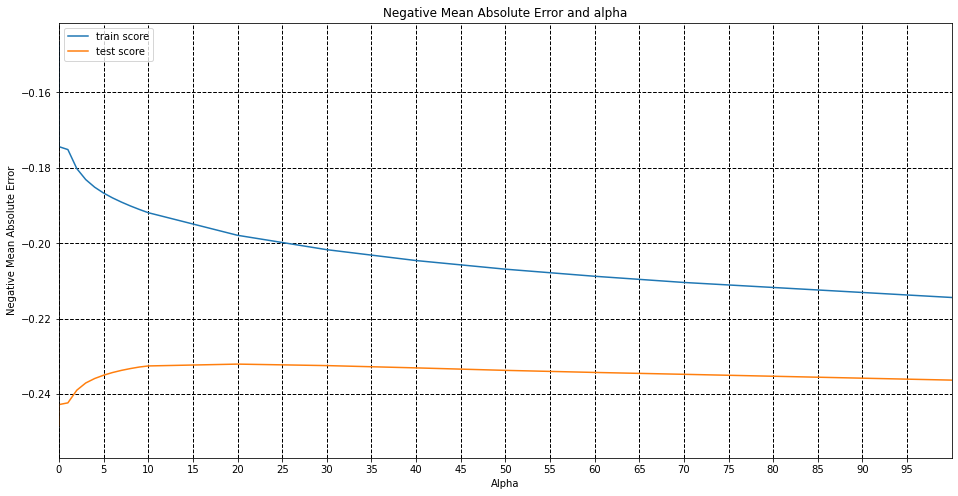

In [187]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [188]:
# final ridge model with alpha as 20 but with log we get same alpha

ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [189]:
np.array(sorted(ridge.coef_, reverse=True))

array([ 2.19164285e-01,  1.81273556e-01,  1.71222731e-01,  1.42363166e-01,
        1.42188342e-01,  1.35419349e-01,  1.31288855e-01,  1.29644210e-01,
        1.24144285e-01,  1.17745747e-01,  1.13987357e-01,  1.11512063e-01,
        1.07841156e-01,  1.01874226e-01,  9.87730333e-02,  9.55917821e-02,
        9.26128543e-02,  9.26006663e-02,  9.06949972e-02,  8.86056696e-02,
        8.71809440e-02,  8.11301005e-02,  7.97178914e-02,  7.76231125e-02,
        7.40925738e-02,  7.40417244e-02,  7.38241976e-02,  7.37503277e-02,
        7.05456681e-02,  6.99621778e-02,  6.90384355e-02,  6.74138900e-02,
        6.65118058e-02,  6.59369193e-02,  6.32593076e-02,  6.22271617e-02,
        5.81827793e-02,  5.29383141e-02,  5.20133662e-02,  5.18235060e-02,
        5.12279678e-02,  5.04987912e-02,  4.61653757e-02,  4.60267380e-02,
        4.59130375e-02,  4.58540503e-02,  4.55727163e-02,  4.49333012e-02,
        4.40576627e-02,  4.37294646e-02,  4.28982547e-02,  4.25516316e-02,
        4.16877715e-02,  

In [190]:
# R-squared value for train and test
print("R-squared value")
y_train_pred_ridge = ridge.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

R-squared value
Train:  0.9106854222291274
Test:  0.894291176339989


In [191]:
# Root mean_squared_error value for train and test
print("mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge) ** 0.5)

mean_squared_error value
Train:  0.29885544627942207
Test:  0.3224657156134259


In [192]:
residual = y_train - y_train_pred_ridge

In [193]:
sum(residual)

-4.574118861455645e-14

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

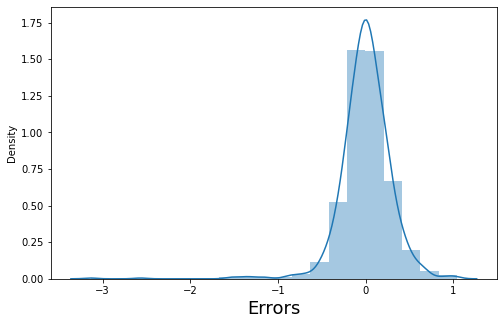

In [194]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

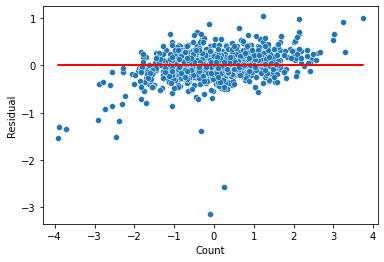

In [195]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see that this Ridge model is **not volilating** all the Assumption of Linear Regression:
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or Residual is almost 0. 
- Error terms should have equal variance 


## Model C3: Lasso Regression

In [196]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.00001,0.00008,0.00009, 0.0001, 0.0002, 0.0003,0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 
0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 7 folds for each of 42 candidates, totalling 294 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:   31.6s finished


GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 8e-05, 9e-05, 0.0001, 0.0002, 0.0003,
                                   0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [197]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0003}
-0.22907340263504072


In [198]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.418447      0.044222         0.008599        0.004750       1e-05   
1        0.237912      0.074435         0.009279        0.002869       8e-05   
2        0.200492      0.090116         0.009098        0.003898       9e-05   
3        0.241084      0.086502         0.011772        0.006078      0.0001   
4        0.177200      0.038452         0.010233        0.002208      0.0002   
5        0.177511      0.047581         0.008253        0.001802      0.0003   
6        0.163266      0.063274         0.009252        0.004950      0.0004   
7        0.243761      0.079072         0.011223        0.006843      0.0005   
8        0.284272      0.024205         0.008552        0.006067      0.0006   
9        0.265016      0.013193         0.009010        0.002467      0.0007   
10       0.232661      0.031761         0.007396        0.004989      0.0008   
11       0.183881      0.013341         0.010668        0.001259       0.001   
12       0.037036      0.001803         0.010829        0.000349        0.01   
13       0.025875      0.002228         0.010375        0.001500        0.05   
14       0.024560      0.004231         0.009654        0.001818         0.1   
15       0.023734      0.004142         0.008715        0.001928         0.2   
16       0.024646      0.002585         0.009714        0.002065         0.3   
17       0.025017      0.001392         0.010972        0.000544         0.4   
18       0.024578      0.001304         0.009977        0.001355         0.5   
19       0.024365      0.001494         0.010417        0.000725         0.6   
20       0.022540      0.002675         0.011084        0.002572         0.7   
21       0.022543      0.003957         0.009624        0.002104         0.8   
22       0.021547      0.004502         0.009596        0.002755         0.9   
23       0.024100      0.001360         0.010669        0.000416           1   
24       0.023254      0.000843         0.009492        0.002211           2   
25       0.022325      0.003036         0.010405        0.001040           3   
26       0.024450      0.000524         0.011186        0.001069           4   
27       0.021756      0.003116         0.009041        0.002106           5   
28       0.021407      0.003364         0.009781        0.001589           6   
29       0.021376      0.003855         0.009529        0.002132           7   
30       0.022948      0.003426         0.010809        0.001032           8   
31       0.023205      0.002584         0.010252        0.001737           9   
32       0.024058      0.000636         0.010543        0.000484          10   
33       0.022512      0.002711         0.011113        0.000349          20   
34       0.024373      0.000788         0.010746        0.001023          30   
35       0.023792      0.000830         0.010925        0.000389          40   
36       0.022783      0.002814         0.010854        0.000385          50   
37       0.024104      0.000342         0.010803        0.000343          60   
38       0.023666      0.001239         0.010680        0.000875          70   
39       0.022486      0.002172         0.010415        0.000818         100   
40       0.024356      0.001314         0.010094        0.001499         500   

               params  split0_test_score  split1_test_score  \
0    {'alpha': 1e-05}          -0.292147          -0.214326   
1    {'alpha': 8e-05}          -0.286989          -0.211178   
2    {'alpha': 9e-05}          -0.286326          -0.210724   
3   {'alpha': 0.0001}          -0.285704          -0.210533   
4   {'alpha': 0.0002}          -0.279151          -0.211409   
5   {'alpha': 0.0003}          -0.273321          -0.218392   
6   {'alpha': 0.0004}          -0.270878          -0.224811   
7   {'alpha': 0.0005}          -0.269654          -0.229699   
8   {'alpha': 0.0006}          -0.269566          -0.230316   
9   {'alpha':

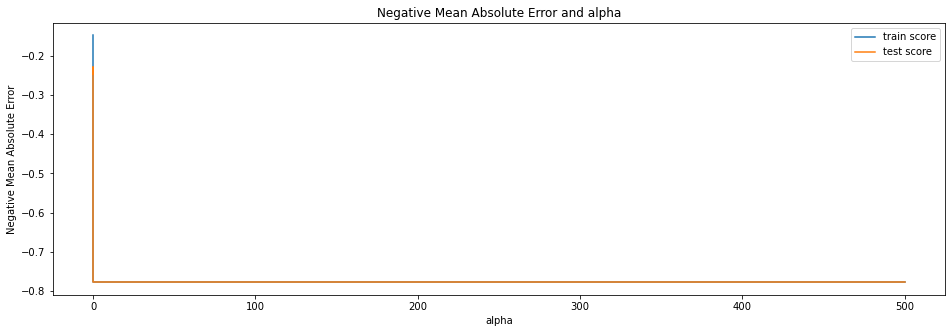

In [199]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

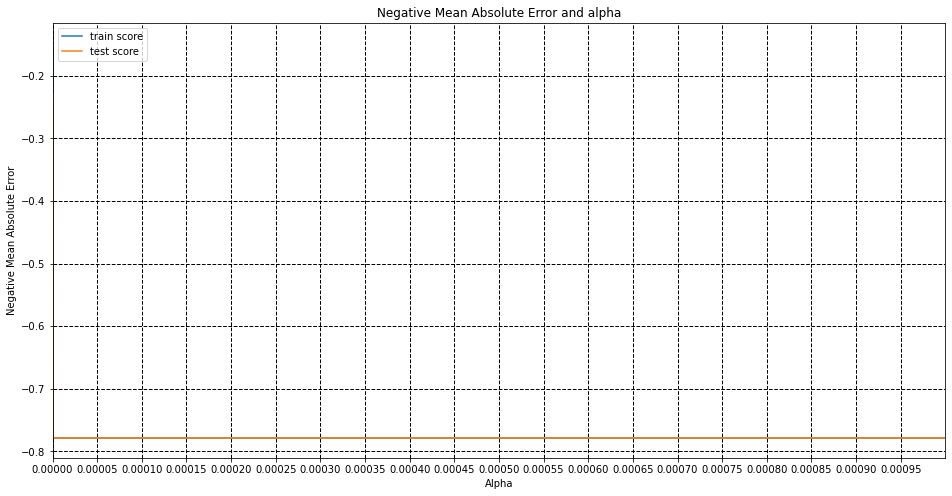

In [200]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0.0, 0.001)
plt.xticks(np.arange(0.0, 0.001, 0.00005))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [201]:
#final lasso model
alpha = 0.0003
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0003)

In [202]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

R-squared value
Train:  0.944913592041693
Test:  0.8573581834436157


In [203]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

Root mean_squared_error value
Train:  0.23470493807823253
Test:  0.37458584147346474


In [204]:
residual = y_train - y_train_pred_lasso

In [205]:
sum(residual)

1.092903545441004e-12

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

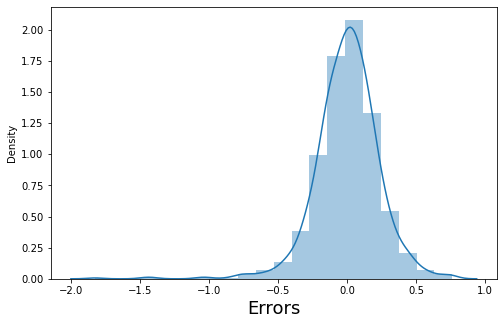

In [206]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

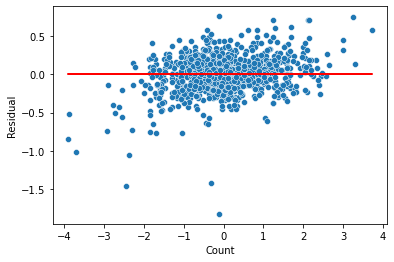

In [207]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see that this Lasso model is **not volilating** all the Assumption of Linear Regression:
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or Residual is almost 0. 
- Error terms should have equal variance 


## Ridge VS Lasso after applying LOG
### For Ridge: 
**Alpha: 20**

**R-squared value for Ridge**
- Train:  0.911
- Test:  0.894

**mean_squared_error value**
- Train:  0.299
- Test:  0.322

******
### For Lasso:
**Alpha: 0.0003**

**R-squared value**
- Train:  0.945
- Test:   0.857

**mean_squared_error value**
- Train:  0.235
- Test:   0.375


Here we can clearly see that **Ridge** did better cause **Lasso** seem like overfeeding and **train and test** have around **9%** gape. However **Ridge** have only **2%** gape.

************** ****

In [208]:
model_coef = pd.DataFrame(index=range(len(X_train.columns)))
model_coef["col"] = X_train.columns
model_coef["ridge_cof"] = ridge.coef_
model_coef["Abs_ridge_cof"] = list(np.abs(cof) for cof in ridge.coef_)
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)


In [209]:
model_coef.sort_values(by="Abs_lasso_cof", ascending=False)

col  ridge_cof  Abs_ridge_cof  lasso_cof  Abs_lasso_cof
51       Condition2_PosN  -0.128342       0.128342  -3.164559       3.164559
77      RoofMatl_WdShngl   0.050499       0.050499   2.666807       2.666807
71      RoofMatl_CompShg   0.073750       0.073750   2.531388       2.531388
75      RoofMatl_Tar&Grv   0.009443       0.009443   2.321044       2.321044
76      RoofMatl_WdShake   0.006657       0.006657   2.293756       2.293756
..                   ...        ...            ...        ...            ...
100    Exterior2nd_Other   0.000029       0.000029  -0.000000       0.000000
102    Exterior2nd_Stone   0.018437       0.018437   0.000000       0.000000
104  Exterior2nd_VinylSd   0.010321       0.010321   0.000000       0.000000
186        GarageCond_TA   0.005031       0.005031   0.000000       0.000000
120     Foundation_Stone   0.010608       0.010608   0.000000       0.000000

[240 rows x 5 columns]

### Getting Ridge coefs:

In [210]:
ridge_coef = model_coef[["col", "ridge_cof", "Abs_ridge_cof"]].sort_values(by="Abs_ridge_cof", ascending=False)
ridge_coef.head(15)

col  ridge_cof  Abs_ridge_cof
206           OverallQual   0.219164       0.219164
31   Neighborhood_NridgHt   0.181274       0.181274
21   Neighborhood_Crawfor   0.171223       0.171223
219             GrLivArea   0.142363       0.142363
200  SaleCondition_Normal   0.142188       0.142188
37   Neighborhood_StoneBr   0.135419       0.135419
80    Exterior1st_BrkFace   0.131289       0.131289
229            GarageCars   0.129644       0.129644
24    Neighborhood_IDOTRR  -0.129444       0.129444
22   Neighborhood_Edwards  -0.128828       0.128828
51        Condition2_PosN  -0.128342       0.128342
41        Condition1_Norm   0.124144       0.124144
49        Condition2_Norm   0.117746       0.117746
207           OverallCond   0.113987       0.113987
167        Functional_Typ   0.111512       0.111512

### Top Ten Ridge coefficient are:

In [211]:
ridge_coef[["col", "ridge_cof"]].reset_index(drop=True).head(10)

col  ridge_cof
0           OverallQual   0.219164
1  Neighborhood_NridgHt   0.181274
2  Neighborhood_Crawfor   0.171223
3             GrLivArea   0.142363
4  SaleCondition_Normal   0.142188
5  Neighborhood_StoneBr   0.135419
6   Exterior1st_BrkFace   0.131289
7            GarageCars   0.129644
8   Neighborhood_IDOTRR  -0.129444
9  Neighborhood_Edwards  -0.128828

- Here we can see the top 10 Ridge coefficients

### Getting Lasso coefs:

In [212]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

col  lasso_cof  Abs_lasso_cof
51        Condition2_PosN  -3.164559       3.164559
77       RoofMatl_WdShngl   2.666807       2.666807
71       RoofMatl_CompShg   2.531388       2.531388
75       RoofMatl_Tar&Grv   2.321044       2.321044
76       RoofMatl_WdShake   2.293756       2.293756
73         RoofMatl_Metal   2.236751       2.236751
74          RoofMatl_Roll   2.235742       2.235742
1             MSZoning_RH   1.073245       1.073245
0             MSZoning_FV   1.038871       1.038871
2             MSZoning_RL   1.007835       1.007835
3             MSZoning_RM   0.865588       0.865588
162       Functional_Maj2  -0.454041       0.454041
148          Heating_Grav  -0.429723       0.429723
195          SaleType_Oth   0.362383       0.362383
21   Neighborhood_Crawfor   0.323555       0.323555

### Top Ten Lasso coefficient are:

In [213]:
lasso_coef[["col", "lasso_cof"]].reset_index(drop=True).head(10)

col  lasso_cof
0   Condition2_PosN  -3.164559
1  RoofMatl_WdShngl   2.666807
2  RoofMatl_CompShg   2.531388
3  RoofMatl_Tar&Grv   2.321044
4  RoofMatl_WdShake   2.293756
5    RoofMatl_Metal   2.236751
6     RoofMatl_Roll   2.235742
7       MSZoning_RH   1.073245
8       MSZoning_FV   1.038871
9       MSZoning_RL   1.007835

- Here we can see the top 10 Lasso coefficients

### Model C preformed the best and we will go with model C.

*****

*****

*****

*****

*****

*****

# Question and Answers code:
### Question 1:
- What will be the changes in the model if you choose **double the value of alpha for both ridge and lasso?**

## Model Q1: Redge Regression

In [214]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}

ridge = Ridge()
# Cross Validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 32 candidates, totalling 224 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:   10.2s finished


GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [215]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.23205175244395937


### So we need to double the alpha

In [216]:
ridge = Ridge(alpha=40)
ridge.fit(X_train, y_train)

Ridge(alpha=40)

In [217]:
# R-squared value for train and test
print("R-squared value")
y_train_pred_ridge = ridge.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

R-squared value
Train:  0.9033692907721526
Test:  0.8940917194104638


In [218]:
# Root mean_squared_error value for train and test
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge) ** 0.5)

Root mean_squared_error value
Train:  0.3108548040932413
Test:  0.3227697948199977


In [219]:
residual = y_train - y_train_pred_ridge

In [220]:
sum(residual)

-1.865174681370263e-14

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

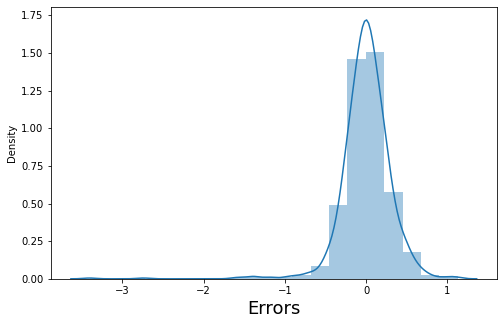

In [221]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

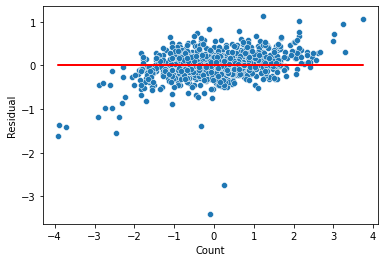

In [222]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Model C3: Lasso Regression

In [223]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.00001,0.00008,0.00009, 0.0001, 0.0002, 0.0003,0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 
0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 7 folds for each of 42 candidates, totalling 294 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:   31.1s finished


GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 8e-05, 9e-05, 0.0001, 0.0002, 0.0003,
                                   0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [224]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0003}
-0.22907340263504072


### So we need to double the alpha

In [225]:
alpha = 0.0006
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0006)

In [226]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

R-squared value
Train:  0.929867707173248
Test:  0.8803045462995521


In [227]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

Root mean_squared_error value
Train:  0.26482502303738614
Test:  0.34313637197285496


In [228]:
residual = y_train - y_train_pred_lasso

In [229]:
sum(residual)

-7.815970093361102e-14

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

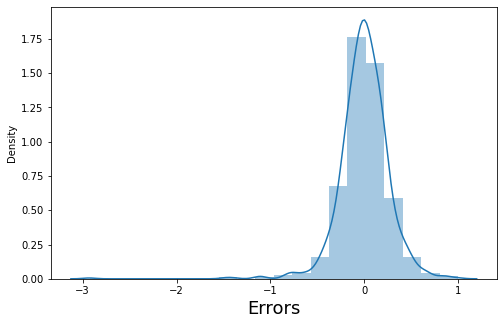

In [230]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

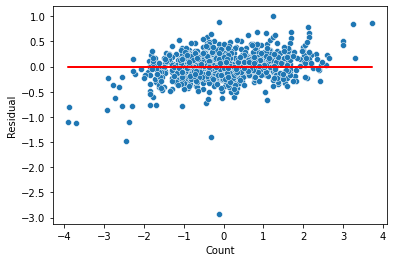

In [231]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Ridge VS Lasso after applying LOG
### For Ridge: 
**Alpha: 20**

**R-squared value for Ridge**
- Train:  0.911 to 0.903
- Test:  0.894 to 0.894

**Root mean_squared_error value**
- Train:  0.299 to 0.311
- Test:  0.322 to 0.323


******
### For Lasso:
**Alpha: 0.0003**

**R-squared value**
- Train:  0.954 to 0.930
- Test:   0.781 to 0.880

**Root mean_squared_error value**
- Train:  0.213 to 0.265
- Test:   0.464 to 0.343



Here we can clearly see that **Ridge** did better.
**************

In [232]:
model_coef = pd.DataFrame(index=range(len(X_train.columns)))
model_coef["col"] = X_train.columns
model_coef["ridge_cof"] = ridge.coef_
model_coef["Abs_ridge_cof"] = list(np.abs(cof) for cof in ridge.coef_)
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)


In [233]:
model_coef.sort_values(by="Abs_lasso_cof", ascending=False)

col  ridge_cof  Abs_ridge_cof  lasso_cof  Abs_lasso_cof
51       Condition2_PosN  -0.068538       0.068538  -2.531138       2.531138
1            MSZoning_RH   0.035708       0.035708   0.721070       0.721070
0            MSZoning_FV   0.067344       0.067344   0.694621       0.694621
2            MSZoning_RL   0.084030       0.084030   0.682292       0.682292
3            MSZoning_RM  -0.056200       0.056200   0.551125       0.551125
..                   ...        ...            ...        ...            ...
92   Exterior2nd_AsphShn   0.003045       0.003045  -0.000000       0.000000
93   Exterior2nd_Brk Cmn  -0.023267       0.023267  -0.000000       0.000000
166       Functional_Sev  -0.015914       0.015914  -0.000000       0.000000
165       Functional_Mod  -0.008756       0.008756  -0.000000       0.000000
120     Foundation_Stone   0.006236       0.006236   0.000000       0.000000

[240 rows x 5 columns]

### Getting Ridge coefs:

In [234]:
ridge_coef = model_coef[["col", "ridge_cof", "Abs_ridge_cof"]].sort_values(by="Abs_ridge_cof", ascending=False)
ridge_coef.head(15)

col  ridge_cof  Abs_ridge_cof
206           OverallQual   0.223053       0.223053
31   Neighborhood_NridgHt   0.132840       0.132840
219             GrLivArea   0.128920       0.128920
21   Neighborhood_Crawfor   0.125635       0.125635
229            GarageCars   0.122871       0.122871
207           OverallCond   0.114416       0.114416
41        Condition1_Norm   0.112104       0.112104
200  SaleCondition_Normal   0.105762       0.105762
22   Neighborhood_Edwards  -0.101839       0.101839
80    Exterior1st_BrkFace   0.097177       0.097177
24    Neighborhood_IDOTRR  -0.086949       0.086949
37   Neighborhood_StoneBr   0.086056       0.086056
161        KitchenQual_TA  -0.085676       0.085676
216              1stFlrSF   0.085381       0.085381
2             MSZoning_RL   0.084030       0.084030

### Top Ten Ridge coefficient are:

In [235]:
ridge_coef[["col", "ridge_cof"]].reset_index(drop=True).head(10)

col  ridge_cof
0           OverallQual   0.223053
1  Neighborhood_NridgHt   0.132840
2             GrLivArea   0.128920
3  Neighborhood_Crawfor   0.125635
4            GarageCars   0.122871
5           OverallCond   0.114416
6       Condition1_Norm   0.112104
7  SaleCondition_Normal   0.105762
8  Neighborhood_Edwards  -0.101839
9   Exterior1st_BrkFace   0.097177

### Getting Lasso coefs:

In [236]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

col  lasso_cof  Abs_lasso_cof
51        Condition2_PosN  -2.531138       2.531138
1             MSZoning_RH   0.721070       0.721070
0             MSZoning_FV   0.694621       0.694621
2             MSZoning_RL   0.682292       0.682292
3             MSZoning_RM   0.551125       0.551125
162       Functional_Maj2  -0.389754       0.389754
219             GrLivArea   0.332278       0.332278
148          Heating_Grav  -0.331339       0.331339
77       RoofMatl_WdShngl   0.320063       0.320063
21   Neighborhood_Crawfor   0.303604       0.303604
31   Neighborhood_NridgHt   0.293127       0.293127
25   Neighborhood_MeadowV  -0.272681       0.272681
37   Neighborhood_StoneBr   0.269152       0.269152
5            LotShape_IR3  -0.265967       0.265967
71       RoofMatl_CompShg   0.251124       0.251124

### Top Ten Lasso coefficient are:

In [237]:
lasso_coef[["col", "lasso_cof"]].reset_index(drop=True).head(10)

col  lasso_cof
0       Condition2_PosN  -2.531138
1           MSZoning_RH   0.721070
2           MSZoning_FV   0.694621
3           MSZoning_RL   0.682292
4           MSZoning_RM   0.551125
5       Functional_Maj2  -0.389754
6             GrLivArea   0.332278
7          Heating_Grav  -0.331339
8      RoofMatl_WdShngl   0.320063
9  Neighborhood_Crawfor   0.303604

### Question 2
- You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

**Ans:**
- I will choose Ridge over Lasso. Even though Lasso has a higher R2 for training but has less R2 for the test, the gap between it is around 9%. On the other hand, we have Ridge, which has optimal R2 for both train and test. That’s why I choose Ridge. To make it more optimal, I can use RFE on Ridge to make it better.


### Question 3:
- After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [238]:
X_train.shape

(1015, 240)

In [239]:
q3_X_train = X_train.drop(['Condition2_PosN', 'RoofMatl_WdShngl', 'RoofMatl_CompShg',
                           'RoofMatl_Tar&Grv', 'RoofMatl_WdShake'], axis=1)
q3_X_train.shape

(1015, 235)

In [240]:
q3_X_test = X_test.drop(['Condition2_PosN', 'RoofMatl_WdShngl', 'RoofMatl_CompShg',
                           'RoofMatl_Tar&Grv', 'RoofMatl_WdShake'], axis=1)
q3_X_test.shape

(436, 235)

In [241]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.00001,0.00008,0.00009, 0.0001, 0.0002, 0.0003,0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 
0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(q3_X_train, y_train) 

Fitting 7 folds for each of 42 candidates, totalling 294 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:   32.2s finished


GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 8e-05, 9e-05, 0.0001, 0.0002, 0.0003,
                                   0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [242]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.23380305322058934


### So we need to double the alpha

In [243]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(q3_X_train, y_train) 

Lasso(alpha=0.001)

In [244]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(q3_X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(q3_X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

R-squared value
Train:  0.9153595155737936
Test:  0.8925774315606496


In [245]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

Root mean_squared_error value
Train:  0.2909303772833054
Test:  0.32506910346294515


In [246]:
residual = y_train - y_train_pred_lasso

In [247]:
sum(residual)

-5.773159728050814e-15

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

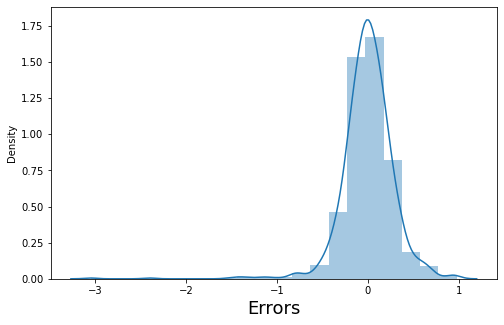

In [248]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

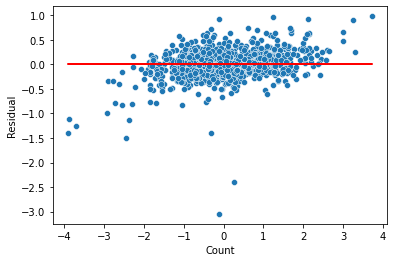

In [249]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [250]:
model_coef = pd.DataFrame(index=range(len(q3_X_train.columns)))
model_coef["col"] = q3_X_train.columns
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)

In [251]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

col  lasso_cof  Abs_lasso_cof
49        Condition2_Norm   0.325719       0.325719
31   Neighborhood_NridgHt   0.316924       0.316924
21   Neighborhood_Crawfor   0.297810       0.297810
37   Neighborhood_StoneBr   0.295042       0.295042
214             GrLivArea   0.278710       0.278710
157       Functional_Maj2  -0.268975       0.268975
2             MSZoning_RL   0.249872       0.249872
0             MSZoning_FV   0.246827       0.246827
1             MSZoning_RH   0.245016       0.245016
75    Exterior1st_BrkFace   0.224353       0.224353
189          SaleType_New   0.219548       0.219548
143          Heating_Grav  -0.212100       0.212100
201           OverallQual   0.211628       0.211628
36   Neighborhood_Somerst   0.187516       0.187516
5            LotShape_IR3  -0.175244       0.175244

In [253]:
lasso_coef[["col", "lasso_cof"]].head()

col  lasso_cof
49        Condition2_Norm   0.325719
31   Neighborhood_NridgHt   0.316924
21   Neighborhood_Crawfor   0.297810
37   Neighborhood_StoneBr   0.295042
214             GrLivArea   0.278710

Top 5 variable are:
- Condition2_Norm	    0.325719
- Neighborhood_NridgHt	0.316924
- Neighborhood_Crawfor	0.29781
- Neighborhood_StoneBr	0.295042
- GrLivArea	            0.27871
